In [1]:
#pip install wordcloud
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re

vaerd = pd.read_csv('data/2021VAERSData_0709/2021VAERSDATA.csv', encoding='latin1')
vaerv = pd.read_csv('data/2021VAERSData_0709/2021VAERSVAX.csv', encoding='latin1')
vaers = pd.read_csv('data/2021VAERSData_0709/2021VAERSSYMPTOMS.csv', encoding='latin1')
v2020 = pd.read_csv('data/2020VAERSVAX.csv', encoding='latin1')

vacdist = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])
pd.set_option('display.max_columns', None)
vaers.head()

/home/wwang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia             23.1   
1    916601                  Anxiety             23.1   
2    916602         Chest discomfort             23.1   
3    916603                Dizziness             23.1   
4    916604  Injection site erythema             23.1   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis             23.1                      NaN   
1                 Dyspnoea             23.1                      NaN   
2                Dysphagia             23.1        Pain in extremity   
3                  Fatigue             23.1       Mobility decreased   
4  Injection site pruritus             23.1  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2             23.1      Visual impairment             23.1      NaN   
3             23.1                    NaN              NaN      NaN   
4             23.1  Injection site warmth             23.1      NaN   

   SYMPTOMVERSION5  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [3]:
vaerd[vaerd.eq("Barre").any(1)]

Empty DataFrame
Columns: [VAERS_ID, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES]
Index: []

In [4]:
vacdist.head(1)

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.026                  0.026   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   

   weekly_hosp_admissions_per_million  new_tests  total_tests  \
0                                 NaN        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                              NaN            NaN             NaN         NaN   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0                 NaN                NaN                      NaN   

   total_boosters  new_vaccinations  new_vaccinations_smoothed  \
0             NaN               NaN                        NaN   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                                  NaN                         NaN   

   new_vaccinations_smoothed_per_million  stringency_index  population  \
0                                    NaN              8.33  38928341.0   

   population_density  median_age  aged_65_older  aged_70_older  \
0              54.422        18.6          2.581          1.337   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   

   excess_mortality  
0               NaN

In [150]:
usv = pd.DataFrame()
us = vacdist[vacdist['iso_code']=='USA']
usv[['date', 'new_vaccinations']] = us[['date','new_vaccinations']]
usv.fillna(0,inplace=True)
usv

date  new_vaccinations
103784 2020-01-22               0.0
103785 2020-01-23               0.0
103786 2020-01-24               0.0
103787 2020-01-25               0.0
103788 2020-01-26               0.0
...           ...               ...
104350 2021-08-10          617769.0
104351 2021-08-11          654600.0
104352 2021-08-12          654350.0
104353 2021-08-13          918056.0
104354 2021-08-14          990875.0

[571 rows x 2 columns]

In [6]:
us['new_vaccinations'].sum()

341114483.0

In [7]:
vaerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406001 entries, 0 to 406000
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      406001 non-null  int64  
 1   RECVDATE      406001 non-null  object 
 2   STATE         361677 non-null  object 
 3   AGE_YRS       378444 non-null  float64
 4   CAGE_YR       348385 non-null  float64
 5   CAGE_MO       971 non-null     float64
 6   SEX           406001 non-null  object 
 7   RPT_DATE      349 non-null     object 
 8   SYMPTOM_TEXT  405943 non-null  object 
 9   DIED          5397 non-null    object 
 10  DATEDIED      4905 non-null    object 
 11  L_THREAT      6805 non-null    object 
 12  ER_VISIT      51 non-null      object 
 13  HOSPITAL      23517 non-null   object 
 14  HOSPDAYS      16282 non-null   float64
 15  X_STAY        241 non-null     object 
 16  DISABLE       5760 non-null    object 
 17  RECOVD        366122 non-null  object 
 18  VAX_

In [8]:
vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542931 entries, 0 to 542930
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         542931 non-null  int64  
 1   SYMPTOM1         542931 non-null  object 
 2   SYMPTOMVERSION1  542931 non-null  float64
 3   SYMPTOM2         431565 non-null  object 
 4   SYMPTOMVERSION2  431565 non-null  float64
 5   SYMPTOM3         337147 non-null  object 
 6   SYMPTOMVERSION3  337147 non-null  float64
 7   SYMPTOM4         255314 non-null  object 
 8   SYMPTOMVERSION4  255314 non-null  float64
 9   SYMPTOM5         188069 non-null  object 
 10  SYMPTOMVERSION5  188069 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 45.6+ MB


In [9]:
vaerd['VAERS_ID'].isnull().sum() + vaerv['VAERS_ID'].isnull().sum() + vaers['VAERS_ID'].isnull().sum()

0

In [10]:
# Build Dirty Frame _ Large Reports * Doulicated Vaers_ID's
Dvaers = vaers
Dvaerv = vaerv
Dvaerd = vaerd


In [11]:

D_V_CDC = Dvaerd.merge(Dvaerv, on = 'VAERS_ID', how = 'inner')
D_V_CDC = D_V_CDC.merge(Dvaers, on = 'VAERS_ID', how = 'inner')
    

In [12]:
D_V_CDC = D_V_CDC.applymap(lambda s:s.upper() if type(s) == str else s)

In [13]:
type(D_V_CDC['SYMPTOM_TEXT'])

pandas.core.series.Series

In [14]:
D_V_CDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565391 entries, 0 to 565390
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         565391 non-null  int64  
 1   RECVDATE         565391 non-null  object 
 2   STATE            510667 non-null  object 
 3   AGE_YRS          532571 non-null  float64
 4   CAGE_YR          489441 non-null  float64
 5   CAGE_MO          1760 non-null    float64
 6   SEX              565391 non-null  object 
 7   RPT_DATE         489 non-null     object 
 8   SYMPTOM_TEXT     565330 non-null  object 
 9   DIED             9059 non-null    object 
 10  DATEDIED         8441 non-null    object 
 11  L_THREAT         15291 non-null   object 
 12  ER_VISIT         78 non-null      object 
 13  HOSPITAL         50351 non-null   object 
 14  HOSPDAYS         37207 non-null   float64
 15  X_STAY           416 non-null     object 
 16  DISABLE          12181 non-null   obje

In [15]:
THROM = D_V_CDC[D_V_CDC.eq('THROMBOCYTOPENIA').any(1)]
THROM['AGE_YRS'].astype(float)

10164     43.0
22705     25.0
24027     43.0
25730     44.0
37358     43.0
          ... 
562180    61.0
563370    87.0
563915    48.0
563978    60.0
564654    48.0
Name: AGE_YRS, Length: 561, dtype: float64

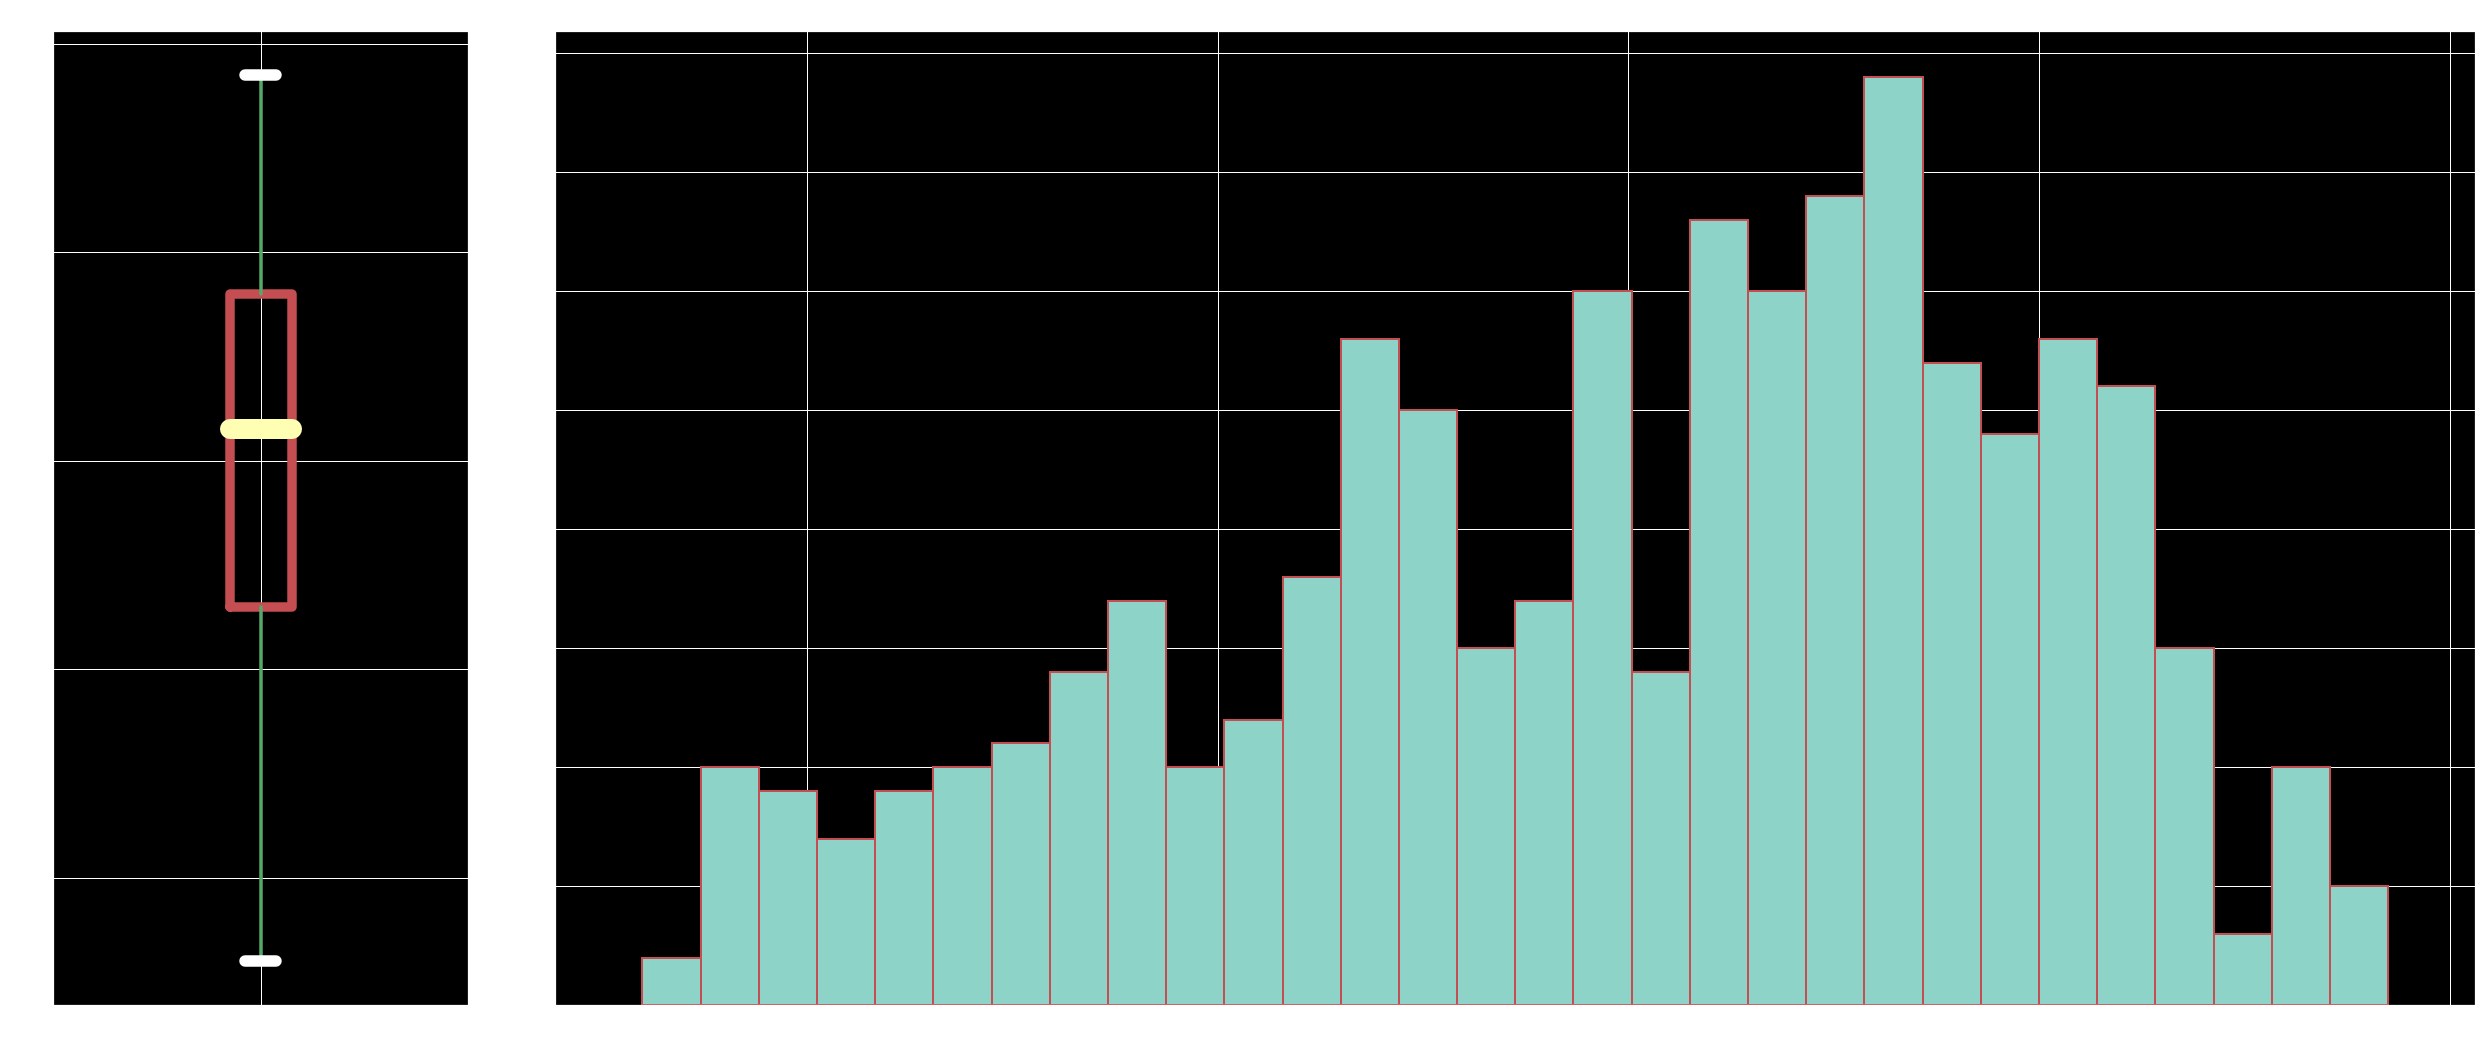

In [16]:
fig = plt.figure()
sns.set(font_scale = (2))
plt.style.use('dark_background')
ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
THROM['AGE_YRS'].plot(kind='box', figsize=(5,30), ax=ax0, boxprops=dict(linestyle='-', linewidth=9.5, color='r'), 
                medianprops=dict(linestyle='-', linewidth=20),
                whiskerprops=dict(linestyle='-', linewidth=3.5, color='g'), 
                capprops=dict(linestyle='-', linewidth=11.5),)


THROM['AGE_YRS'].plot(kind='hist', bins=30, figsize=(35,15), edgecolor='r', linewidth=2,ax=ax1)
ax0.set_title('Average Age')
ax1.set_title('Thrombocytopenia Reactions by age')
fig.tight_layout()

In [17]:
PARA = D_V_CDC[D_V_CDC.eq("PARALYSIS").any(1)]
PARA

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
2690      918637  01/04/2021    VA     43.0     43.0      NaN   F      NaN   
12532     926808  01/07/2021    NM     33.0     33.0      NaN   F      NaN   
16189     929154  01/08/2021    AZ     67.0      NaN      NaN   M      NaN   
17404     930167  01/08/2021    TX     65.0     65.0      NaN   F      NaN   
22031     932371  01/10/2021    NC     49.0     49.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
555332   1430150  06/27/2021    MO     70.0     70.0      NaN   M      NaN   
556626   1431235  06/28/2021    OH     51.0     51.0      NaN   F      NaN   
557874   1433291  06/29/2021    PA     23.0     23.0      NaN   F      NaN   
560694   1436980  06/30/2021    MI     61.0      NaN      NaN   F      NaN   
563687   1440673  07/01/2021    CA     41.0     41.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
2690    RIGHT SIDED JAW PAIN  STARTED 12/22/20 IN THE ...  NaN      NaN   
12532   THE MORNING AFTER I RECEIVED THE SHOT IN MY RI...  NaN      NaN   
16189   I WAS PRETTY SICK, I FELT PALSY; I WAS PRETTY ...  NaN      NaN   
17404   TREATED IN ED THE SAME DAY AS VACCINATION FOR ...  NaN      NaN   
22031   THE PATIENT RECEIVED THE VACCINE IN THE LEFT D...  NaN      NaN   
...                                                   ...  ...      ...   
555332  ONE WEEK FOLLOWING VACCINATION WAS UNABLE TO R...  NaN      NaN   
556626  I FIRST DEVELOPED A RASH IN B ANTECUBITAL FOSS...  NaN      NaN   
557874  MINUTES RIGHT AFTER THE VACCINATION, I HAD BUR...  NaN      NaN   
560694  FELT PARALYZED; HIP PAIN; IT'S RED AND SWOLLEN...  NaN      NaN   
563687  PARALYZED COMPLETELY. SENT TO ER. TRANSFERRED ...  NaN      NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
2690        NaN      NaN      NaN       NaN    NaN     NaN      N  12/18/2020   
12532       NaN      NaN      NaN       NaN    NaN     NaN      N  01/06/2021   
16189       NaN      NaN      NaN       NaN    NaN     NaN      U  12/30/2020   
17404       NaN      NaN      NaN       NaN    NaN     NaN      Y  12/29/2020   
22031       NaN      NaN      NaN       NaN    NaN     NaN      Y  01/07/2021   
...         ...      ...      ...       ...    ...     ...    ...         ...   
555332        Y      NaN        Y      45.0    NaN       Y      N  02/27/2021   
556626      NaN      NaN      NaN       NaN    NaN     NaN      N  02/01/2021   
557874      NaN      NaN      NaN       NaN    NaN     NaN      N  05/20/2021   
560694      NaN      NaN      NaN       NaN    NaN     NaN      N  06/11/2021   
563687      NaN      NaN        Y       3.0    NaN     NaN      U  04/30/2021   

        ONSET_DATE  NUMDAYS  \
2690    12/21/2020      3.0   
12532   01/07/2021      1.0   
16189          NaN      NaN   
17404   12/29/2020      0.0   
22031   01/08/2021      1.0   
...            ...      ...   
555332  03/05/2021      6.0   
556626  05/29/2021    117.0   
557874  05/20/2021      0.0   
560694  06/11/2021      0.0   
563687  05/01/2021      1.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
2690    CT SCAN AND NOTHING ELSE. HOPING MY PRIMARY CA...       PVT      NaN   
12532                                   NONE AT THIS TIME       PVT      NaN   
16189   TEST NAME: FEVER; RESULT UNSTRUCTURED DATA: TE...       PVT      NaN   
17404                                                 NaN       PVT      NaN   
22031                         NONE - NO TREATMENT SOUGHT.       PVT      NaN   
...                                                   ...       ...      ...   
555332  NUMEROUS, WOULD HAVE TO GET HOSPITAL RECORDS T...       PVT      NaN   
556626  NORMAL CT, NORMAL MRI, NORMAL CBC WITH DIF, NO...       PVT      NaN   
557874  MRI-6/9/2021-OPTIC NERVE SWELLING BLOOD WORK E...       WRK      NaN   
560694                  

In [18]:
PARA['AGE_YRS'].describe()

count    275.000000
mean      56.952727
std       18.013213
min       13.000000
25%       43.000000
50%       59.000000
75%       71.000000
max      103.000000
Name: AGE_YRS, dtype: float64

In [19]:
D_V_CDC.isin(["NOT"])

VAERS_ID  RECVDATE  STATE  AGE_YRS  CAGE_YR  CAGE_MO    SEX  RPT_DATE  \
0          False     False  False    False    False    False  False     False   
1          False     False  False    False    False    False  False     False   
2          False     False  False    False    False    False  False     False   
3          False     False  False    False    False    False  False     False   
4          False     False  False    False    False    False  False     False   
...          ...       ...    ...      ...      ...      ...    ...       ...   
565386     False     False  False    False    False    False  False     False   
565387     False     False  False    False    False    False  False     False   
565388     False     False  False    False    False    False  False     False   
565389     False     False  False    False    False    False  False     False   
565390     False     False  False    False    False    False  False     False   

        SYMPTOM_TEXT   DIED  DATEDIED  L_THREAT  ER_VISIT  HOSPITAL  HOSPDAYS  \
0              False  False     False     False     False     False     False   
1              False  False     False     False     False     False     False   
2              False  False     False     False     False     False     False   
3              False  False     False     False     False     False     False   
4              False  False     False     False     False     False     False   
...              ...    ...       ...       ...       ...       ...       ...   
565386         False  False     False     False     False     False     False   
565387         False  False     False     False     False     False     False   
565388         False  False     False     False     False     False     False   
565389         False  False     False     False     False     False     False   
565390         False  False     False     False     False     False     False   

        X_STAY  DISABLE  RECOVD  VAX_DATE  ONSET_DATE  NUMDAYS  LAB_DATA  \
0        False    False   False     False       False    False     False   
1        False    False   False     False       False    False     False   
2        False    False   False     False       False    False     False   
3        False    False   False     False       False    False     False   
4        False    False   False     False       False    False     False   
...        ...      ...     ...       ...         ...      ...       ...   
565386   False    False   False     False       False    False     False   
565387   False    False   False     False       False    False     False   
565388   False    False   False     False       False    False     False   
565389   False    False   False     False       False    False     False   
565390   False    False   False     False       False    False     False   

        V_ADMINBY  V_FUNDBY  OTHER_MEDS  CUR_ILL  HISTORY  PRIOR_VAX  \
0           False     False       False    False    False      False   
1           False     False       False    False    False      False   
2           False     False       False    False    False      False   
3           False     False       False    False    False      False   
4           False     False       False    False    False      False   
...           ...       ...         ...      ...      ...        ...   
565386      False     False       False    False    False      False   
565387      False     False       False    False    False      False   
565388      False     False       False    False    False      False   
565389      False     False       False    False    False      False   
565390      False     False       False    False    False      False   

        SPLTTYPE  FORM_VERS  TODAYS_DATE  BIRTH_DEFECT  OFC_VISIT  \
0          False      False        False         False      False   
1          False      False        False         False      False   
2          False      False        False         False      False   
3       

In [20]:
D_V_CDC[D_V_CDC.isin(["breath"]).all(axis=1)]

Empty DataFrame
Columns: [VAERS_ID, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES, VAX_TYPE, VAX_MANU, VAX_LOT, VAX_DOSE_SERIES, VAX_ROUTE, VAX_SITE, VAX_NAME, SYMPTOM1, SYMPTOMVERSION1, SYMPTOM2, SYMPTOMVERSION2, SYMPTOM3, SYMPTOMVERSION3, SYMPTOM4, SYMPTOMVERSION4, SYMPTOM5, SYMPTOMVERSION5]
Index: []

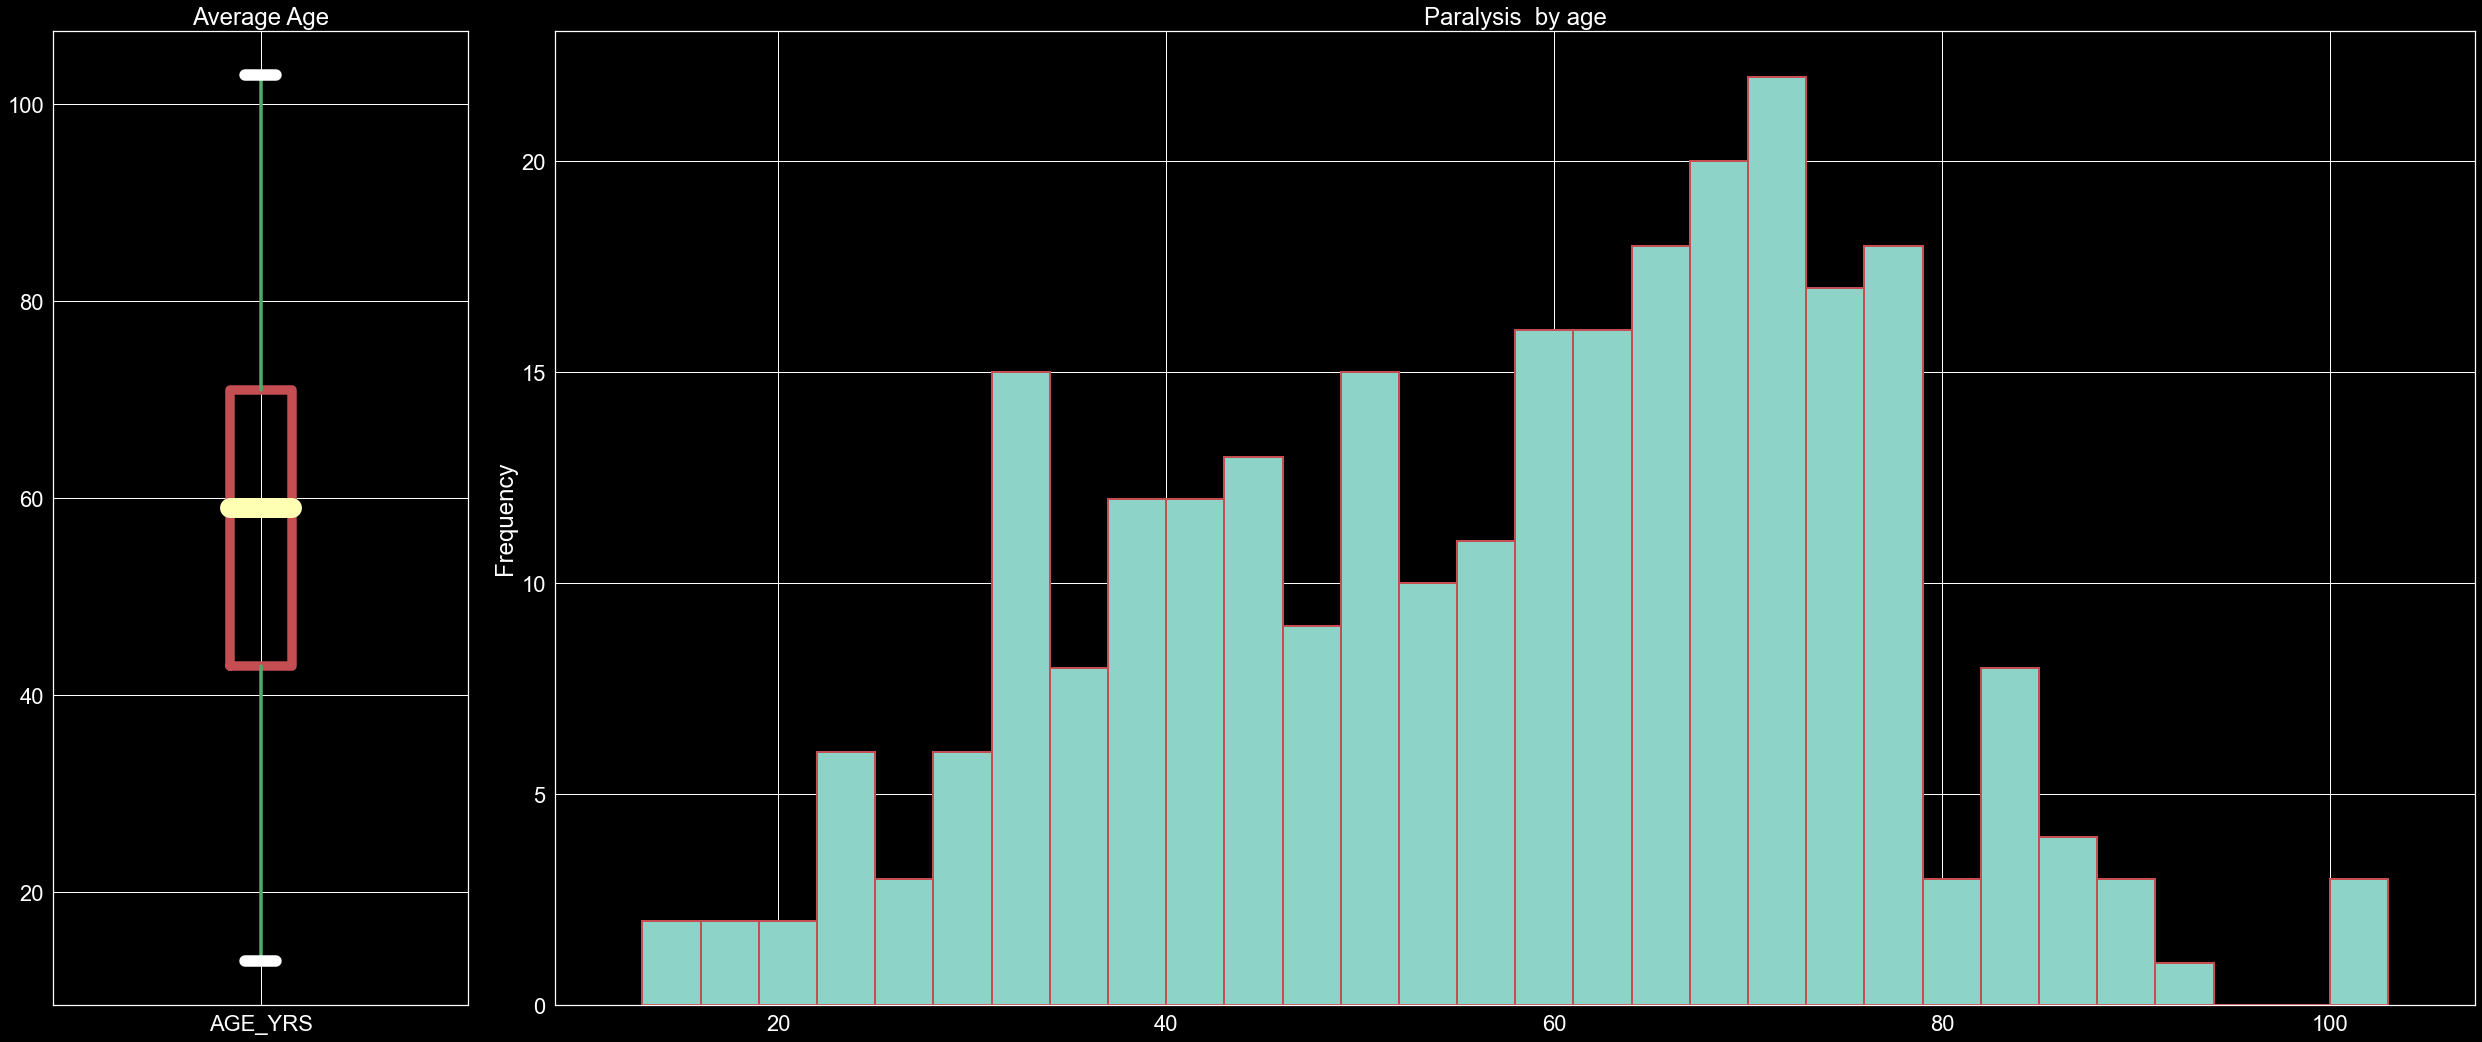

In [21]:
fig = plt.figure()
plt.style.use('dark_background')
ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
PARA['AGE_YRS'].plot(kind='box', figsize=(5,30), ax=ax0, boxprops=dict(linestyle='-', linewidth=9.5, color='r'), 
                medianprops=dict(linestyle='-', linewidth=20),
                whiskerprops=dict(linestyle='-', linewidth=3.5, color='g'), 
                capprops=dict(linestyle='-', linewidth=11.5),)


PARA['AGE_YRS'].plot(kind='hist', bins=30, figsize=(35,15), edgecolor='r', linewidth=2,ax=ax1)
ax0.set_title('Average Age')
ax1.set_title('Paralysis  by age')
fig.tight_layout()

In [22]:
DMYO = D_V_CDC[D_V_CDC.eq("MYOCARDITIS").any(1)]
DMYO['AGE_YRS'].describe()

count    1166.000000
mean       27.696398
std        14.754312
min        12.000000
25%        17.000000
50%        22.000000
75%        34.000000
max        94.000000
Name: AGE_YRS, dtype: float64

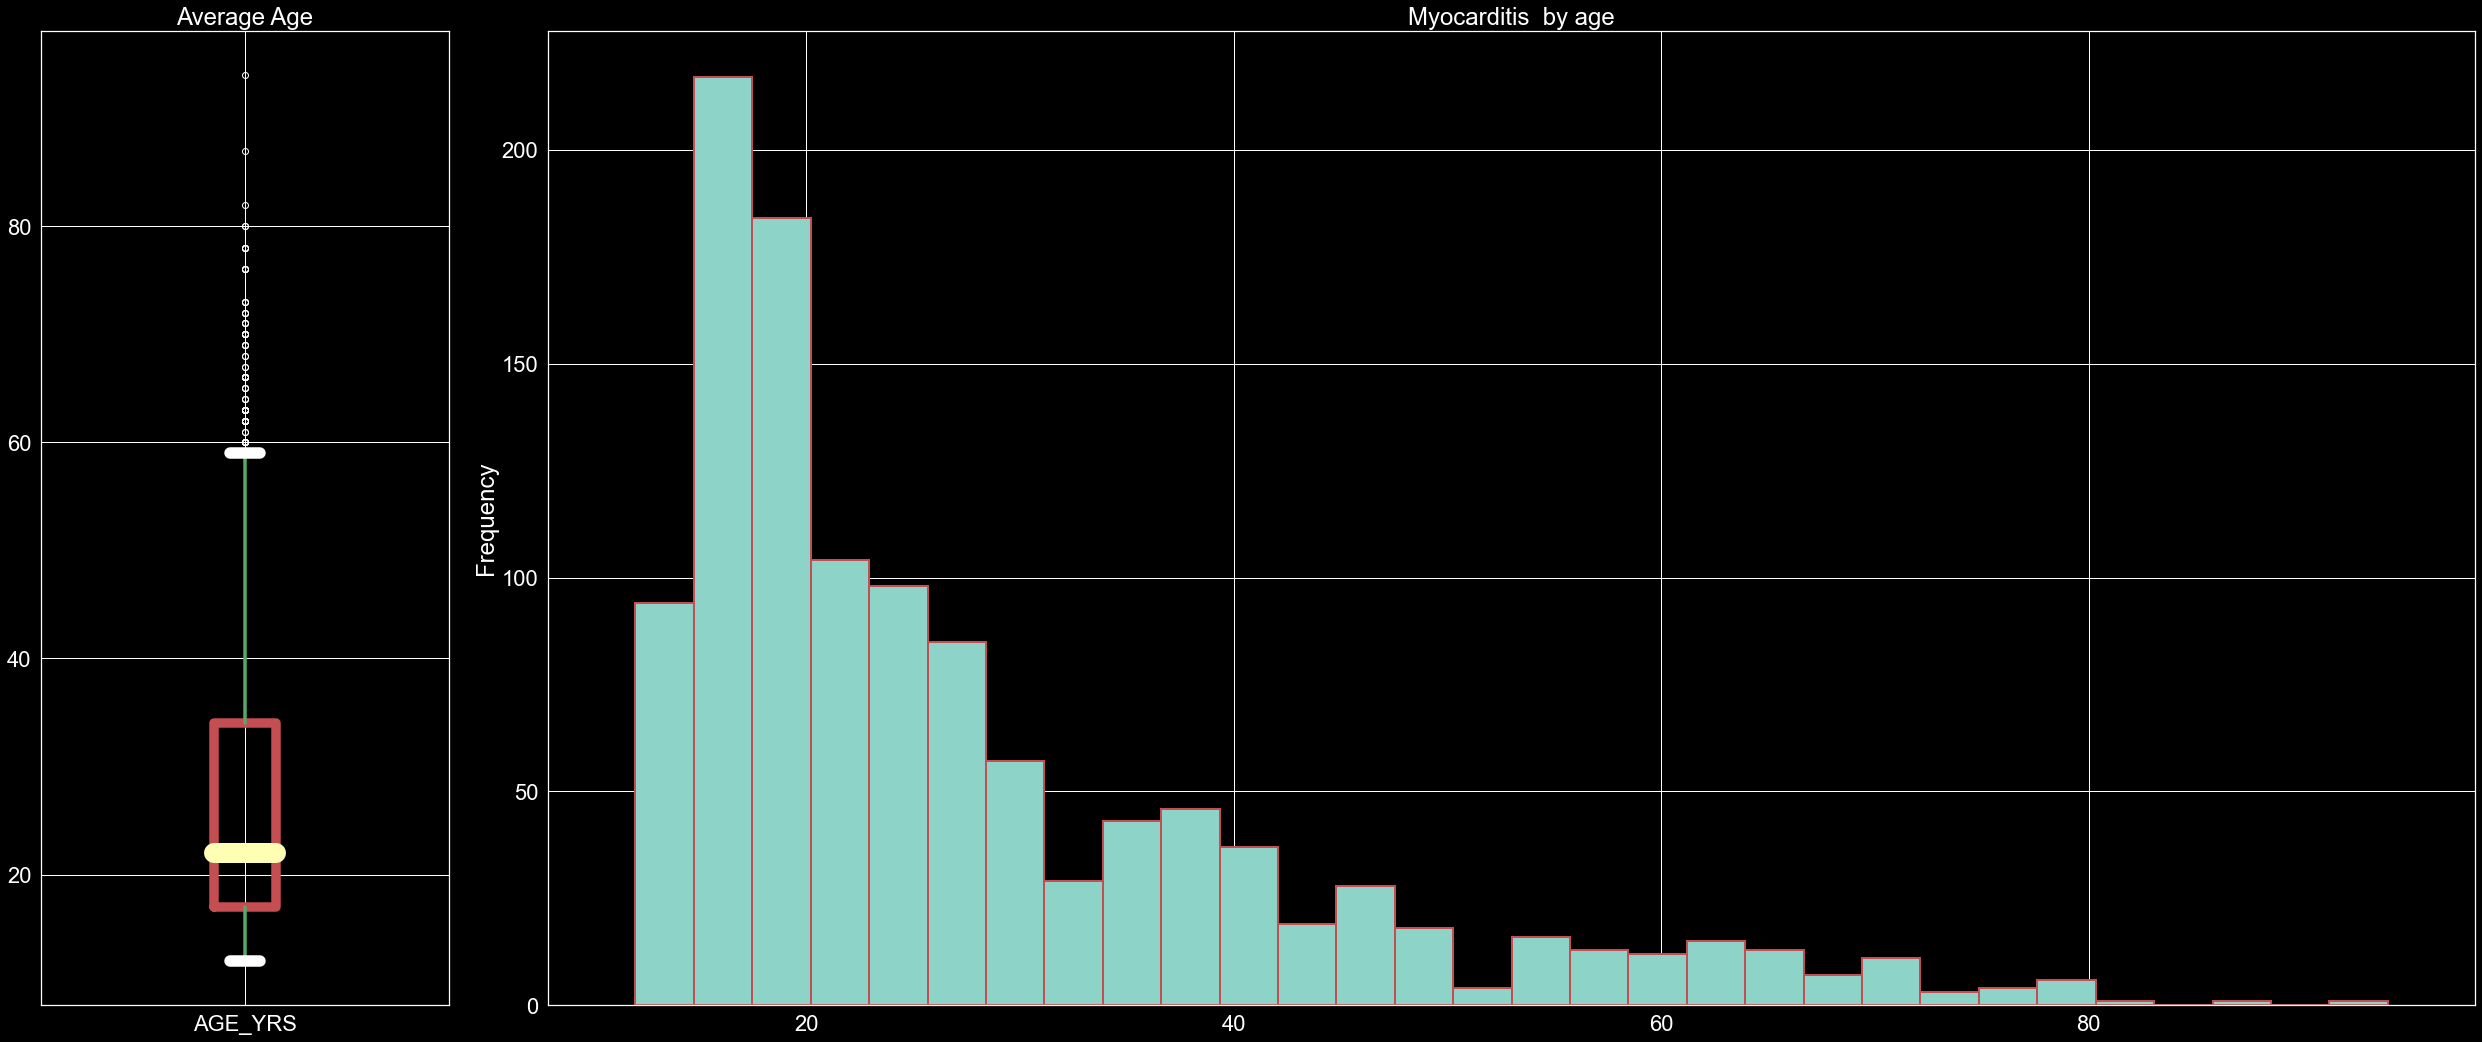

In [23]:
fig = plt.figure()
plt.style.use('dark_background')
ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
DMYO['AGE_YRS'].plot(kind='box', figsize=(5,30), ax=ax0, boxprops=dict(linestyle='-', linewidth=9.5, color='r'), 
                medianprops=dict(linestyle='-', linewidth=20),
                whiskerprops=dict(linestyle='-', linewidth=3.5, color='g'), 
                capprops=dict(linestyle='-', linewidth=11.5),)


DMYO['AGE_YRS'].plot(kind='hist', bins=30, figsize=(35,15), edgecolor='r', linewidth=2,ax=ax1)
ax0.set_title('Average Age')
ax1.set_title('Myocarditis  by age')
fig.tight_layout()

In [24]:
dup = vaers[vaers['VAERS_ID'].duplicated(keep='first')]
dup

VAERS_ID                                  SYMPTOM1  SYMPTOMVERSION1  \
6         916605                                   Pyrexia             24.0   
13        916611                                  Dyspnoea             23.1   
14        916611                      Heart rate decreased             23.1   
15        916611                                    Nausea             23.1   
16        916611                  SARS-CoV-2 antibody test             23.1   
...          ...                                       ...              ...   
542911   1442843                              Panic attack             24.0   
542912   1442843                                  Vomiting             24.0   
542925   1442855                                  Insomnia             24.0   
542928   1442857                      Condition aggravated             24.0   
542929   1442857  Red blood cell sedimentation rate normal             24.0   

                                SYMPTOM2  SYMPTOMVERSION2  \
6       White blood cell count decreased             24.0   
13                               Fatigue             23.1   
14                  Heart rate increased             23.1   
15                                  Pain             23.1   
16              SARS-CoV-2 test negative             23.1   
...                                  ...              ...   
542911                      Paraesthesia             24.0   
542912                               NaN              NaN   
542925                            Nausea             24.0   
542928      Femoroacetabular impingement             24.0   
542929                   Stress fracture             24.0   

                                  SYMPTOM3  SYMPTOMVERSION3  \
6                                      NaN              NaN   
13                        Feeling abnormal             23.1   
14                            Hypertension             23.1   
15                       Pain in extremity             23.1   
16                                     NaN              NaN   
...                                    ...              ...   
542911                       Swelling face             24.0   
542912                                 NaN              NaN   
542925                             Pyrexia             24.0   
542928                      Femur fracture             24.0   
542929  Subchondral insufficiency fracture             24.0   

                                   SYMPTOM4  SYMPTOMVERSION4  \
6                                       NaN              NaN   
13                          Head discomfort             23.1   
14                      Injection site pain             23.1   
15                        Paraesthesia oral             23.1   
16                                      NaN              NaN   
...                                     ...              ...   
542911                       Swollen tongue             24.0   
542912                                  NaN              NaN   
542925                             Tinnitus             24.0   
542928  Magnetic resonance imaging abnormal             24.0   
542929     X-ray of pelvis and hip abnormal             24.0   

                          SYMPTOM5  SYMPTOMVERSION5  
6                              NaN              NaN  
13                        Headache             23.1  
14      Musculoskeletal chest pain             23.1  
15                         Pyrexia             23.1  
16                             NaN              NaN  
...                            ...              ...  
542911                 Tachycardia             24.0  
542912                         NaN              NaN  
542925                         NaN              NaN  
542928                        Pain             24.0  
542929                         NaN              NaN  

[136933 rows x 11 columns]

In [25]:
dup['VAERS_ID'].value_counts()

1306674    21
1400623    21
1019670    20
1277549    19
1230840    19
           ..
1436562     1
1440656     1
1117070     1
1281443     1
991396      1
Name: VAERS_ID, Length: 104466, dtype: int64

In [26]:
dup[dup['VAERS_ID']== 1400623]

VAERS_ID                                       SYMPTOM1  \
510038   1400623                        Bacterial test negative   
510039   1400623              Blood alkaline phosphatase normal   
510040   1400623                     Blood fibrinogen increased   
510041   1400623                            Blood sodium normal   
510042   1400623                   C-reactive protein increased   
510043   1400623                        Coagulation test normal   
510044   1400623                     Coronary artery dilatation   
510045   1400623                                       Dyspnoea   
510046   1400623                          Enterovirus infection   
510047   1400623                          Haemoglobin increased   
510048   1400623                         Immunoglobulin therapy   
510049   1400623                               Lymphocyte count   
510050   1400623                   Mean cell haemoglobin normal   
510051   1400623  Multisystem inflammatory syndrome in children   
510052   1400623                             Oropharyngeal pain   
510053   1400623                           Protein total normal   
510054   1400623            Red blood cell nucleated morphology   
510055   1400623              SARS-CoV-2 antibody test positive   
510056   1400623                           Troponin I increased   
510057   1400623                                 Urine analysis   
510058   1400623                                       Wheezing   

        SYMPTOMVERSION1                                     SYMPTOM2  \
510038             24.0                     Basophil count decreased   
510039             24.0                       Blood bilirubin normal   
510040             24.0                         Blood glucose normal   
510041             24.0                   Blood triglycerides normal   
510042             24.0                       Calcium ionised normal   
510043             24.0                                      Colitis   
510044             24.0                                        Cough   
510045             24.0                               Echocardiogram   
510046             24.0                    Enterovirus test positive   
510047             24.0                    Haemoglobin urine present   
510048             24.0                               Intensive care   
510049             24.0              Lymphocyte percentage decreased   
510050             24.0                      Mean cell volume normal   
510051             24.0                                  Myocarditis   
510052             24.0                                         Pain   
510053             24.0                        Protein urine present   
510054             24.0  Red blood cell sedimentation rate increased   
510055             24.0                  Scan with contrast abnormal   
510056             24.0                           Troponin increased   
510057             24.0                      Urine analysis abnormal   
510058             24.0             White blood cell count increased   

        SYMPTOMVERSION2                                  SYMPTOM3  \
510038             24.0             Basophil percentage decreased   
510039             24.0       Blood bilirubin unconjugated normal   
510040             24.0     Blood lactate dehydrogenase increased   
510041             24.0                         Blood urea normal   
510042             24.0                     Carbon dioxide normal   
510043             24.0             Computerised tomogram abdomen   
510044             24.0                    Culture stool positive   
510045             24.0                         Ejection fraction   
510046             24.0           Eosinophil percentage decreased   
510047             24.0                                  Headache   
510048             24.0  International normalised ratio decreased   
510049             24.0       Magnetic resonance imaging abnormal   
510050             24.0               Mean platelet

In [27]:
vaerv['VAERS_ID'].value_counts()


962303     12
1215401    10
1384808     7
920671      6
1390996     6
           ..
1323563     1
1321512     1
1333798     1
1341986     1
1052670     1
Name: VAERS_ID, Length: 406001, dtype: int64

In [28]:
vaerv[vaerv['VAERS_ID']==920671]

VAERS_ID VAX_TYPE                     VAX_MANU VAX_LOT VAX_DOSE_SERIES  \
3715    920671  COVID19                      MODERNA     NaN               1   
3716    920671  COVID19                      MODERNA     NaN               1   
3717    920671      UNK         UNKNOWN MANUFACTURER     NaN               1   
3718    920671      UNK         UNKNOWN MANUFACTURER     NaN               1   
3719    920671   VARZOS  GLAXOSMITHKLINE BIOLOGICALS     NaN               1   
3720    920671   VARZOS  GLAXOSMITHKLINE BIOLOGICALS     NaN               1   

     VAX_ROUTE VAX_SITE                               VAX_NAME  
3715       SYR       LA            COVID19 (COVID19 (MODERNA))  
3716       SYR       LA            COVID19 (COVID19 (MODERNA))  
3717       SYR       LA  VACCINE NOT SPECIFIED (NO BRAND NAME)  
3718       SYR       LA  VACCINE NOT SPECIFIED (NO BRAND NAME)  
3719       SYR       LA                      ZOSTER (SHINGRIX)  
3720       SYR       LA                      ZOSTER (SHINGRIX)

In [29]:
vaers.drop_duplicates(subset="VAERS_ID", keep='first', inplace=True)
vaerv.drop_duplicates(subset="VAERS_ID", keep='first', inplace=True)

In [30]:
print(len(vaers), len(vaerv), len(vaerd))

405998 406001 406001


In [31]:
vaerv[vaerv['VAERS_ID']==962303]

VAERS_ID VAX_TYPE         VAX_MANU VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
40911    962303  COVID19  PFIZER\BIONTECH     NaN             UNK       NaN   

      VAX_SITE                             VAX_NAME  
40911       LA  COVID19 (COVID19 (PFIZER-BIONTECH))

In [32]:
vaerd[vaerd['VAERS_ID']==962303]

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
42758    962303  01/21/2021    MS     87.0      NaN      NaN   M      NaN   

                                            SYMPTOM_TEXT DIED DATEDIED  \
42758  he smelled some kind of chemical; he began to ...  NaN      NaN   

      L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
42758      NaN      NaN      NaN       NaN    NaN     NaN      U  01/15/2021   

       ONSET_DATE  NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY OTHER_MEDS CUR_ILL  \
42758  01/17/2021      2.0      NaN       UNK      NaN        NaN     NaN   

                                                 HISTORY PRIOR_VAX  \
42758  Medical History/Concurrent Conditions: Auditor...       NaN   

                     SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
42758  USPFIZER INC2021042638          2  01/21/2021          NaN       NaN   

      ER_ED_VISIT ALLERGIES  
42758         NaN       NaN

In [33]:
vaerd['VAERS_ID'].duplicated().value_counts()

False    406001
Name: VAERS_ID, dtype: int64

In [34]:
V_CDC = vaerd.merge(vaerv, on= "VAERS_ID", how='inner')
V_CDC = V_CDC.merge(vaers, on= "VAERS_ID", how='inner')

In [35]:
len(V_CDC)

405998

In [36]:
xx=V_CDC[V_CDC['STATE']=='TX']
xx.tail(15)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
405714   1442522  07/02/2021    TX     48.0      NaN      NaN   M      NaN   
405719   1442527  07/02/2021    TX     49.0      NaN      NaN   M      NaN   
405739   1442547  07/02/2021    TX     55.0      NaN      NaN   F      NaN   
405754   1442562  07/02/2021    TX      NaN      NaN      NaN   F      NaN   
405774   1442582  07/02/2021    TX     53.0      NaN      NaN   F      NaN   
405804   1442614  07/02/2021    TX     75.0      NaN      NaN   F      NaN   
405814   1442624  07/02/2021    TX     75.0      NaN      NaN   F      NaN   
405816   1442626  07/02/2021    TX     65.0      NaN      NaN   F      NaN   
405864   1442674  07/02/2021    TX     50.0      NaN      NaN   M      NaN   
405868   1442678  07/02/2021    TX     62.0      NaN      NaN   F      NaN   
405877   1442687  07/02/2021    TX      NaN      NaN      NaN   F      NaN   
405913   1442769  07/02/2021    TX      NaN      NaN      NaN   U      NaN   
405923   1442779  07/02/2021    TX      NaN      NaN      NaN   F      NaN   
405954   1442811  07/02/2021    TX      NaN      NaN      NaN   M      NaN   
405992   1442853  07/02/2021    TX     30.0     30.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
405714  Sore arm; This is a spontaneous report from a ...  NaN      NaN   
405719  Inappropriate schedule of vaccine administered...  NaN      NaN   
405739  Oxygen saturation low; Night sweats; Diarrhea;...  NaN      NaN   
405754  She has swelling of gland in her armpits; This...  NaN      NaN   
405774  High fever; Chills; Body aches; Headache; Hear...  NaN      NaN   
405804  Broke out in a rash on my face and it was very...  NaN      NaN   
405814  broke out a rash all over her face/ bad rash o...  NaN      NaN   
405816  Chills; Severe headache; Really bad tinnitus; ...  NaN      NaN   
405864  Got Shingles within few days of second shot.; ...  NaN      NaN   
405868  Major pain in her joints/bones, in her hands a...  NaN      NaN   
405877  Tested positive for COVID-19; Tested positive ...  NaN      NaN   
405913  PATIENT GIVEN A SYRINGE THAT PASSED THE 6 HOUR...  NaN      NaN   
405923  SUSPECTED COVID-19 INFECTION; This spontaneous...  NaN      NaN   
405954  SUSPECTED COVID-19 INFECTION (TESTED POSITIVE ...  NaN      NaN   
405992  Systemic: Patient experienced swelling of left...  NaN      NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
405714      NaN      NaN      NaN       NaN    NaN     NaN      N  03/23/2021   
405719      NaN      NaN      NaN       NaN    NaN     NaN      N  03/23/2021   
405739      NaN      NaN      NaN       NaN    NaN     NaN      N  03/06/2021   
405754      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
405774      NaN      NaN      NaN       NaN    NaN     NaN      N  04/14/2021   
405804      NaN      NaN      NaN       NaN    NaN     NaN      U  06/02/2021   
405814      NaN      NaN      NaN       NaN    NaN     NaN      N  06/02/2021   
405816      NaN      NaN      NaN       NaN    NaN     NaN      N  04/16/2021   
405864      NaN      NaN      NaN       NaN    NaN     NaN      N  04/26/2021   
405868      NaN      NaN      NaN       NaN    NaN     NaN      N  06/01/2021   
405877      NaN      NaN      NaN       NaN    NaN     NaN      N  04/01/2021   
405913      NaN      NaN      NaN       NaN    NaN     NaN      U         NaN   
405923      NaN      NaN      NaN       NaN    NaN     NaN      U         NaN   
405954      NaN      NaN      NaN       NaN    NaN     NaN      U         NaN   
405992      NaN      NaN      NaN       NaN    NaN     NaN      N  06/29/2021   

        ONSET_DATE  NUMDAYS  \
405714  03/23/2021      0.0   
405719  03/14/2021      NaN   
405739  03/14/2021      8.0   
405754         NaN      NaN   
405774  04/14/2021      0.0   
405804  06/01/2021      NaN   
405814         NaN      NaN   
405816  04/17

In [37]:
V_CDC[V_CDC.eq("ITP").any(1)]

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
18371     934079  01/11/2021    CA     59.0     59.0      NaN   F      NaN   
19556     935500  01/11/2021    AZ     50.0     50.0      NaN   F      NaN   
33463     951354  01/17/2021    NY     36.0     36.0      NaN   F      NaN   
35211     953404  01/18/2021    FL     70.0     70.0      NaN   M      NaN   
36219     954534  01/19/2021    CA     29.0     29.0      NaN   F      NaN   
80759    1012079  02/05/2021    NJ     57.0      NaN      NaN   F      NaN   
83088    1009717  02/07/2021    NJ     33.0     33.0      NaN   F      NaN   
83298    1009944  02/07/2021    FL     66.0     66.0      NaN   F      NaN   
95670    1027099  02/12/2021    WI     38.0     38.0      NaN   F      NaN   
102864   1036489  02/17/2021    NY     41.0     41.0      NaN   F      NaN   
102929   1036558  02/17/2021   NaN     69.0     69.0      NaN   M      NaN   
111034   1046835  02/22/2021    VA     65.0     65.0      NaN   M      NaN   
115675   1053348  02/24/2021    TX     75.0     75.0      NaN   F      NaN   
118170   1056805  02/26/2021    MT     37.0     37.0      NaN   F      NaN   
118671   1057756  02/26/2021    MI     80.0     80.0      NaN   M      NaN   
145232   1091185  03/11/2021    CT     58.0     58.0      NaN   F      NaN   
157157   1104764  03/16/2021    MD     54.0     54.0      NaN   F      NaN   
159816   1108146  03/17/2021    KY     49.0     49.0      NaN   M      NaN   
167642   1118029  03/20/2021    ND     29.0     29.0      NaN   F      NaN   
174181   1126301  03/23/2021    CT     73.0     73.0      NaN   F      NaN   
177302   1130479  03/24/2021    IN     44.0     44.0      NaN   F      NaN   
192910   1149189  03/30/2021    CO     49.0     49.0      NaN   M      NaN   
194403   1151140  03/31/2021    IL     83.0     83.0      NaN   M      NaN   
214502   1175576  04/07/2021    AR     30.0     30.0      NaN   M      NaN   
228195   1191480  04/10/2021    FL     55.0     55.0      NaN   F      NaN   
229671   1193050  04/11/2021    DC     59.0     59.0      NaN   F      NaN   
237448   1201925  04/13/2021    TX     38.0     38.0      NaN   F      NaN   
240961   1205703  04/13/2021    NC     64.0     64.0      NaN   F      NaN   
241528   1206280  04/14/2021    MI     45.0     45.0      NaN   M      NaN   
243768   1208786  04/14/2021    CA     79.0     79.0      NaN   F      NaN   
246732   1212406  04/15/2021    TX     24.0     24.0      NaN   M      NaN   
251231   1218060  04/16/2021    MI     70.0     70.0      NaN   M      NaN   
279581   1251928  04/24/2021    PA     32.0     32.0      NaN   F      NaN   
296600   1271942  04/29/2021    NY     57.0     57.0      NaN   F      NaN   
335570   1322801  05/17/2021    GA     75.0     75.0      NaN   M      NaN   
346796   1341089  05/22/2021    TX     47.0     47.0      NaN   F      NaN   
372792   1382280  06/08/2021    VA     23.0     23.0      NaN   F      NaN   
391461   1415266  06/21/2021   NaN     39.0     39.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
18371   25 min after injection and said she had itchin...  NaN      NaN   
19556   Right upper chest pain, constant, pain increas...  NaN      NaN   
33463   Patient presented with diffuse petechiae, easy...  NaN      NaN   
35211   Severe rash. Platelets drop to almost needing ...  NaN      NaN   
36219   Pfizer-BioNTech COVID-19 Vaccine EUA Diarrhea ...  NaN      NaN   
80759   My platelets dropped from 382k to under 10k 2 ...  NaN      NaN   
83088   Hives developed on bilateral elbows and on the...  NaN      NaN   
83298   Mild fatigue, muscle soreness, body aches, occ...  NaN      NaN   
95670   Sore arm, body aches, headache, fever, chills,...  NaN      NaN   
102864  Thrombocytopenia. Platelets went from 175K day...  NaN      NaN   
102929  severe fatigue a week after injection for seve...  NaN      NaN   
111034  experienced epistaxis 2-3 x daily  for approx ...  NaN   

In [38]:

print(xx['VAX_MANU'].unique())
xxx=xx[xx['VAX_MANU']=='PFIZER\\BIONTECH']
xxx

['MODERNA' 'SEQIRUS, INC.' 'PFIZER\\BIONTECH' 'UNKNOWN MANUFACTURER'
 'GLAXOSMITHKLINE BIOLOGICALS' 'SANOFI PASTEUR' 'PFIZER\\WYETH'
 'PROTEIN SCIENCES CORPORATION' 'MERCK & CO. INC.' 'BERNA BIOTECH, LTD.'
 'JANSSEN' 'NOVARTIS VACCINES AND DIAGNOSTICS']


VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
120       916723  01/01/2021    TX     39.0     39.0      NaN   M      NaN   
175       916785  01/01/2021    TX     35.0     35.0      NaN   F      NaN   
273       916890  01/01/2021    TX     39.0     39.0      NaN   F      NaN   
345       916966  01/01/2021    TX     51.0     51.0      NaN   F      NaN   
452       917078  01/01/2021    TX     52.0     52.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
405816   1442626  07/02/2021    TX     65.0      NaN      NaN   F      NaN   
405864   1442674  07/02/2021    TX     50.0      NaN      NaN   M      NaN   
405868   1442678  07/02/2021    TX     62.0      NaN      NaN   F      NaN   
405877   1442687  07/02/2021    TX      NaN      NaN      NaN   F      NaN   
405992   1442853  07/02/2021    TX     30.0     30.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
120     Headache and myalgias started day 2 after vacc...  NaN      NaN   
175     After receiving the vaccine I began to feel li...  NaN      NaN   
273               HIVES, SOB, THROAT CLOSING UP, WHEEZING  NaN      NaN   
345     *12/21-22-increased soreness at site of inject...  NaN      NaN   
452     10MINS AFTER THE VACCINATION  LEFT SIDED FACIA...  NaN      NaN   
...                                                   ...  ...      ...   
405816  Chills; Severe headache; Really bad tinnitus; ...  NaN      NaN   
405864  Got Shingles within few days of second shot.; ...  NaN      NaN   
405868  Major pain in her joints/bones, in her hands a...  NaN      NaN   
405877  Tested positive for COVID-19; Tested positive ...  NaN      NaN   
405992  Systemic: Patient experienced swelling of left...  NaN      NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
120         NaN      NaN      NaN       NaN    NaN     NaN      N  12/18/2020   
175         NaN      NaN      NaN       NaN    NaN     NaN      N  12/28/2020   
273           Y      NaN        Y       4.0    NaN     NaN      Y  12/01/2020   
345         NaN      NaN      NaN       NaN    NaN     NaN      U  12/21/2020   
452         NaN      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020   
...         ...      ...      ...       ...    ...     ...    ...         ...   
405816      NaN      NaN      NaN       NaN    NaN     NaN      N  04/16/2021   
405864      NaN      NaN      NaN       NaN    NaN     NaN      N  04/26/2021   
405868      NaN      NaN      NaN       NaN    NaN     NaN      N  06/01/2021   
405877      NaN      NaN      NaN       NaN    NaN     NaN      N  04/01/2021   
405992      NaN      NaN      NaN       NaN    NaN     NaN      N  06/29/2021   

        ONSET_DATE  NUMDAYS  \
120     12/27/2020      9.0   
175     12/28/2020      0.0   
273     12/22/2020     21.0   
345     12/28/2020      7.0   
452     12/31/2020      0.0   
...            ...      ...   
405816  04/17/2021      1.0   
405864  04/29/2021      3.0   
405868  06/01/2021      0.0   
405877         NaN      NaN   
405992  07/01/2021      2.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
120                                                   NaN       UNK      NaN   
175     BMP, CBC, Cardiac Profile, CXR, COVID, Influen...       PVT      NaN   
273                         COVID TEST, LABS, Chest-X-Ray       WRK      NaN   
345     *12/30-Covid Lab with 24 hour turn around-nega...       OTH      NaN   
452                                                   NaN       SEN      NaN   
...                                                   ...       ...      ...   
405816                                                NaN       UNK      NaN   
405864                                                NaN       PHM      NaN   
405868                                                NaN       PHM      NaN   
405877  Test Date: 2021;

In [39]:
V_CDC['VAX_NAME'].value_counts()

COVID19 (COVID19 (MODERNA))                      182426
COVID19 (COVID19 (PFIZER-BIONTECH))              176907
COVID19 (COVID19 (JANSSEN))                       42250
COVID19 (COVID19 (UNKNOWN))                         938
VACCINE NOT SPECIFIED (NO BRAND NAME)               935
                                                  ...  
INFLUENZA (SEASONAL) (FLUARIX)                        1
MENINGOCOCCAL (NO BRAND NAME)                         1
INFLUENZA (H1N1) (H1N1 (MONOVALENT) (SANOFI))         1
POLIO VIRUS, INACT. (POLIOVAX)                        1
YELLOW FEVER (STAMARIL)                               1
Name: VAX_NAME, Length: 92, dtype: int64

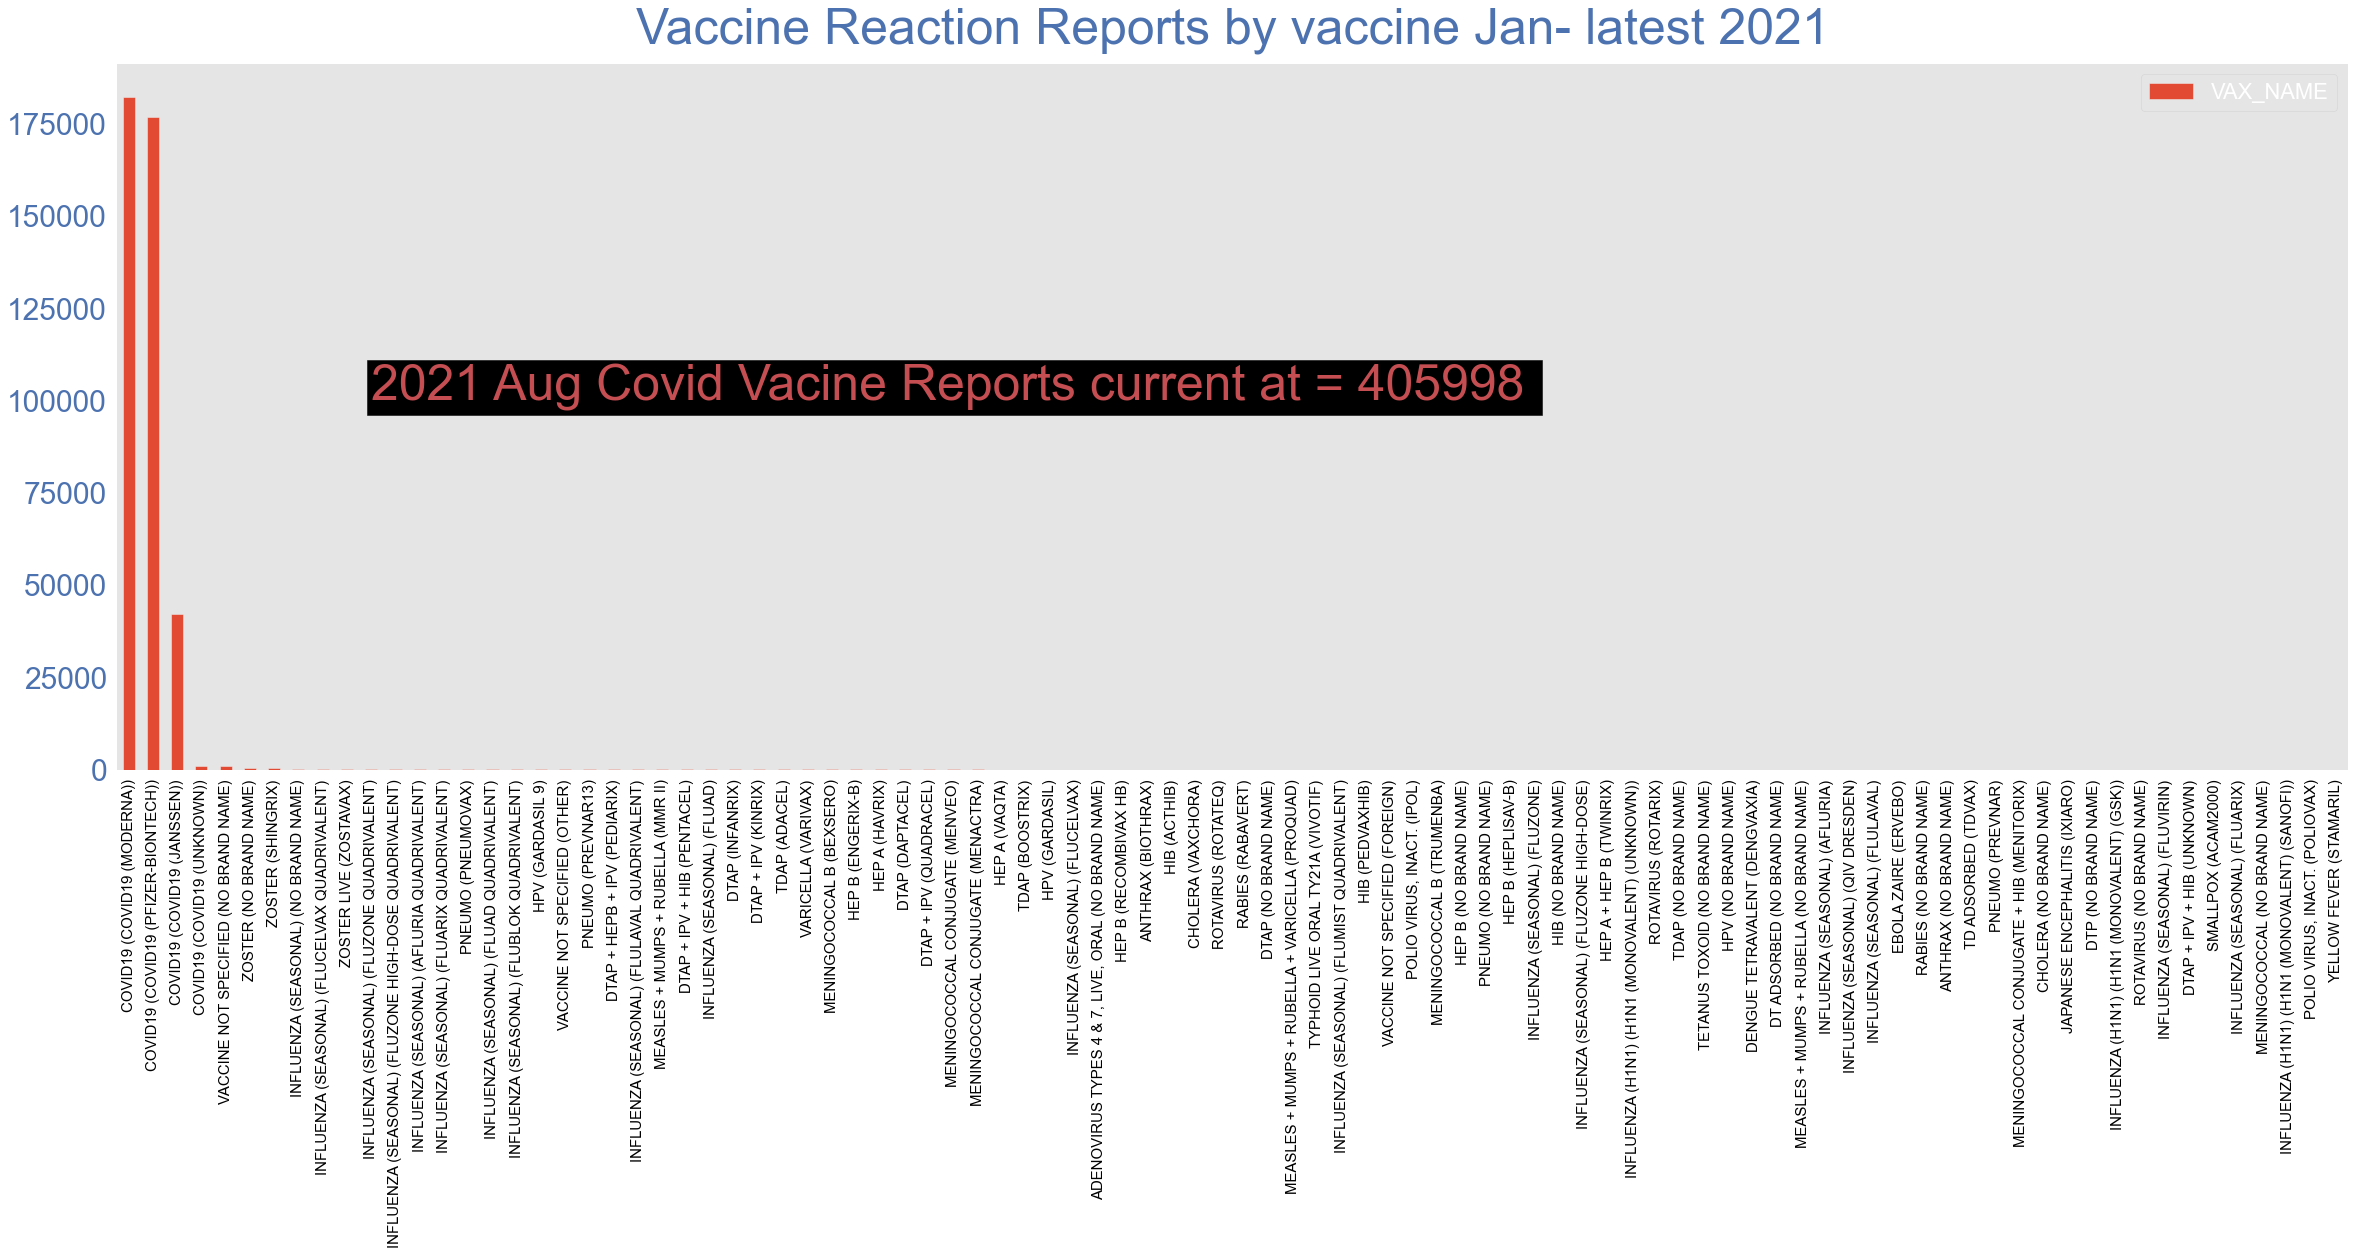

In [40]:
plt.style.use('ggplot')
plt.title("Vaccine Reaction Reports by vaccine Jan- latest 2021", fontsize=50, pad=20, color='b')
V_CDC['VAX_NAME'].value_counts().plot(kind='bar', figsize=(40,13))
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=30, color='b')
t = len(V_CDC)
plt.text(10, 100000, '2021 Aug Covid Vacine Reports current at = %i ' %(t), color='r', fontsize=50, backgroundcolor='black')
plt.legend()
plt.grid(color='r')
plt.show()

In [41]:
m = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (MODERNA))"]
p = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (PFIZER-BIONTECH))"]
j = V_CDC[V_CDC['VAX_NAME']=="COVID19 (COVID19 (JANSSEN))"]
VM_CDC = pd.concat([m,p,j])
VM_CDC

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0         916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1         916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
3         916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4         916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   
6         916606  01/01/2021    NV     44.0     44.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
405958   1442815  07/02/2021   NaN      NaN      NaN      NaN   F      NaN   
405959   1442816  07/02/2021   NaN      NaN      NaN      NaN   U      NaN   
405960   1442817  07/02/2021   NaN      NaN      NaN      NaN   U      NaN   
405961   1442818  07/02/2021   NaN      NaN      NaN      NaN   U      NaN   
405997   1442858  07/02/2021    ME     46.0     46.0      NaN   F      NaN   

                                             SYMPTOM_TEXT DIED DATEDIED  \
0       Right side of epiglottis swelled up and hinder...  NaN      NaN   
1       Approximately 30 min post vaccination administ...  NaN      NaN   
3       extreme fatigue, dizziness,. could not lift my...  NaN      NaN   
4       Injection site swelling, redness, warm to the ...  NaN      NaN   
6       patient called back the next day and stated he...  NaN      NaN   
...                                                   ...  ...      ...   
405958  SORE ARM; This spontaneous report received fro...  NaN      NaN   
405959  MIGRAINE; CHILLS; FEVER; This spontaneous repo...  NaN      NaN   
405960  FEVER OF 102; WIPED ME OUT; This spontaneous r...  NaN      NaN   
405961  BODY ACHES; CHILLS; HIGH FEVER; This spontaneo...  NaN      NaN   
405997  1 or 2 days after vaccination administration -...  NaN      NaN   

       L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  \
0           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020   
1           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020   
3           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/23/2020   
4           NaN      NaN      NaN       NaN    NaN     NaN      N  12/22/2020   
6           NaN      NaN      NaN       NaN    NaN     NaN      Y  12/29/2020   
...         ...      ...      ...       ...    ...     ...    ...         ...   
405958      NaN      NaN      NaN       NaN    NaN     NaN      Y         NaN   
405959      NaN      NaN      NaN       NaN    NaN     NaN      U         NaN   
405960      NaN      NaN      NaN       NaN    NaN     NaN      U         NaN   
405961      NaN      NaN      NaN       NaN    NaN     NaN      N         NaN   
405997      NaN      NaN      NaN       NaN    NaN     NaN      U  04/01/2021   

        ONSET_DATE  NUMDAYS  \
0       12/30/2020      2.0   
1       12/31/2020      0.0   
3       12/23/2020      0.0   
4       12/29/2020      7.0   
6       12/29/2020      0.0   
...            ...      ...   
405958         NaN      NaN   
405959         NaN      NaN   
405960         NaN      NaN   
405961         NaN      NaN   
405997  04/01/2021      0.0   

                                                 LAB_DATA V_ADMINBY V_FUNDBY  \
0                                                    None       PVT      NaN   
1                                                     NaN       SEN      NaN   
3                                                    none       WRK      NaN   
4                                                     NaN       PUB      NaN   
6       Did not seek medical care. Treated self at hom...       PVT      NaN   
...                                                   ...       ...      ...   
405958                                                NaN       OTH      NaN   
405959                                                NaN       OTH      NaN   
405960  Test Name: Body temperature; Result Unstructur...       OTH      NaN   
405961                  

In [42]:
VM_CDC['AGE_YRS'].value_counts

<bound method IndexOpsMixin.value_counts of 0         33.0
1         73.0
3         58.0
4         47.0
6         44.0
          ... 
405958     NaN
405959     NaN
405960     NaN
405961     NaN
405997    46.0
Name: AGE_YRS, Length: 401583, dtype: float64>

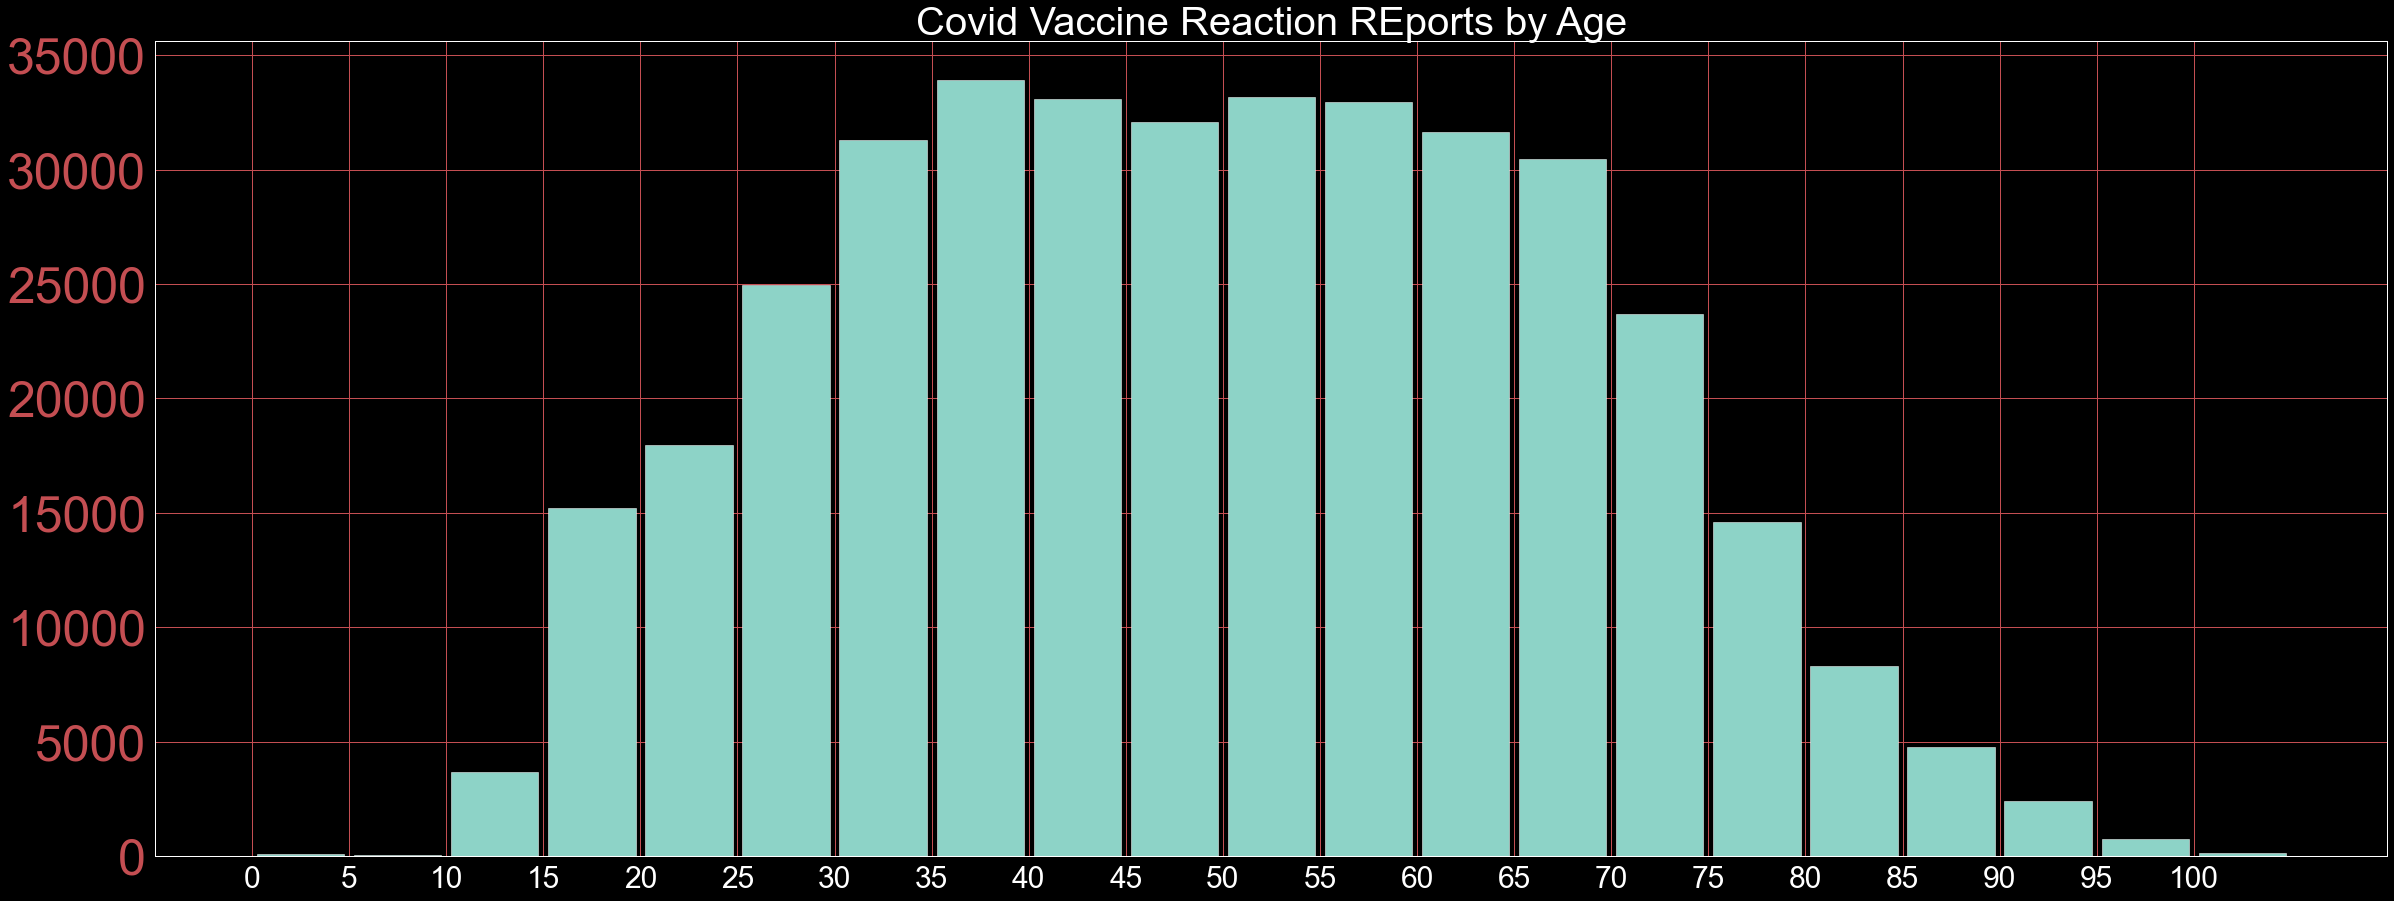

In [43]:
plt.style.use('dark_background')
VM_CDC['AGE_YRS'].hist(bins=range(0,110,5), figsize=(40,15), rwidth=0.9)
plt.title("Covid Vaccine Reaction REports by Age", fontsize=40)
plt.xticks(np.arange(0,105,5), fontsize=30)
plt.yticks(fontsize=50, color='r')
plt.grid(color='r', visible=True)
plt.show()

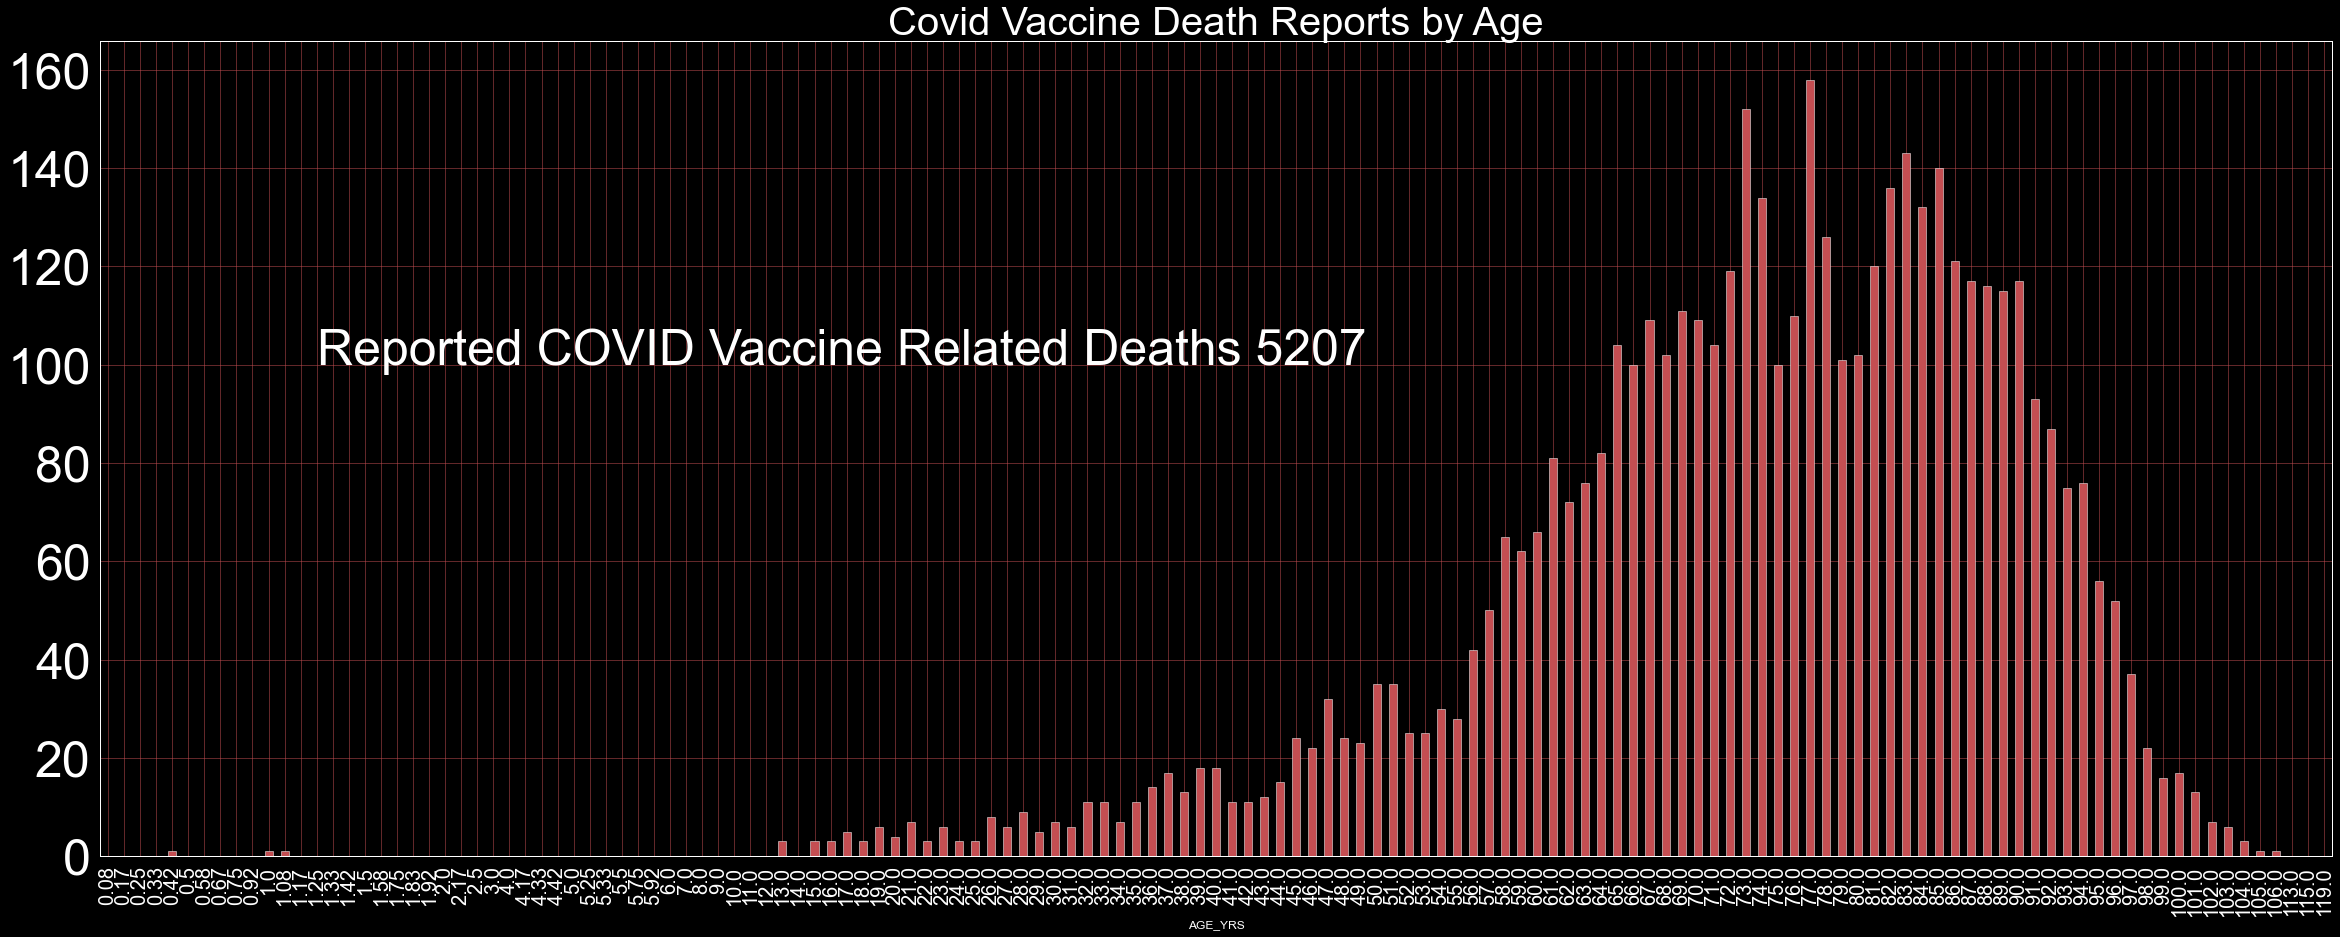

In [44]:
VM_CDC.groupby('AGE_YRS')['DIED'].count().plot.bar(figsize=(40,15), color='r')
plt.title("Covid Vaccine Death Reports by Age", fontsize=40)
plt.xticks(fontsize=20)
m = VM_CDC['DIED'].count()
plt.text(13, 100, "Reported COVID Vaccine Related Deaths %i" %(m), fontsize=50)
plt.yticks(fontsize=50, color='w')
plt.grid(color='r', visible=True, alpha=0.5)
plt.show()

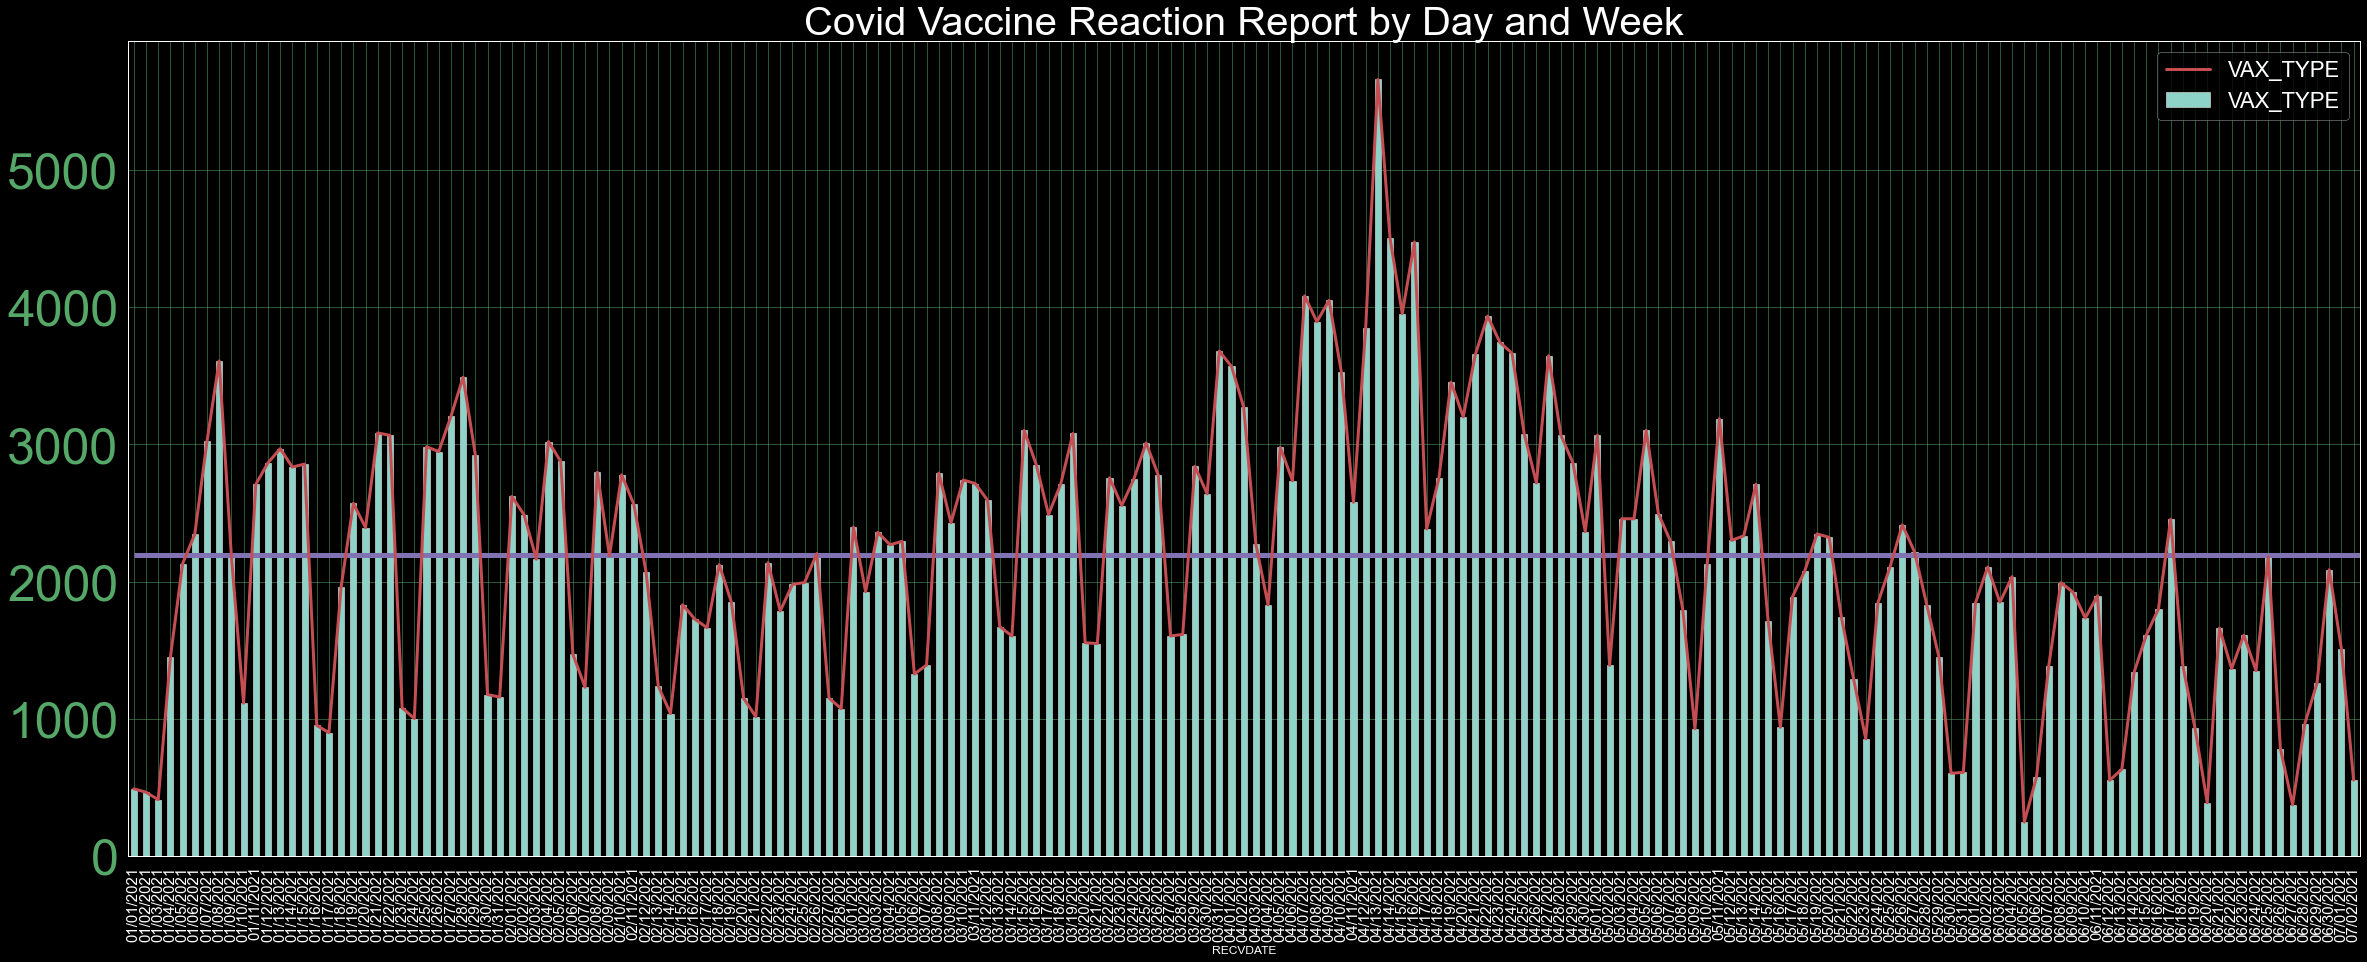

2194.44262295082


In [45]:
ax1= VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().rolling(1,min_periods=1).sum()
ax2 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count()
ax3 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().mean()
ax1.plot(kind='line', figsize=(40,15), color='r', linewidth=3)
ax2.plot(kind='bar')

plt.hlines(ax3,0,len(ax2),linewidth=5,color='m')
plt.title("Covid Vaccine Reaction Report by Day and Week", fontsize=40)
plt.xticks(fontsize=15)
plt.yticks(fontsize=50, color='g')
plt.grid(color='g', alpha=.5, visible=True)
plt.legend()
plt.show()
print(ax3)

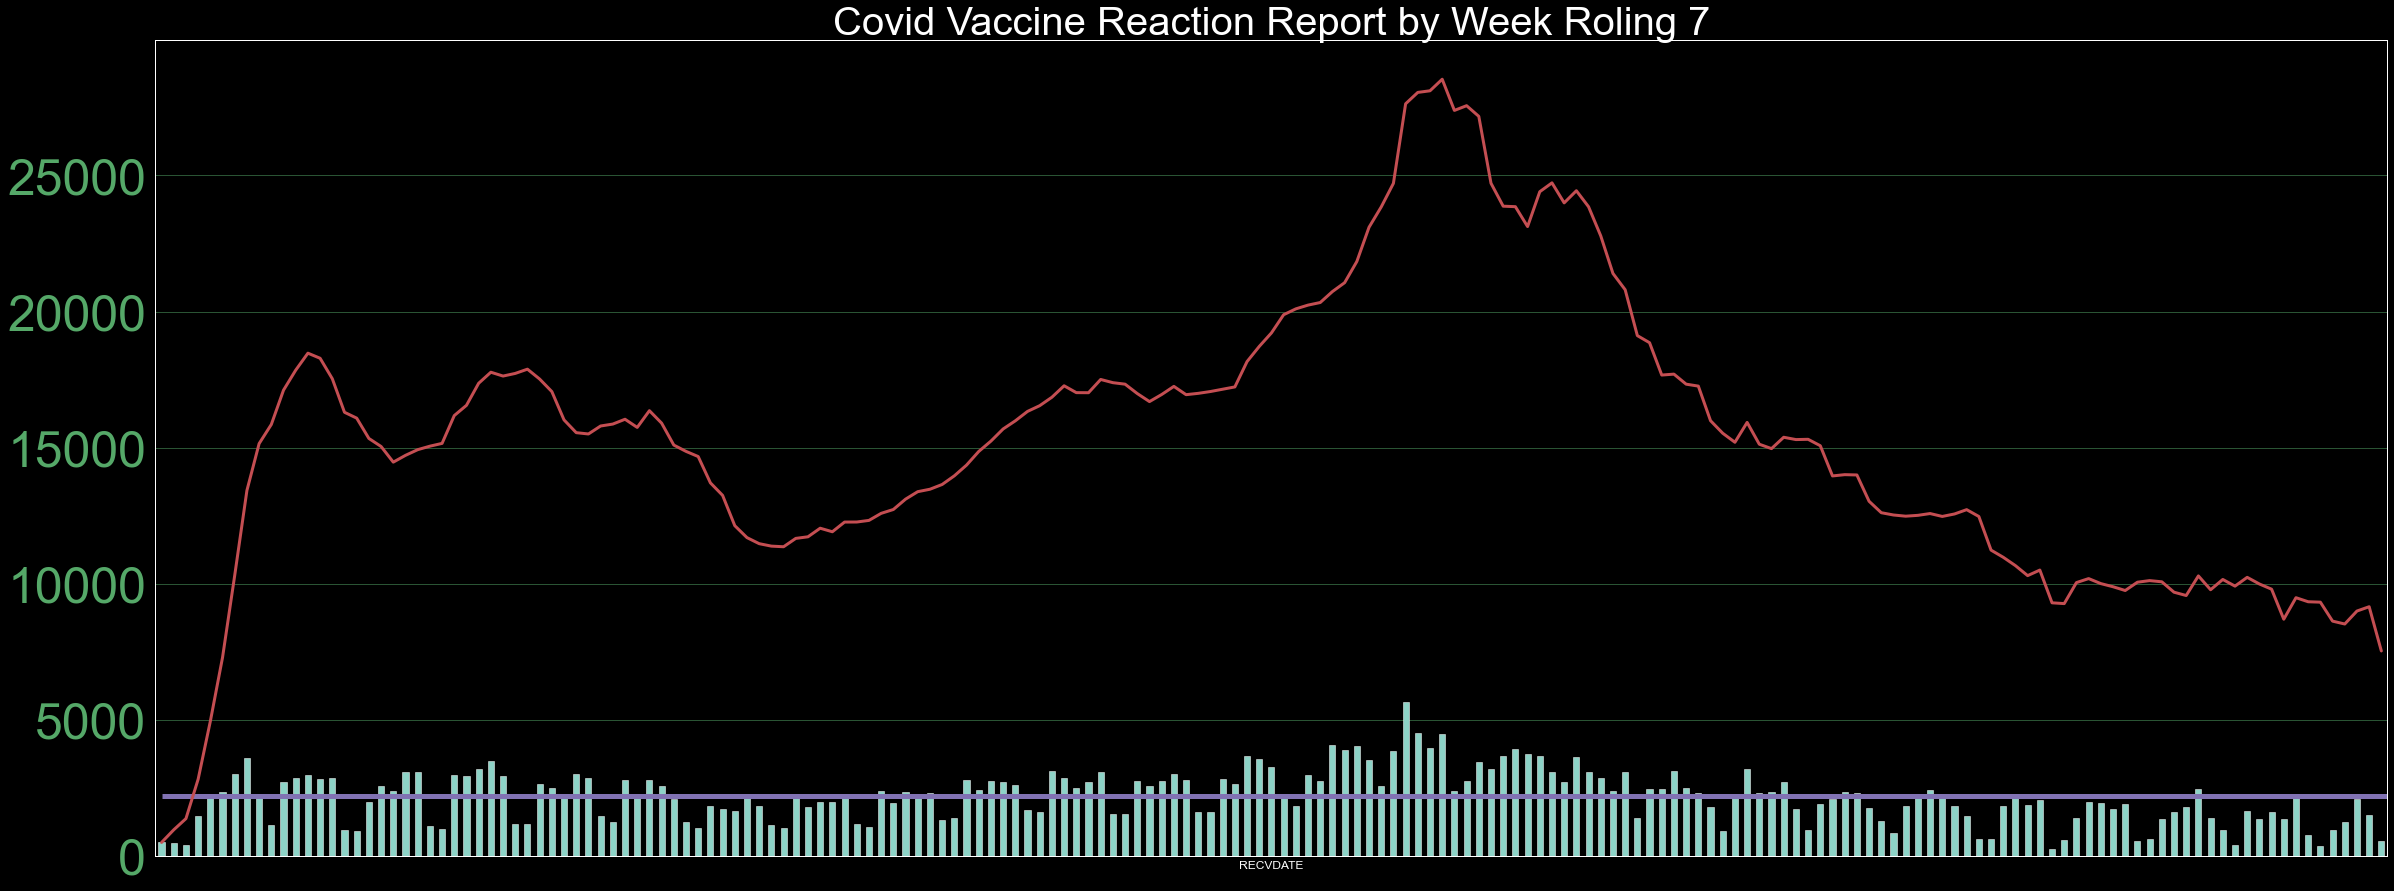

2194.44262295082


In [46]:
ax1= VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().rolling(7,min_periods=1).sum()
ax2 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count()
ax3 = VM_CDC.groupby("RECVDATE")["VAX_TYPE"].count().mean()
ax1.plot(kind='line', figsize=(40,15), color='r', linewidth=3)
ax2.plot(kind='bar')

plt.hlines(ax3,0,len(ax2),linewidth=5,color='m')
plt.title("Covid Vaccine Reaction Report by Week Roling 7", fontsize=40)
plt.xticks([])
plt.yticks(fontsize=50, color='g')
plt.grid(color='g', alpha=.5, visible=True)
#plt.legend()
plt.show()
print(ax3)

In [47]:
VM_CDC['SYMPTOM_TEXT'].fillna('none')

0         Right side of epiglottis swelled up and hinder...
1         Approximately 30 min post vaccination administ...
3         extreme fatigue, dizziness,. could not lift my...
4         Injection site swelling, redness, warm to the ...
6         patient called back the next day and stated he...
                                ...                        
405958    SORE ARM; This spontaneous report received fro...
405959    MIGRAINE; CHILLS; FEVER; This spontaneous repo...
405960    FEVER OF 102; WIPED ME OUT; This spontaneous r...
405961    BODY ACHES; CHILLS; HIGH FEVER; This spontaneo...
405997    1 or 2 days after vaccination administration -...
Name: SYMPTOM_TEXT, Length: 401583, dtype: object

In [48]:
lc = list()
VMZ= VM_CDC[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5' ]].apply(pd.Series.value_counts).fillna(0)
lc = VMZ.sort_values(by=['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5' ], ascending=False).head(20)
lc['TOT'] = lc.SYMPTOM1 + lc.SYMPTOM2 + lc.SYMPTOM3 + lc.SYMPTOM4 +lc.SYMPTOM5 
g= [lambda x,y: x*int(y) for x in lc.index]

In [49]:
VMZ['SYMPTOM5'].sum() # how many has 5 or more symptoms

144757.0

In [50]:
VM_CDC.head()

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1    916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
3    916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4    916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   
6    916606  01/01/2021    NV     44.0     44.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   
1  Approximately 30 min post vaccination administ...  NaN      NaN      NaN   
3  extreme fatigue, dizziness,. could not lift my...  NaN      NaN      NaN   
4  Injection site swelling, redness, warm to the ...  NaN      NaN      NaN   
6  patient called back the next day and stated he...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020  12/30/2020   
1      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020  12/31/2020   
3      NaN      NaN       NaN    NaN     NaN      Y  12/23/2020  12/23/2020   
4      NaN      NaN       NaN    NaN     NaN      N  12/22/2020  12/29/2020   
6      NaN      NaN       NaN    NaN     NaN      Y  12/29/2020  12/29/2020   

   NUMDAYS                                           LAB_DATA V_ADMINBY  \
0      2.0                                               None       PVT   
1      0.0                                                NaN       SEN   
3      0.0                                               none       WRK   
4      7.0                                                NaN       PUB   
6      0.0  Did not seek medical care. Treated self at hom...       PVT   

  V_FUNDBY                                         OTHER_MEDS  \
0      NaN                                               None   
1      NaN  Patient residing at nursing facility. See pati...   
3      NaN                                               none   
4      NaN                                                 Na   
6      NaN                                                NaN   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
3                                   kidney infection   
4                                                 Na   
6                                                NaN   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   
6                                                NaN   

                                           PRIOR_VAX SPLTTYPE  FORM_VERS  \
0                                                NaN      NaN          2   
1                                                NaN      NaN          2   
3  got measles from measel shot, mums from mumps ...      NaN          2   
4                                                NaN      NaN          2   
6                                                NaN      NaN          2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   
6  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES VAX_TYPE VAX_MANU  \
0                                  Pcn and bee venom  COVID19  MODERNA   
1                                            "Dairy"  COVID19  MODERNA   
3  Diclofenac, novacaine, lidocaine, pickles, tom...  COVID19  MODERNA   
4                               

In [52]:
VMC = VM_CDC[VM_CDC['SYMPTOM_TEXT'].str.contains('myocarditi')==True]
pd.set_option('display.max_colwidth', 200)
VMD = VMC[VMC['DIED']=='Y']

print(len(VMD))
VMD
#### Death MYocar

10


VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
348477   1343266  05/24/2021    CO     55.0     55.0      NaN   M      NaN   
362333   1365007  06/01/2021    CT     27.0     27.0      NaN   M      NaN   
387337   1408027  06/17/2021    NV     38.0     38.0      NaN   F      NaN   
109296   1044420  02/21/2021    TN     36.0     36.0      NaN   M      NaN   
266828   1235811  04/21/2021    DC     52.0      NaN      NaN   F      NaN   
373971   1384860  06/09/2021    WA     45.0     45.0      NaN   F      NaN   
379138   1394140  06/12/2021    CA      NaN      NaN      NaN   M      NaN   
398669   1429457  06/26/2021   NaN     13.0      NaN      NaN   M      NaN   
398774   1429581  06/26/2021   NaN     87.0     87.0      NaN   F      NaN   
390283   1413736  06/21/2021   NaN      NaN      NaN      NaN   M      NaN   

                                                                                                                                                                                                   SYMPTOM_TEXT  \
348477  On 4-18-21, 17 days after 1st dose of Moderna, he developed upper abdomen pain, chest discomfort. He thought it was indigestion and treated it as such. When he got no relief he went to Emergency r...   
362333  I do not know the individuals medical hx or illness/complications. Due to new information circulating related to mRNA vaccines and myocarditis/pericarditis and being made aware that this person ha...   
387337  Per family, patient reported to have been experiencing fatigue for several days after receiving Covid vaccine.  On 6/15/21, patient's significant other discovered patient in bed, not breathing, wi...   
109296  Please reference separately submitted MIS-A form.   He had sore throat, high fever, diarrhea, deteriorating in to multisystem failure and apparent acute myocarditis, notably with relative initial ...   
266828  COVID pneumonia; Hematological; bleeding; having hemoxysis; slight troponin increase; GI bleed; headaches; COVID-19 test was positive; COVID-19 test was positive; nauseous; abdominal discomfort; b...   
373971  Pt rec'd 2 doses Pfizer/BioNTech, 2nd dose May 9,2021 at outside facility. Presented to hospital on 06/08/21 after cardiac arrest, sudden collapse at home, refractory PEA with ongoing CPR >4hrs, c...   
379138  the cause of death is myocarditis; This is a spontaneous report from a contactable consumer reporting for her father.    A 78-years-old male patient received bnt162b2 (BNT162B2), dose 2 via an uns...   
398669  myocarditis in young men receiving their 2nd @pfizer shot/ Have others died from it or is my nephew the first; heart was enlarged and there was some fluid surrounding it; heart was enlarged and th...   
398774  Found deceased collapsed over edge of overflowing bath tub with head and upper torso submerged.  Autopsy revealed signs of drowning and severe heart disease (hypertensive and coronary heart diseas...   
390283  SUDDEN CARDIAC DEATH CAUSED BY MYOCARDITIS; This spontaneous report received via social media from a patient via a company representative concerned a 30 year old male. The patient's weight, height...   

       DIED    DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE  \
348477    Y  04/19/2021      NaN      NaN      NaN       NaN    NaN     NaN   
362333    Y  01/25/2021      NaN      NaN        Y       NaN    NaN     NaN   
387337    Y         NaN        Y      NaN        Y       3.0    NaN     NaN   
109296    Y  02/08/2021      NaN      NaN      NaN       NaN    NaN     NaN   
266828    Y  04/09/2021      NaN      NaN        Y       NaN    NaN     NaN   
373971    Y  06/08/2021      NaN      NaN        Y       1.0    NaN     NaN   
379138    Y  05/14/2021      NaN      NaN      NaN       NaN    NaN     NaN   
398669    Y  06/01/2021      NaN      NaN      NaN       NaN    NaN     NaN   
398774    Y  04/10/2021      NaN      NaN      NaN       NaN    NaN     NaN   
390283    Y         NaN      NaN     

In [53]:
VMC ## number of Myocar

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
4679      921774  01/05/2021   NaN     51.0     51.0      NaN   F      NaN   
5470      922594  01/06/2021    NH     36.0     36.0      NaN   F      NaN   
35282     953557  01/18/2021    MN     18.0     18.0      NaN   M      NaN   
43618     963213  01/21/2021    CA     30.0     30.0      NaN   M      NaN   
61410     983362  01/28/2021    CA     25.0     25.0      NaN   F      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
380443   1395661  06/14/2021    TX     40.0     40.0      NaN   M      NaN   
390283   1413736  06/21/2021   NaN      NaN      NaN      NaN   M      NaN   
398998   1429815  06/26/2021    TX     25.0     25.0      NaN   F      NaN   
400693   1432842  06/29/2021    TX     40.0      NaN      NaN   M      NaN   
401887   1435854  06/30/2021    VA     28.0      NaN      NaN   M      NaN   

                                                                                                                                                                                                   SYMPTOM_TEXT  \
4679    Client stated at 10:48 she noticed chest tightness, then a hot&cold sensation in her throat,neck and then down the remainder of her body.  Stated she has had COVID 2 times and has viral myocarditi...   
5470    A few hours after the vaccine my arm hurt. The next day (1/5/21) the body aches and nausea started. I wasn't worried because this is well known for side effects from the vaccine but I wasn't prepa...   
35282   Myocarditis; A spontaneous report was received from a physician, concerning a 18-year-old, male patient who received Moderna's COVID-19 vaccine (mRNA-1273) and experienced myocarditis.  The patien...   
43618   Patient had 4 hours of chest pain 3 days after vaccine.  EKG showed STEMI.  Troponin elevated at 4.8.  Patient sent for cardiac catheterization and results pending.  At this time suspect myocardit...   
61410   7 Days after receiving the vaccine, patient developed generalized myalgia, fever, shortness of breath, and chest pain. Patient admitted to our hospital on 21JAN and diagnosed with myocarditis. Dif...   
...                                                                                                                                                                                                         ...   
380443                                                                                                                                                                                              myocarditis   
390283  SUDDEN CARDIAC DEATH CAUSED BY MYOCARDITIS; This spontaneous report received via social media from a patient via a company representative concerned a 30 year old male. The patient's weight, height...   
398998                                     Possible myocarditis (came in with high grade fevers one week after getting vaccinated, chest pains and muscle aches, elevated troponin and white blood cell counts)   
400693  MYOCARDITIS; COMPUTERISED TOMOGRAM; ELECTROCARDIOGRAM; This spontaneous report was received from a health care professional via a Regulatory Authority Vaccine Adverse Event Reporting System (VAERS...   
401887  ACUTE MYOCARDITIS; This spontaneous report was received from literature: Myocarditis Temporally Associated with COVID-19 Vaccination. Rosner et al.: Myocarditis after COVID-19 Vaccination. This re...   

       DIED DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE  \
4679    NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
5470    NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
35282   NaN      NaN      NaN      NaN        Y       NaN    NaN     NaN   
43618   NaN      NaN      NaN      NaN        Y       NaN    NaN     NaN   
61410   NaN      NaN        Y      NaN        Y       8.0    NaN     NaN   
...     ...      ...      ...      ...      ...       ...    ...     ...   
380443

In [54]:
VM_CDC.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [55]:
VM_CDC_A = VM_CDC[['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5']]

In [57]:
VM_CDC_A['CUR_ILL'].dtype

dtype('O')

<BarContainer object of 2 artists>

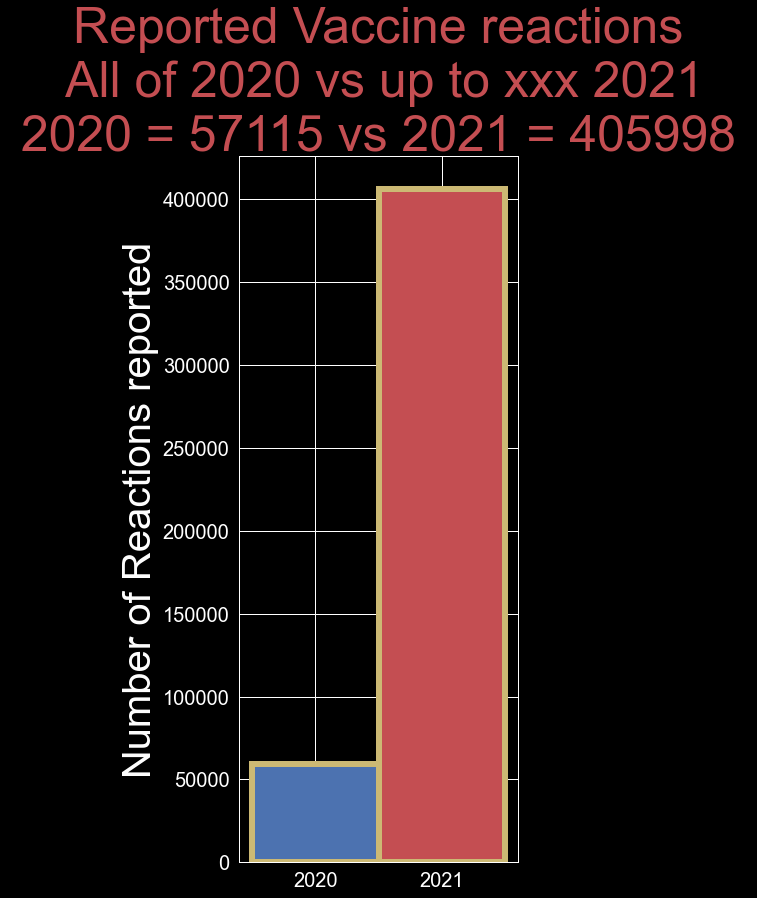

In [62]:
plt.style.use('dark_background')
a = len(v2020)
b = len(V_CDC)
fig, ax = plt.subplots(figsize=(5,13))
plt.title("Reported Vaccine reactions\n All of 2020 vs up to xxx 2021\n 2020 = 57115 vs 2021 = %i " %(b), fontsize=50, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Number of Reactions reported", fontsize=40)
ax.bar([1,2], [a,b], width=1, tick_label=['2020','2021'], align='center', color=['b', 'r'], edgecolor='y', linewidth=6)


In [63]:
VM_CDC_A.describe()

VAERS_ID        AGE_YRS        CAGE_YR     CAGE_MO      HOSPDAYS  \
count  4.015830e+05  375257.000000  345453.000000  759.000000  15954.000000   
mean   1.165638e+06      48.937807      48.511028    0.040316     17.322114   
std    1.477441e+05      18.278341      18.366735    0.133880   1119.588828   
min    9.166000e+05       0.080000       0.000000    0.000000      1.000000   
25%    1.037904e+06      35.000000      34.000000    0.000000      2.000000   
50%    1.165742e+06      49.000000      48.000000    0.000000      3.000000   
75%    1.285904e+06      63.000000      63.000000    0.000000      5.000000   
max    1.442858e+06     119.000000     120.000000    1.000000  99999.000000   

             NUMDAYS      FORM_VERS  SYMPTOMVERSION1  SYMPTOMVERSION2  \
count  370947.000000  401583.000000    401583.000000    327962.000000   
mean       21.395884       1.999258        23.881068        23.883697   
std       633.945490       0.027231         0.304786         0.301905   
min         0.000000       1.000000        23.100000        23.100000   
25%         0.000000       2.000000        24.000000        24.000000   
50%         1.000000       2.000000        24.000000        24.000000   
75%         3.000000       2.000000        24.000000        24.000000   
max     36896.000000       2.000000        24.000000        24.000000   

       SYMPTOMVERSION3  SYMPTOMVERSION4  SYMPTOMVERSION5  
count    260523.000000    198065.000000    144757.000000  
mean         23.884613        23.886992        23.883351  
std           0.300889         0.298223         0.302288  
min          23.100000        23.100000        23.100000  
25%          24.000000        24.000000        24.000000  
50%          24.000000        24.000000        24.000000  
75%          24.000000        24.000000        24.000000  
max          24.000000        24.000000        24.000000

In [64]:
vyouth= VM_CDC_A.loc[VM_CDC_A['DIED']=='Y']
vyouth = vyouth.loc[vyouth['AGE_YRS']<22]
vyouth

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
134574   1078352  03/06/2021    IL    18.00     18.0      NaN   M      NaN   
157332   1105115  03/16/2021    PR    18.00     18.0      NaN   M      NaN   
225244   1187918  04/09/2021    NH    15.00      NaN      NaN   F      NaN   
273374   1243791  04/22/2021    VA    21.00     21.0      NaN   M      NaN   
288293   1261766  04/27/2021    FL     1.00      1.0      0.0   M      NaN   
344487   1336767  05/21/2021    IL    19.00     19.0      NaN   F      NaN   
350609   1346657  05/25/2021    LA    19.00     19.0      NaN   M      NaN   
374803   1386054  06/09/2021    OH    18.00     18.0      NaN   F      NaN   
381456   1397246  06/14/2021   NaN    20.00     20.0      NaN   M      NaN   
401969   1435941  06/30/2021   NaN    19.00      NaN      NaN   F      NaN   
14001     958443  01/08/2021   NaN     1.08      NaN      NaN   F      NaN   
170458   1121695  03/22/2021    CA    21.00     21.0      NaN   M      NaN   
185361   1140258  03/27/2021    NY    21.00     21.0      NaN   F      NaN   
206496   1166062  04/04/2021   NaN     0.42      0.0      0.4   M      NaN   
235623   1199455  04/12/2021    WI    17.00     17.0      NaN   F      NaN   
244787   1209903  04/14/2021    NJ    19.00     19.0      NaN   F      NaN   
258582   1225942  04/18/2021    WI    16.00     16.0      NaN   F      NaN   
272199   1242573  04/22/2021    CO    15.00     15.0      NaN   M      NaN   
273082   1243487  04/22/2021    MI    17.00     17.0      NaN   M      NaN   
324387   1307657  05/11/2021    OH    17.00     17.0      NaN   M      NaN   
351464   1347547  05/25/2021    NJ    20.00     20.0      NaN   M      NaN   
356106   1355039  05/27/2021    OR    20.00     20.0      NaN   M      NaN   
363040   1366320  06/01/2021    FL    21.00     21.0      NaN   M      NaN   
373228   1382906  06/08/2021    CA    15.00     15.0      NaN   M      NaN   
375224   1386841  06/09/2021    GA    16.00     16.0      NaN   M      NaN   
375847   1388042  06/10/2021    MA    17.00     17.0      NaN   F      NaN   
376855   1389518  06/10/2021    CA    21.00     21.0      NaN   M      NaN   
386500   1406840  06/17/2021   NaN    13.00     13.0      NaN   M      NaN   
388858   1411734  06/18/2021    CA    20.00     20.0      NaN   F      NaN   
393923   1420630  06/23/2021    PA    16.00     16.0      NaN   F      NaN   
394018   1420762  06/23/2021   NaN    17.00     17.0      NaN   F      NaN   
398669   1429457  06/26/2021   NaN    13.00      NaN      NaN   M      NaN   
400204   1431289  06/28/2021    MN    13.00     13.0      NaN   M      NaN   
234727   1198540  04/12/2021    CA    21.00     21.0      NaN   M      NaN   
241570   1206323  04/14/2021    OH    21.00     21.0      NaN   M      NaN   
366846   1372120  06/03/2021    CA    19.00     19.0      NaN   F      NaN   
392333   1417142  06/22/2021    MD    19.00     19.0      NaN   M      NaN   

                                                                                                                                                                                                   SYMPTOM_TEXT  \
134574  Developed fatigue, body aches, headache 1 day after vaccination on 3/3. The morning of 3/5 complained of chest pain. Took Tylenol at 8:30 am. At 10:30 am his family found him unresponsive. EMS was...   
157332  Resident did not express having any symptoms, the only thing that the POC observed abscesses in the arm, groin, thigh and knees after the first vaccination. After the second dose, he was hypoactiv...   
225244  I do not know the exact date of the first or second Moderna Vaccine. I am the PICU attending who cared for the patient after her cardiac arrest which we believe was about 3-4 days after her second...   
273374  Per the father, the deceased received his first shot of Moderna vaccine on Saturday, 4/10/2021 at a local church. He did not work on 4/11/2021. Worked on 4/12/2021. The deceased was found dea

In [65]:
VM_CDC_A['SYMPTOM_TEXT'].fillna('none', inplace=True)
VM_CDC_A['SYMPTOM_TEXT'] = VM_CDC_A['SYMPTOM_TEXT'].str.lower()
symp = VM_CDC_A.loc[VM_CDC_A["SYMPTOM_TEXT"].str.contains('suicide')]

In [66]:
pd.set_option('display.max_colwidth', None)
symp[['AGE_YRS', 'SYMPTOM_TEXT', 'CUR_ILL']]

AGE_YRS  \
57727     26.00   
103654      NaN   
162700    28.00   
163932    93.00   
171803    65.00   
182895    76.00   
182905    34.00   
193599    71.00   
202224    72.00   
208618    50.00   
269238    47.00   
281647      NaN   
300056    65.00   
302955    63.00   
317168    52.00   
318053    66.00   
337719    47.00   
372235    68.00   
14001      1.08   
34693     79.00   
113799    33.00   
138349    28.00   
164296    67.00   
193546    56.00   
195702    76.00   
196942      NaN   
232681    39.00   
273082    17.00   
274880    44.00   
278711    43.00   
317584    59.00   
324387    17.00   
339919      NaN   
346148      NaN   
353353    14.00   
355083    64.00   
363753      NaN   
364873    58.00   
365253    44.00   
366350    65.00   
367674      NaN   
373762    81.00   
377434      NaN   
379117      NaN   
398578    64.00   
402070    77.00   
404689    40.00   
219470    41.00   
288457      NaN   
308042    29.00   
362391    41.00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [81]:
wd = pd.DataFrame()
stopwords = set(STOPWORDS)
stopwords.update(['Injection', 'Product', 'Administered','Blood Test', 'AUTOPSY', ' AUTOPSY' 'Quality', 'None', 'Test', 'Negative', 'Normal', 'Full Blood','Blood Test', 'Computerised', 'Site', ' Echocardiogram Normal', 'Electrocardiogram',  
                   'Echocardiogram', ' Normal'])
wd['words'] = VM_CDC.SYMPTOM1 + ', '+ VM_CDC.SYMPTOM2 + ', ' + VM_CDC.SYMPTOM3 + ', ' + VM_CDC.SYMPTOM4 + ', ' + VM_CDC.SYMPTOM5


In [82]:
wd['words'].str.contains('myo', flags=re.IGNORECASE, regex=True).value_counts()

False    143625
True       1132
Name: words, dtype: int64

In [83]:
wd['words']=wd['words'].fillna('None')

In [84]:
wd.words.value_counts().head(15)

None                                                                                                                           256826
Chills, Fatigue, Headache, Pain, Pyrexia                                                                                          466
Chills, Headache, Nausea, Pain, Pyrexia                                                                                           346
Chills, Fatigue, Headache, Nausea, Pain                                                                                           311
Injection site erythema, Injection site pain, Injection site pruritus, Injection site swelling, Injection site warmth             304
Arthralgia, Chills, Fatigue, Headache, Myalgia                                                                                    245
Chills, Fatigue, Headache, Myalgia, Pyrexia                                                                                       161
Arthralgia, Chills, Fatigue, Headache, Injection site pain    

In [85]:
text = " ".join(r for r in wd.words)
text = text.title()
print(len(text))

11860058


In [86]:
wordcloud=WordCloud(stopwords=stopwords, background_color='white', margin=5, width=2400, height=1400, ranks_only=True).generate(text)

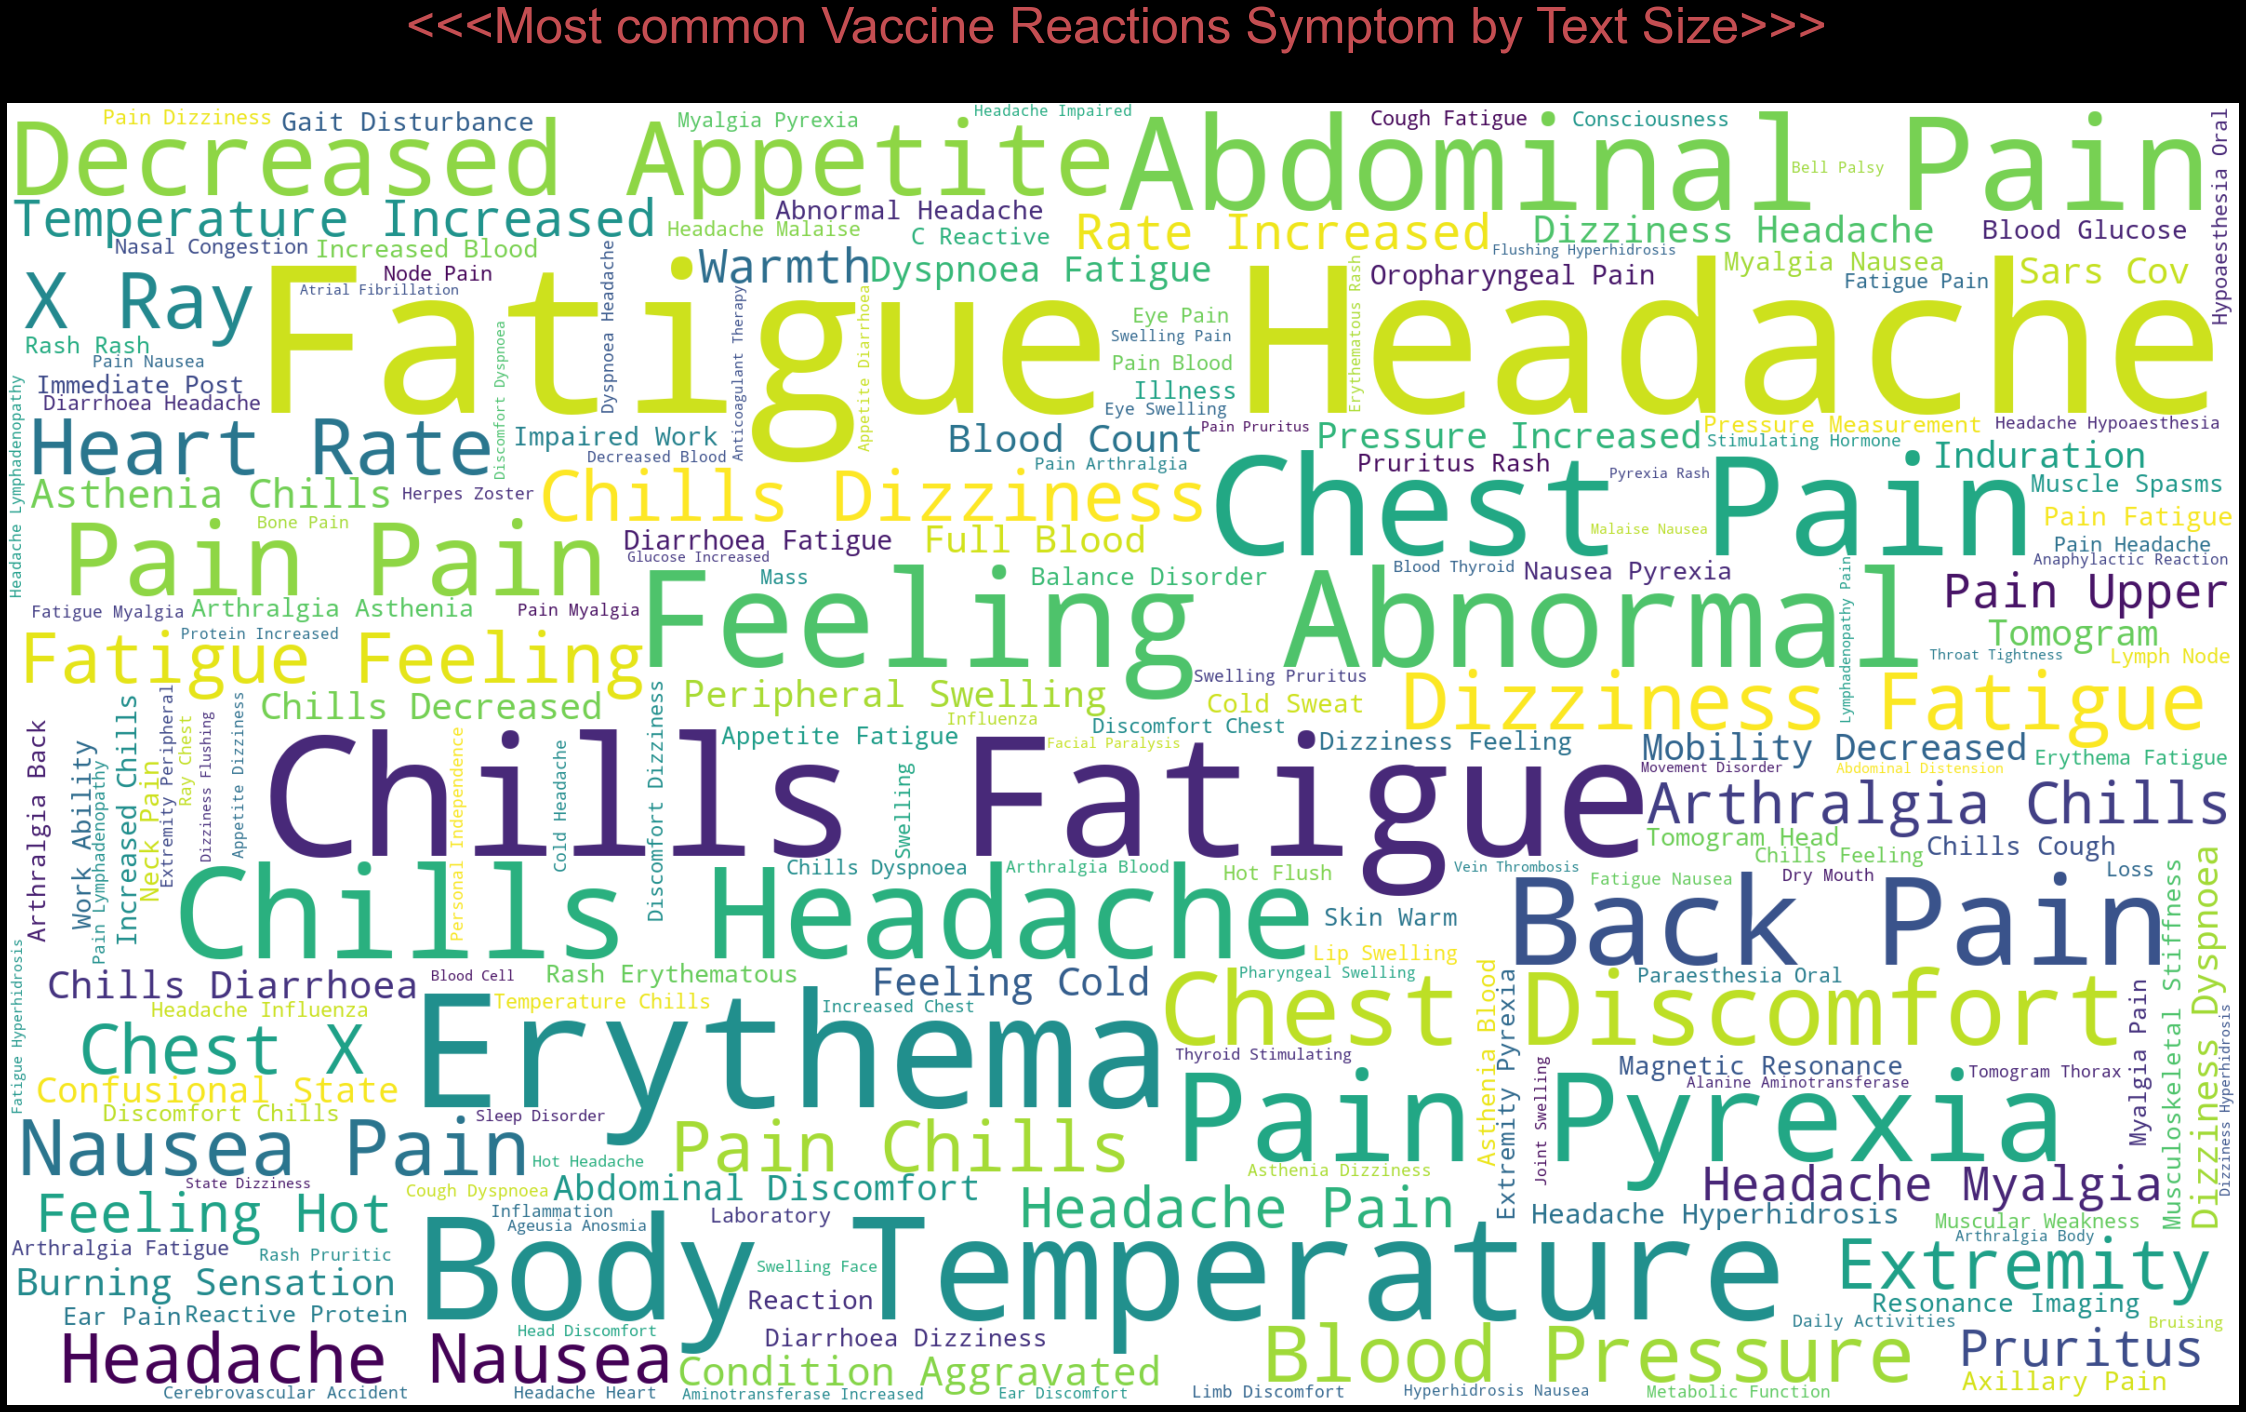

In [88]:
plt.figure(figsize=(40,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions Symptom by Text Size>>> \n", fontsize=50, color='r')
plt.axis('off')
plt.show()

In [92]:
import collections
import matplotlib.cm as cm
filtered_words = [ word for word in text.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words=[]
counts=[]
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
print(words)

[' Headache', ' Fatigue', ' Chills', ' Dizziness', ' Pain', ' Injection Site Pain', ' Nausea', ' Dyspnoea', ' Diarrhoea', ' Myalgia', ' Injection Site Erythema', ' Hyperhidrosis', ' Feeling Abnormal', ' Pain In Extremity', ' Injection Site Pruritus', ' Chest Pain', ' Injection Site Swelling', ' Cough', ' Decreased Appetite', ' Erythema', ' Pyrexia', ' Asthenia', ' Hypoaesthesia', ' Pruritus', ' Blood Test', ' Feeling Hot', ' Malaise', ' Chest Discomfort', ' Back Pain', ' Lymphadenopathy']


<BarContainer object of 30 artists>

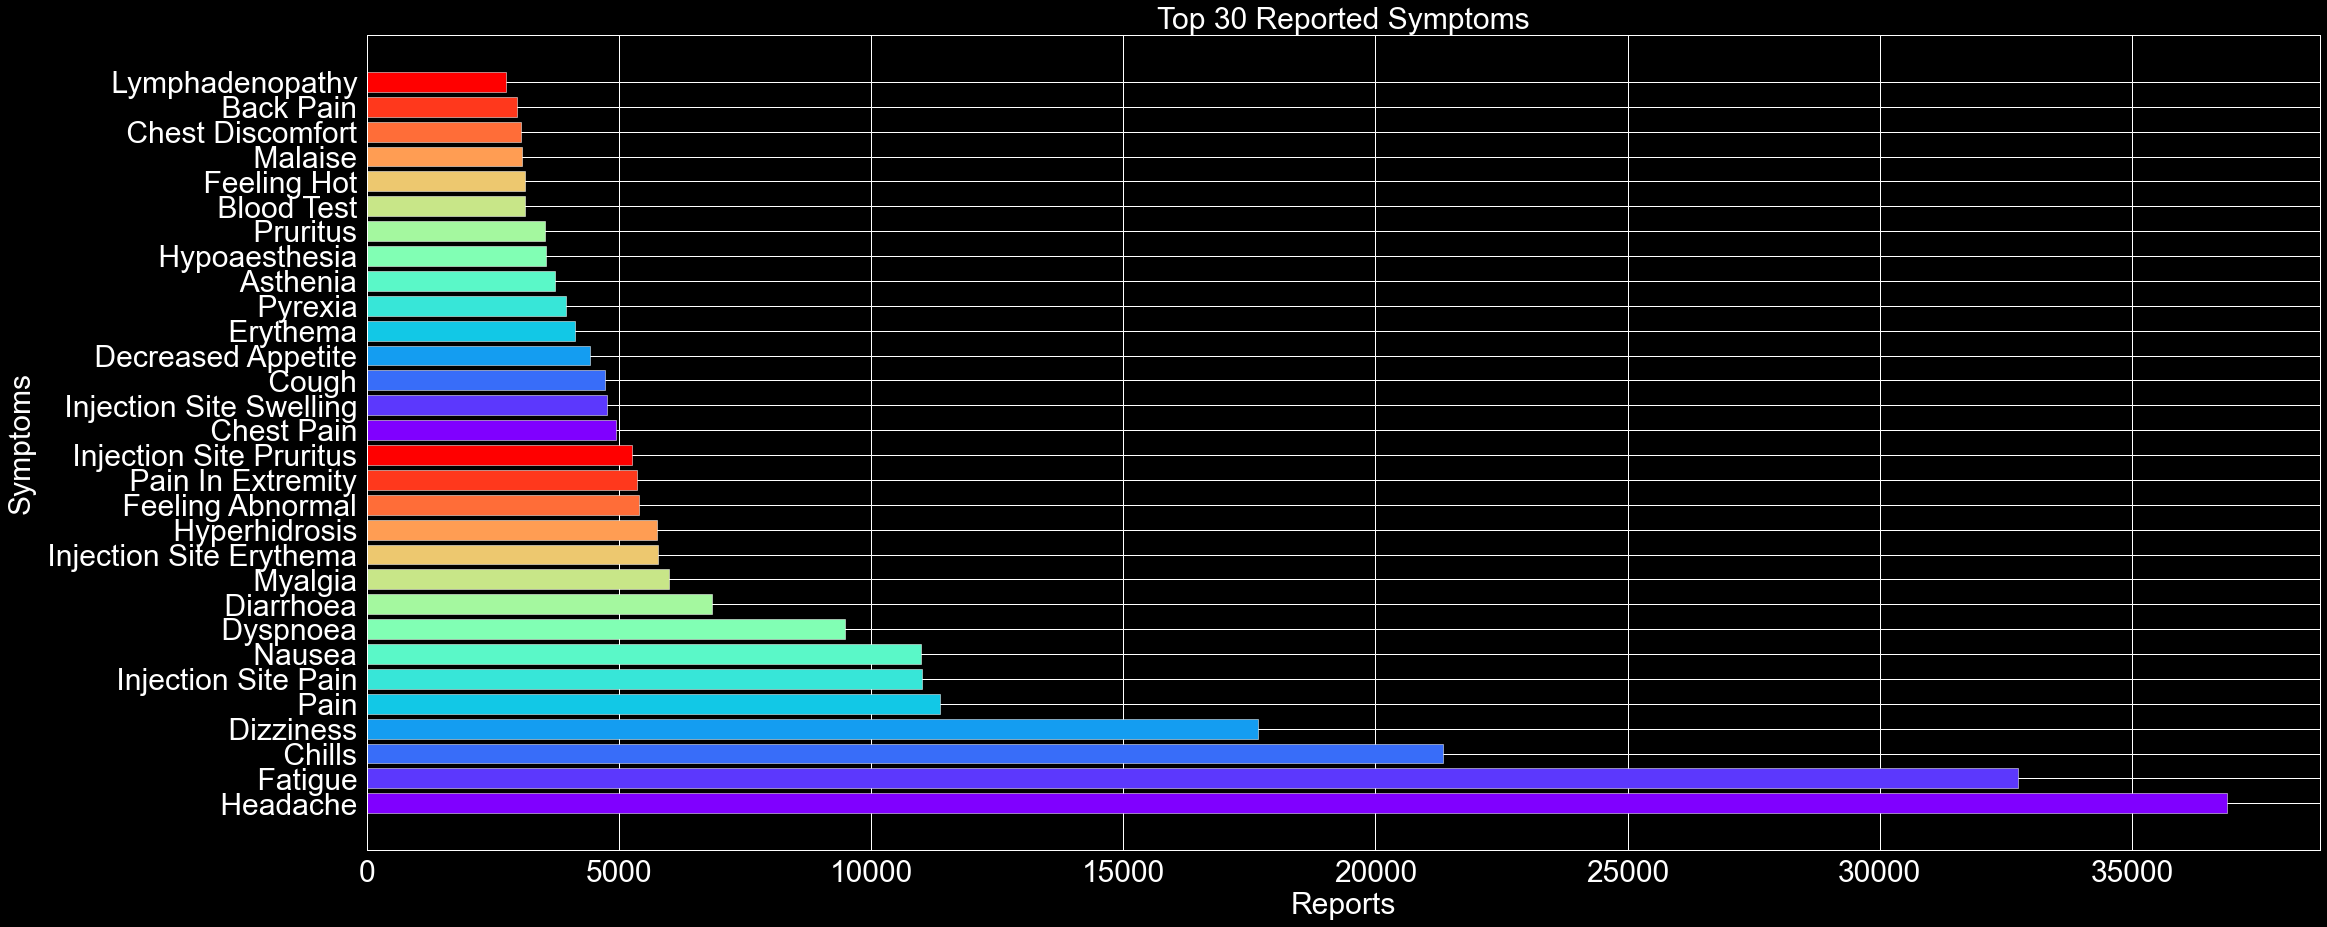

In [94]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.figure(figsize=(35,15))
plt.title("Top 30 Reported Symptoms", fontsize=30)
plt.xlabel("Reports", fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel("Symptoms", fontsize=30)
plt.yticks(fontsize=30)
plt.barh(words, counts, color=colors)

In [95]:
DM_VM_CDC = D_V_CDC.loc[D_V_CDC['DIED']=='Y']


In [100]:
wd = pd.DataFrame()
stopwords = set(STOPWORDS)
stopwords.update(['Injection', 'Product', 'Administered','Blood Test', 'AUTOPSY', ' AUTOPSY' 'Quality', 'None', 'Test', 'Negative', 'Normal', 'Full Blood','Blood Test', 'Computerised', 'Site', ' Echocardiogram Normal', 'Electrocardiogram',  
                   'Echocardiogram', ' Normal'])
wd['words'] = DM_VM_CDC.SYMPTOM1 + ', '+ DM_VM_CDC.SYMPTOM2 + ', ' + DM_VM_CDC.SYMPTOM3 + ', ' + DM_VM_CDC.SYMPTOM4 + ', ' + DM_VM_CDC.SYMPTOM5
wd['words'] = wd['words'].fillna('None')

In [101]:
text = " ".join(r for r in wd.words)
text = text.title()
print(len(text))

363807


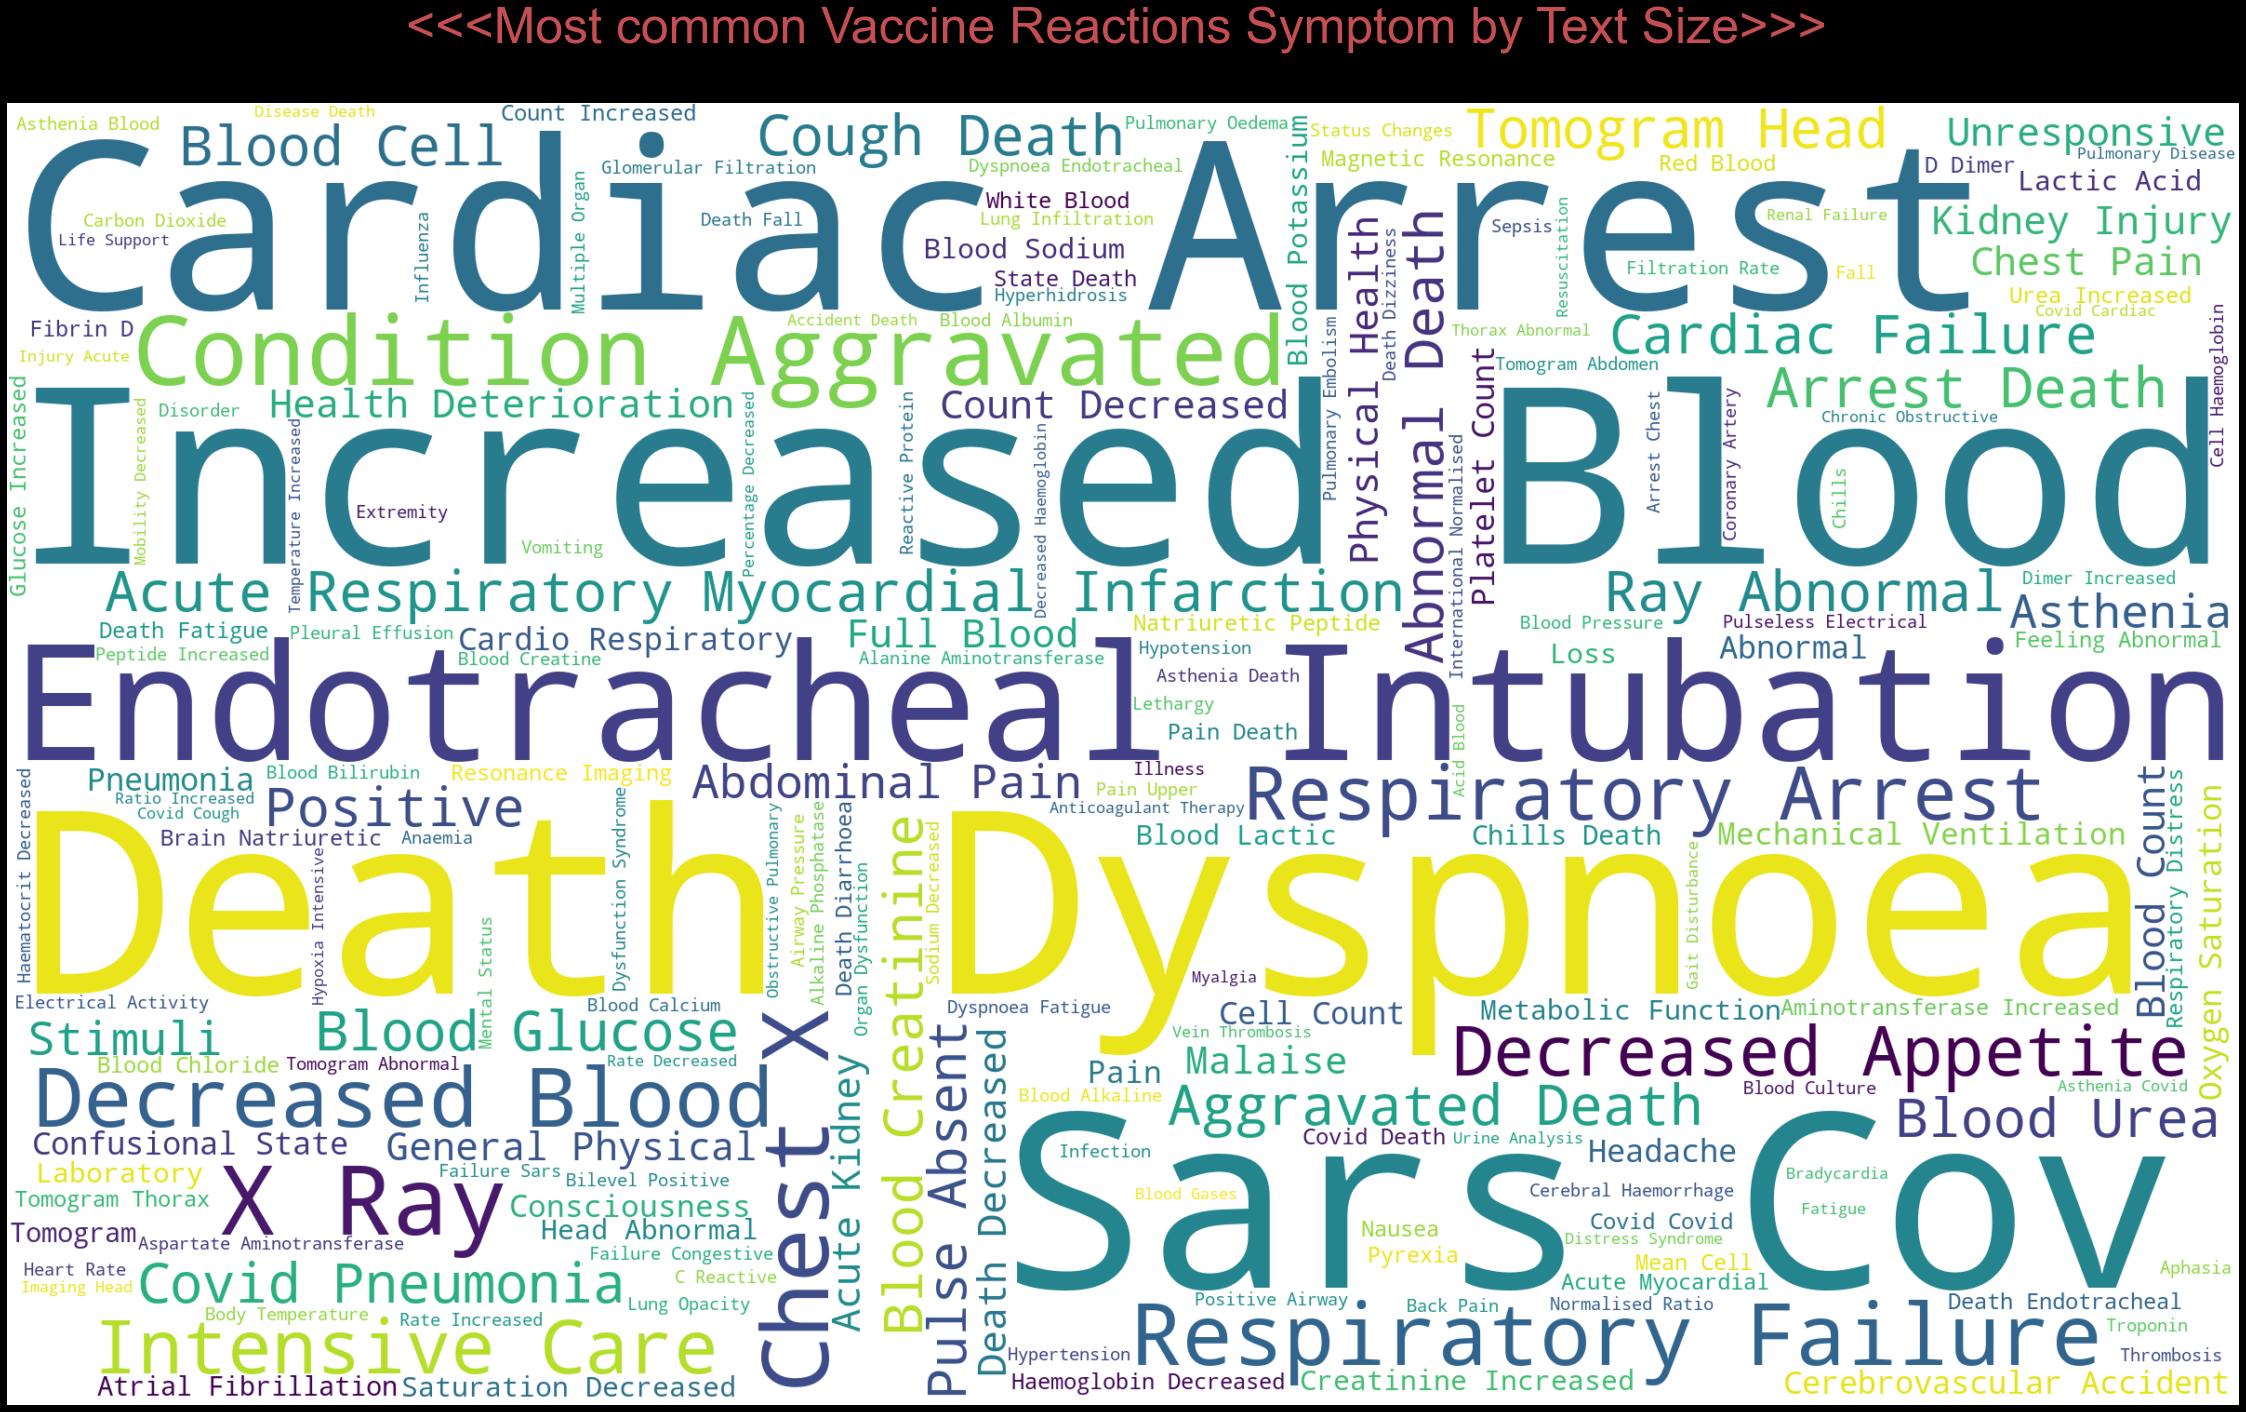

In [102]:
wordcloud=WordCloud(stopwords=stopwords, background_color='white', margin=5, width=2400, height=1400, ranks_only=True).generate(text)
plt.figure(figsize=(40,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions Symptom by Text Size>>> \n", fontsize=50, color='r')
plt.axis('off')
plt.show()

In [103]:
wd['words']= wd['words'].fillna('None')
wd.value_counts().sort_values()

words                                                                                                                                         
HAPTOGLOBIN INCREASED, HYPERSENSITIVITY, HYPERTENSION, IMPAIRED WORK ABILITY, LEUKOERYTHROBLASTIC ANAEMIA                                            1
ACUTE KIDNEY INJURY, AGGRESSION, AGITATION, ASTHENIA, COVID-19                                                                                       1
ACUTE KIDNEY INJURY, ALANINE AMINOTRANSFERASE INCREASED, ASPARTATE AMINOTRANSFERASE INCREASED, BLOOD ALBUMIN DECREASED, BLOOD BILIRUBIN NORMAL       1
ACUTE KIDNEY INJURY, ANAEMIA, AORTIC STENOSIS, ASTHENIA, ATELECTASIS                                                                                 1
ACUTE KIDNEY INJURY, ANOXIA, AUTOPSY, BLOOD CREATININE INCREASED, BLOOD SODIUM DECREASED                                                             1
                                                                                                      

In [104]:
filtered_words = [ word for word in text.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
wordsd=[]
counts=[]
for letter, count in counted_words.most_common(30):
    wordsd.append(letter)
    counts.append(count)
print(wordsd)

[' Death', ' Dyspnoea', ' Fatigue', ' Covid-19', ' Cardiac Arrest', ' Condition Aggravated', ' Endotracheal Intubation', ' Cough', ' Chills', ' Intensive Care', ' Headache', ' Malaise', ' Asthenia', ' Resuscitation', ' Decreased Appetite', ' Fall', ' Nausea', ' Covid-19 Pneumonia', ' Diarrhoea', ' Hypoxia', ' Chest X-Ray Abnormal', ' Pyrexia', ' Sars-Cov-2 Test Negative', ' Cerebrovascular Accident', ' Pulse Absent', ' General Physical Health Deterioration', ' Pneumonia', ' Chest Pain', ' Hypotension', ' Cardio-Respiratory Arrest']


<BarContainer object of 30 artists>

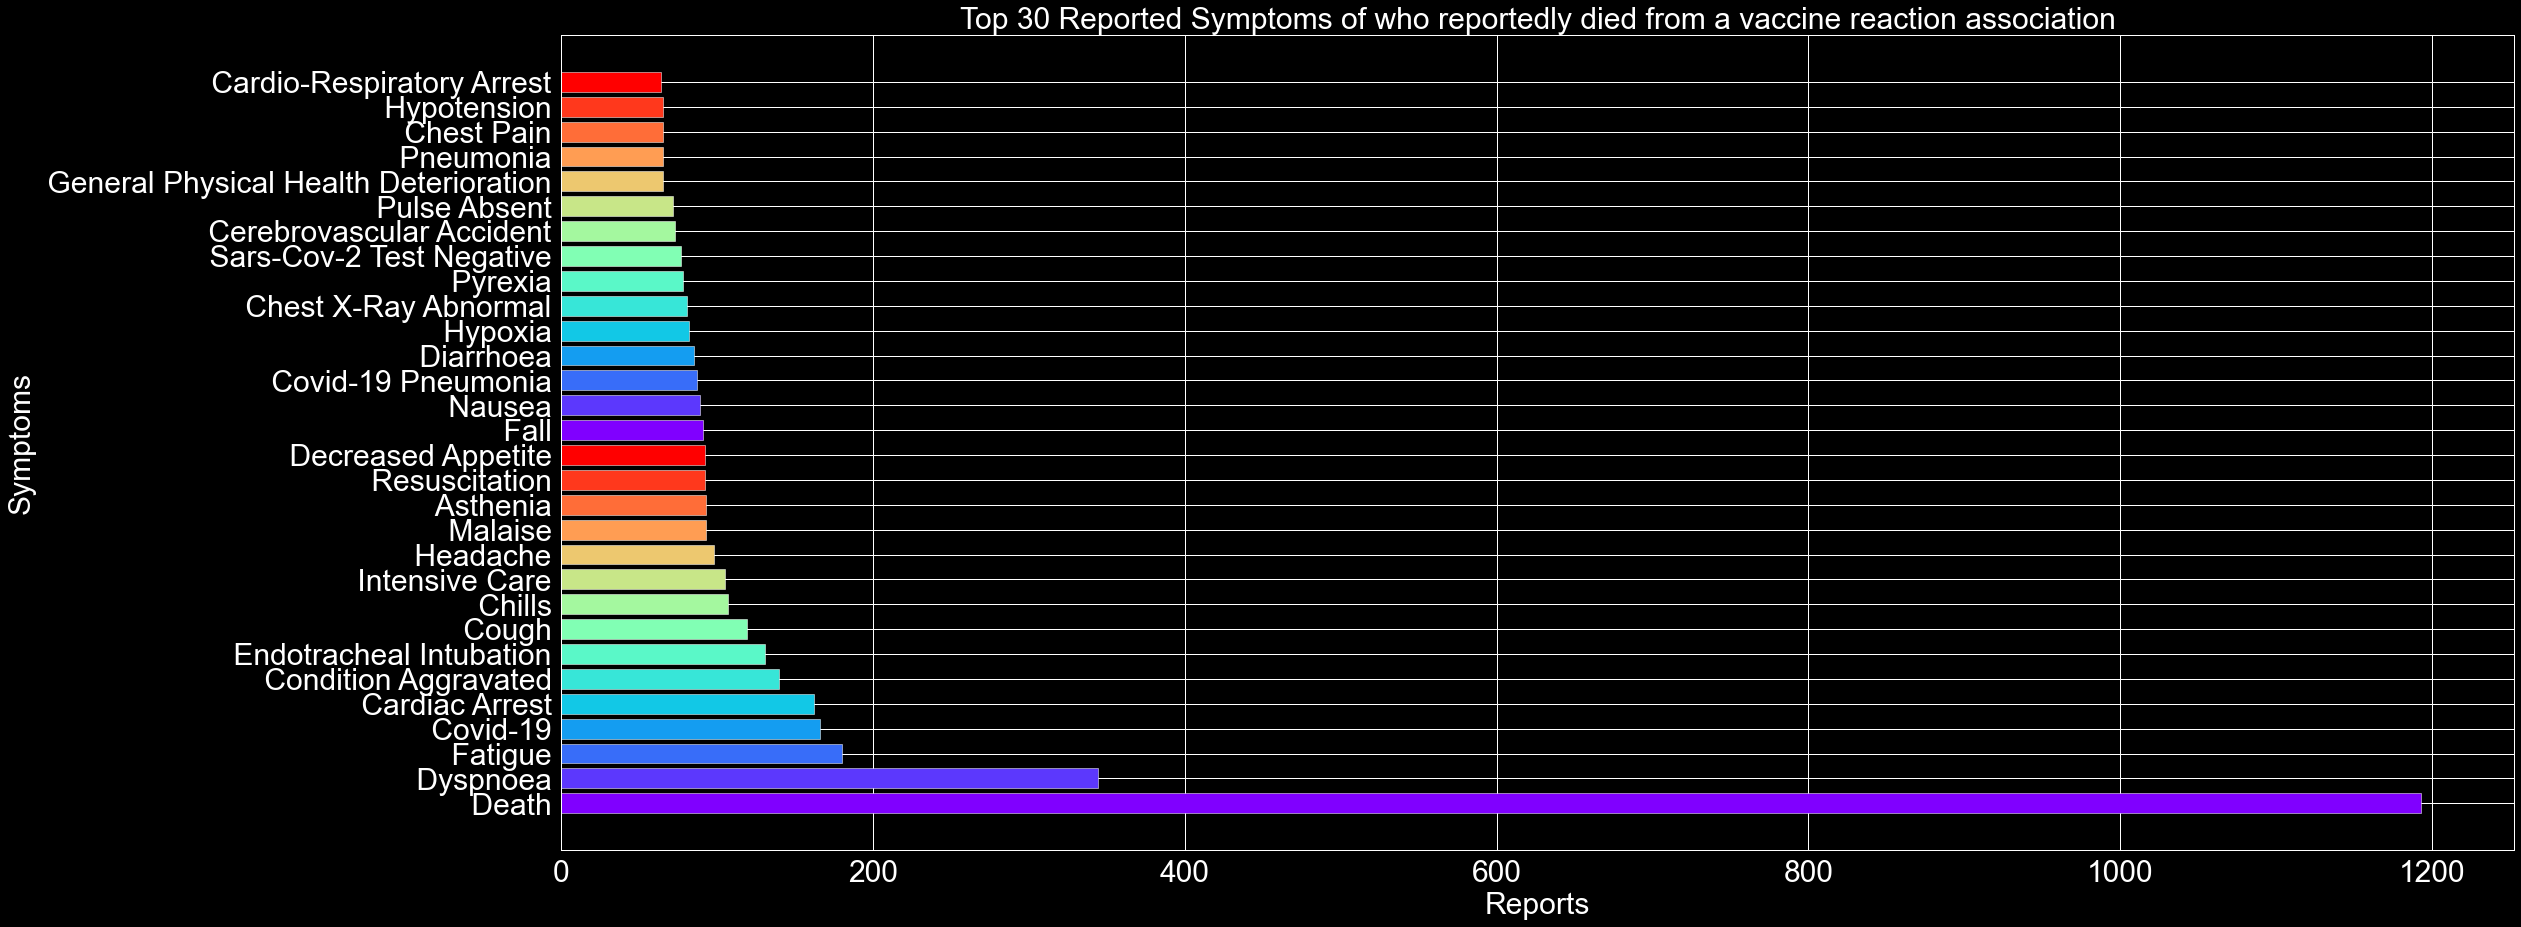

In [105]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.style.use('dark_background')
plt.figure(figsize=(35,15))
plt.title("Top 30 Reported Symptoms of who reportedly died from a vaccine reaction association", fontsize=30)
plt.xlabel("Reports", fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel("Symptoms", fontsize=30)
plt.yticks(fontsize=30)
plt.barh(wordsd, counts, color=colors)

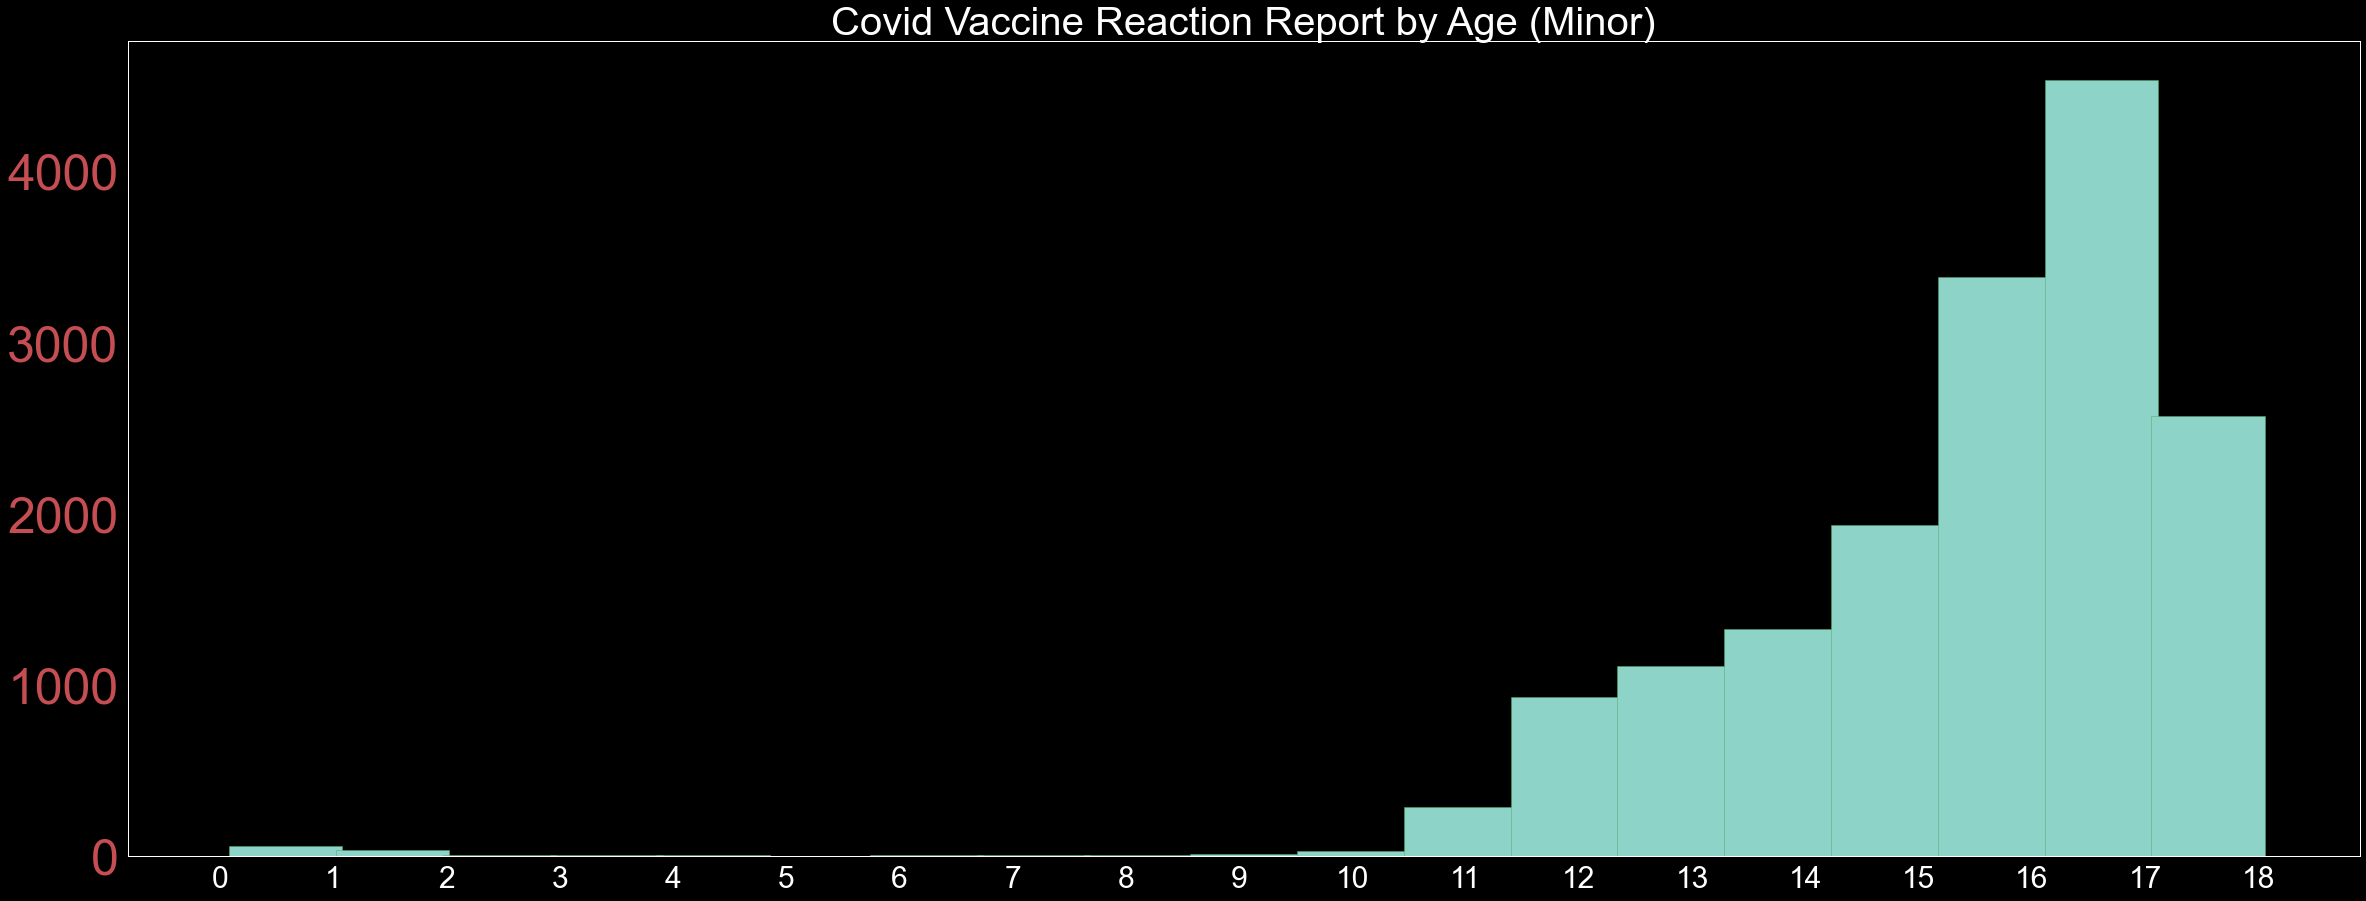

In [106]:
VM_CDC_Y = VM_CDC[VM_CDC['AGE_YRS']< 19]
plt.style.use('dark_background')
VM_CDC_Y['AGE_YRS'].hist(bins=19, width=1, figsize=(40,15), edgecolor='g')
plt.title("Covid Vaccine Reaction Report by Age (Minor)", fontsize=40)
plt.xticks(np.arange(0,19,1), fontsize=30)
plt.yticks(fontsize=50, color='r')
plt.grid(color='r')
plt.show()

88.92896174863388


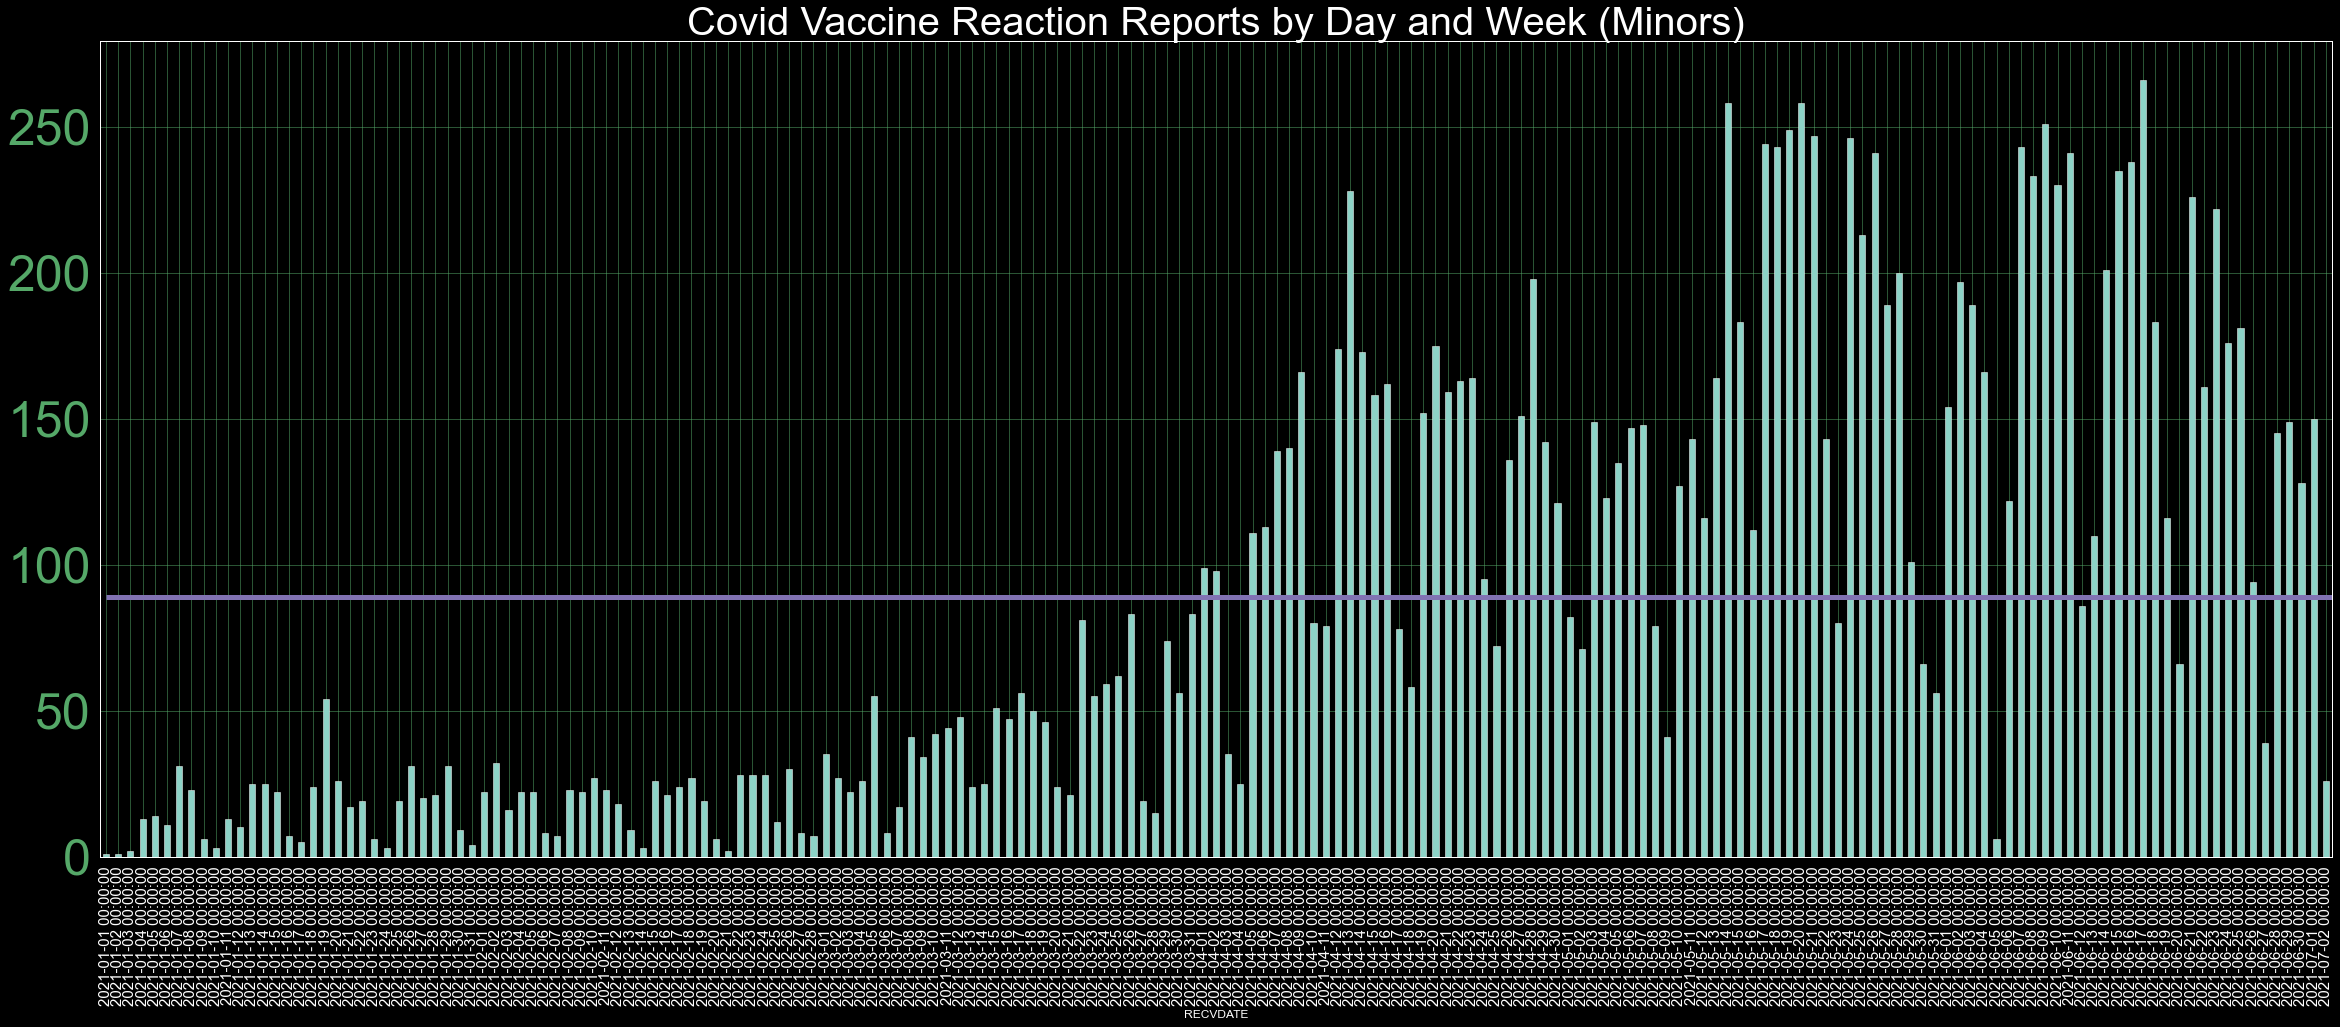

In [112]:
plt.figure(figsize=(40,15))
x1 = VM_CDC_Y.groupby("RECVDATE")['VAX_TYPE'].count().rolling(1, min_periods=1).sum()
ax2 = VM_CDC_Y.groupby("RECVDATE")['VAX_TYPE'].count()
ax3 = VM_CDC_Y.groupby('RECVDATE')['VAX_TYPE'].count().mean()

ax2.plot(kind='bar')
plt.hlines(ax3, 0, len(ax2), linewidth=5, color='m')
plt.title("Covid Vaccine Reaction Reports by Day and Week (Minors)", fontsize=40)
plt.xticks(fontsize=15)
plt.yticks(fontsize=50, color='g')
plt.grid(color='g', alpha=.5, visible=True)
plt.show
print(ax3)

In [108]:
VM_CDC_Y['RECVDATE'] = pd.to_datetime(VM_CDC_Y['RECVDATE'])
VM_CDC_Y['VAX_DATE'] = pd.to_datetime(VM_CDC_Y['VAX_DATE'])


<ipython-input-108-a084bc18e475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VM_CDC_Y['RECVDATE'] = pd.to_datetime(VM_CDC_Y['RECVDATE'])
<ipython-input-108-a084bc18e475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VM_CDC_Y['VAX_DATE'] = pd.to_datetime(VM_CDC_Y['VAX_DATE'])


In [109]:
VM_CDC_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16274 entries, 10 to 405566
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         16274 non-null  int64         
 1   RECVDATE         16274 non-null  datetime64[ns]
 2   STATE            14893 non-null  object        
 3   AGE_YRS          16274 non-null  float64       
 4   CAGE_YR          15537 non-null  float64       
 5   CAGE_MO          97 non-null     float64       
 6   SEX              16274 non-null  object        
 7   RPT_DATE         10 non-null     object        
 8   SYMPTOM_TEXT     16260 non-null  object        
 9   DIED             20 non-null     object        
 10  DATEDIED         18 non-null     object        
 11  L_THREAT         177 non-null    object        
 12  ER_VISIT         3 non-null      object        
 13  HOSPITAL         866 non-null    object        
 14  HOSPDAYS         623 non-null    flo

In [113]:
VM_CDC_X = VM_CDC_Y.copy()
VM_CDC_X["Days_From_Shot_to_Report"] = VM_CDC_X["RECVDATE"] - VM_CDC_X['VAX_DATE']
VM_CDC_X["Days_From_Shot_to_Report"] = VM_CDC_X["Days_From_Shot_to_Report"]/np.timedelta64(1,'D')

In [115]:
a = VM_CDC_X["Days_From_Shot_to_Report"].mean()
print("Average Number of Dates from Vaccination to report(Youth) = ", a)

Average Number of Dates from Vaccination to report(Youth) =  21.445211013736092


In [116]:
VM_CDC_X.head(1)

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
10    916610 2021-01-01    VA     18.0     18.0      NaN   F      NaN   

                                                                    SYMPTOM_TEXT  \
10  hives and rash all over body that has not gone away in 2 days since it began   

   DIED DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD  \
10  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN      N   

     VAX_DATE  ONSET_DATE  NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY OTHER_MEDS  \
10 2020-12-29  12/30/2020      1.0      NaN       PVT      NaN        NaN   

   CUR_ILL HISTORY PRIOR_VAX SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT  \
10     NaN     NaN       NaN      NaN          2  01/01/2021          NaN   

   OFC_VISIT ER_ED_VISIT  ALLERGIES VAX_TYPE VAX_MANU VAX_LOT VAX_DOSE_SERIES  \
10       NaN         NaN  jackfruit  COVID19  MODERNA     NaN               1   

   VAX_ROUTE VAX_SITE                     VAX_NAME SYMPTOM1  SYMPTOMVERSION1  \
10       SYR       LA  COVID19 (COVID19 (MODERNA))     Rash             23.1   

     SYMPTOM2  SYMPTOMVERSION2 SYMPTOM3  SYMPTOMVERSION3 SYMPTOM4  \
10  Urticaria             23.1      NaN              NaN      NaN   

    SYMPTOMVERSION4 SYMPTOM5  SYMPTOMVERSION5  Days_From_Shot_to_Report  
10              NaN      NaN              NaN                       3.0

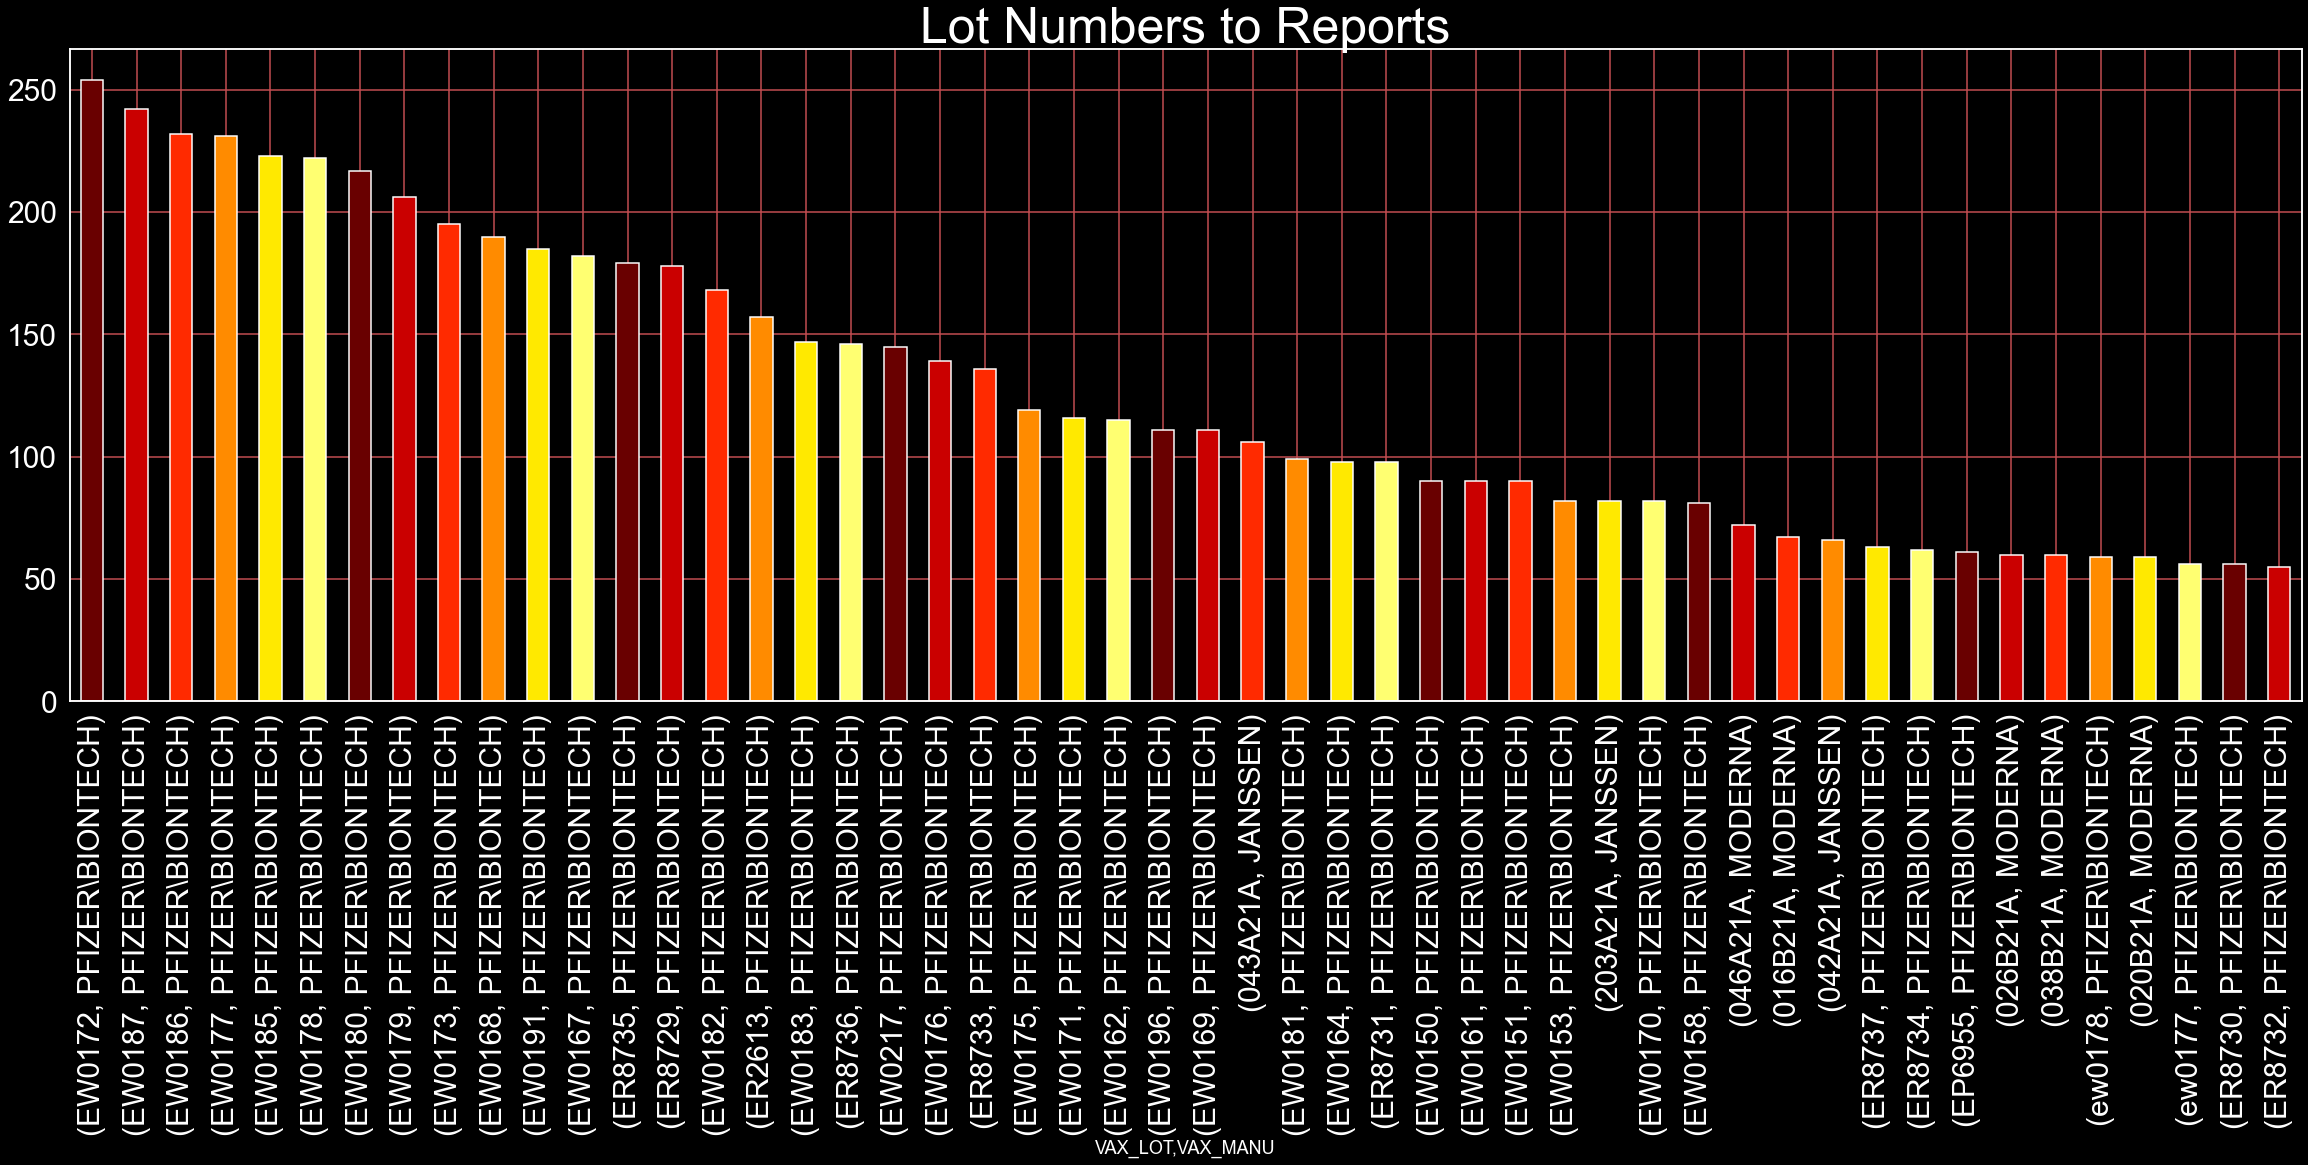

In [118]:
sns.set(font_scale=5)
plt.style.use('dark_background')
sns.set_context("talk")
plt.grid(color='r', visible=True)
VM_CDC_X[["VAX_LOT", "VAX_MANU"]].value_counts().head(50).plot(kind='bar', figsize=(40,12), color= sns.color_palette("hot"))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title('Lot Numbers to Reports', fontsize=50)
plt.show()

In [123]:
VM_CDC_X[['VAX_MANU', 'VAX_LOT']].value_counts()

VAX_MANU         VAX_LOT
PFIZER\BIONTECH  EW0172     254
                 EW0187     242
                 EW0186     232
                 EW0177     231
                 EW0185     223
                           ... 
MODERNA          EL3302       1
                 ER8727       1
                 ER8729       1
                 EW0177       1
PFIZER\BIONTECH  ww0162       1
Length: 1248, dtype: int64

In [124]:
pd.set_option('display.max_colwidth', 100)
VM_CDC_Y = VM_CDC_A.loc[VM_CDC_A['AGE_YRS']<19]
VM_CDC_Y.tail(15)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
403888   1438561  06/30/2021    WV     16.0     16.0      NaN   M      NaN   
403900   1438575  06/30/2021    ID     16.0     16.0      NaN   M      NaN   
403930   1438807  06/30/2021    VA     16.0     16.0      NaN   F      NaN   
403966   1439538  07/01/2021    KS     16.0      NaN      NaN   F      NaN   
403973   1439545  07/01/2021    NJ     18.0      NaN      NaN   F      NaN   
404634   1440433  07/01/2021    OH     17.0     17.0      NaN   M      NaN   
404728   1440537  07/01/2021    MN     17.0     17.0      NaN   M      NaN   
405005   1440828  07/01/2021    TX     17.0     17.0      NaN   M      NaN   
405009   1440833  07/01/2021    TX     17.0     17.0      NaN   F      NaN   
405058   1440882  07/01/2021    MD     18.0     18.0      NaN   M      NaN   
405208   1441049  07/01/2021    UT     18.0     18.0      NaN   M      NaN   
405479   1442287  07/02/2021    NY     14.0      NaN      NaN   F      NaN   
405496   1442304  07/02/2021    CO     18.0      NaN      NaN   F      NaN   
405519   1442327  07/02/2021    NJ     12.0      NaN      NaN   U      NaN   
405566   1442374  07/02/2021    FL     18.0      NaN      NaN   F      NaN   

                                                                                               SYMPTOM_TEXT  \
403888                            no adverse event,  minor received jansen when should have received pfizer   
403900        age discrepancy - vaccine given despite age under 18 by accident.  no adverse events reported   
403930                                   patient given vaccine that has not been approved for patient's age   
403966  suspected clinical vaccination failure; suspected covid-19 infection; inappropriate age at vacci...   
403973  shooting pain down the arm; headache; fever; this spontaneous report received from a consumer co...   
404634  covid19 janssen vaccine given to individual less than 18 years of age. individual was 17 years old.   
404728  client reported his date of birth as (privacy)on the vaccine screening and consent form, which w...   
405005  patient is was under given the janssen but was under 18 years.  no side effect has been reported...   
405009  patient is was under given the janssen but was under 18 years.  no side effect has been reported...   
405058  i woke up very nauseous and woozy. i walked into my sisters room and fell down due to weakness. ...   
405208  within 1 minute of receiving vaccine, patient experienced seizure. called 911 and got patient sa...   
405479  vaccine administered to a 14 year old patient; off label use; this spontaneous report received f...   
405496  3 bruises in the area lined up vertically on right knee and feels hard to touch; a little swolle...   
405519  inappropriate age at vaccine administration; patient received 0.15ml dose of vaccine (incomplete...   
405566  rectal bleeding; loss of appetite; abdominal pain; body aches; fever; injection site soreness; t...   

       DIED DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE  \
403888  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
403900  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
403930  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
403966  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
403973  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
404634  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
404728  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
405005  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
405009  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
405058  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
405208  NaN      NaN      NaN      NaN      NaN       NaN    NaN     NaN   
405479  NaN      NaN      NaN      NaN      NaN       NaN    NaN     N

In [125]:
wdy=pd.DataFrame()
wdy['words'] = VM_CDC_Y.SYMPTOM1 + ', ' + VM_CDC_Y.SYMPTOM2 + ', ' +VM_CDC_Y.SYMPTOM3 + ', ' +VM_CDC_Y.SYMPTOM4 + ', ' +VM_CDC_Y.SYMPTOM5
wdy['words'] = wdy['words'].fillna('None')
wdy.value_counts().sort_values()

words                                                                                                                   
Dizziness, Headache, Hypoacusis, Skin discomfort, Tinnitus                                                                      1
Abdominal distension, Acne, Breast tenderness, Headache, Menstruation irregular                                                 1
Abdominal distension, Agitation, Body temperature increased, Decreased appetite, Depression                                     1
Abdominal pain lower, Abdominal pain upper, Alanine aminotransferase decreased, Albumin globulin ratio normal, Anion gap        1
Abdominal pain lower, Abdominal pain upper, Appendicitis perforated, Chills, Lymphocyte count increased                         1
                                                                                                                            ...  
Confusional state, Dizziness, Flushing, Hyperhidrosis, Hyperventilation                            

In [129]:
texty = ' '.join(r for r in wdy.words)
texty = texty.title()
print(len(texty))
wordcloudy=WordCloud(stopwords=stopwords, background_color="white", margin=5, width=2400, height=1400, ranks_only=True).generate(texty)


319600


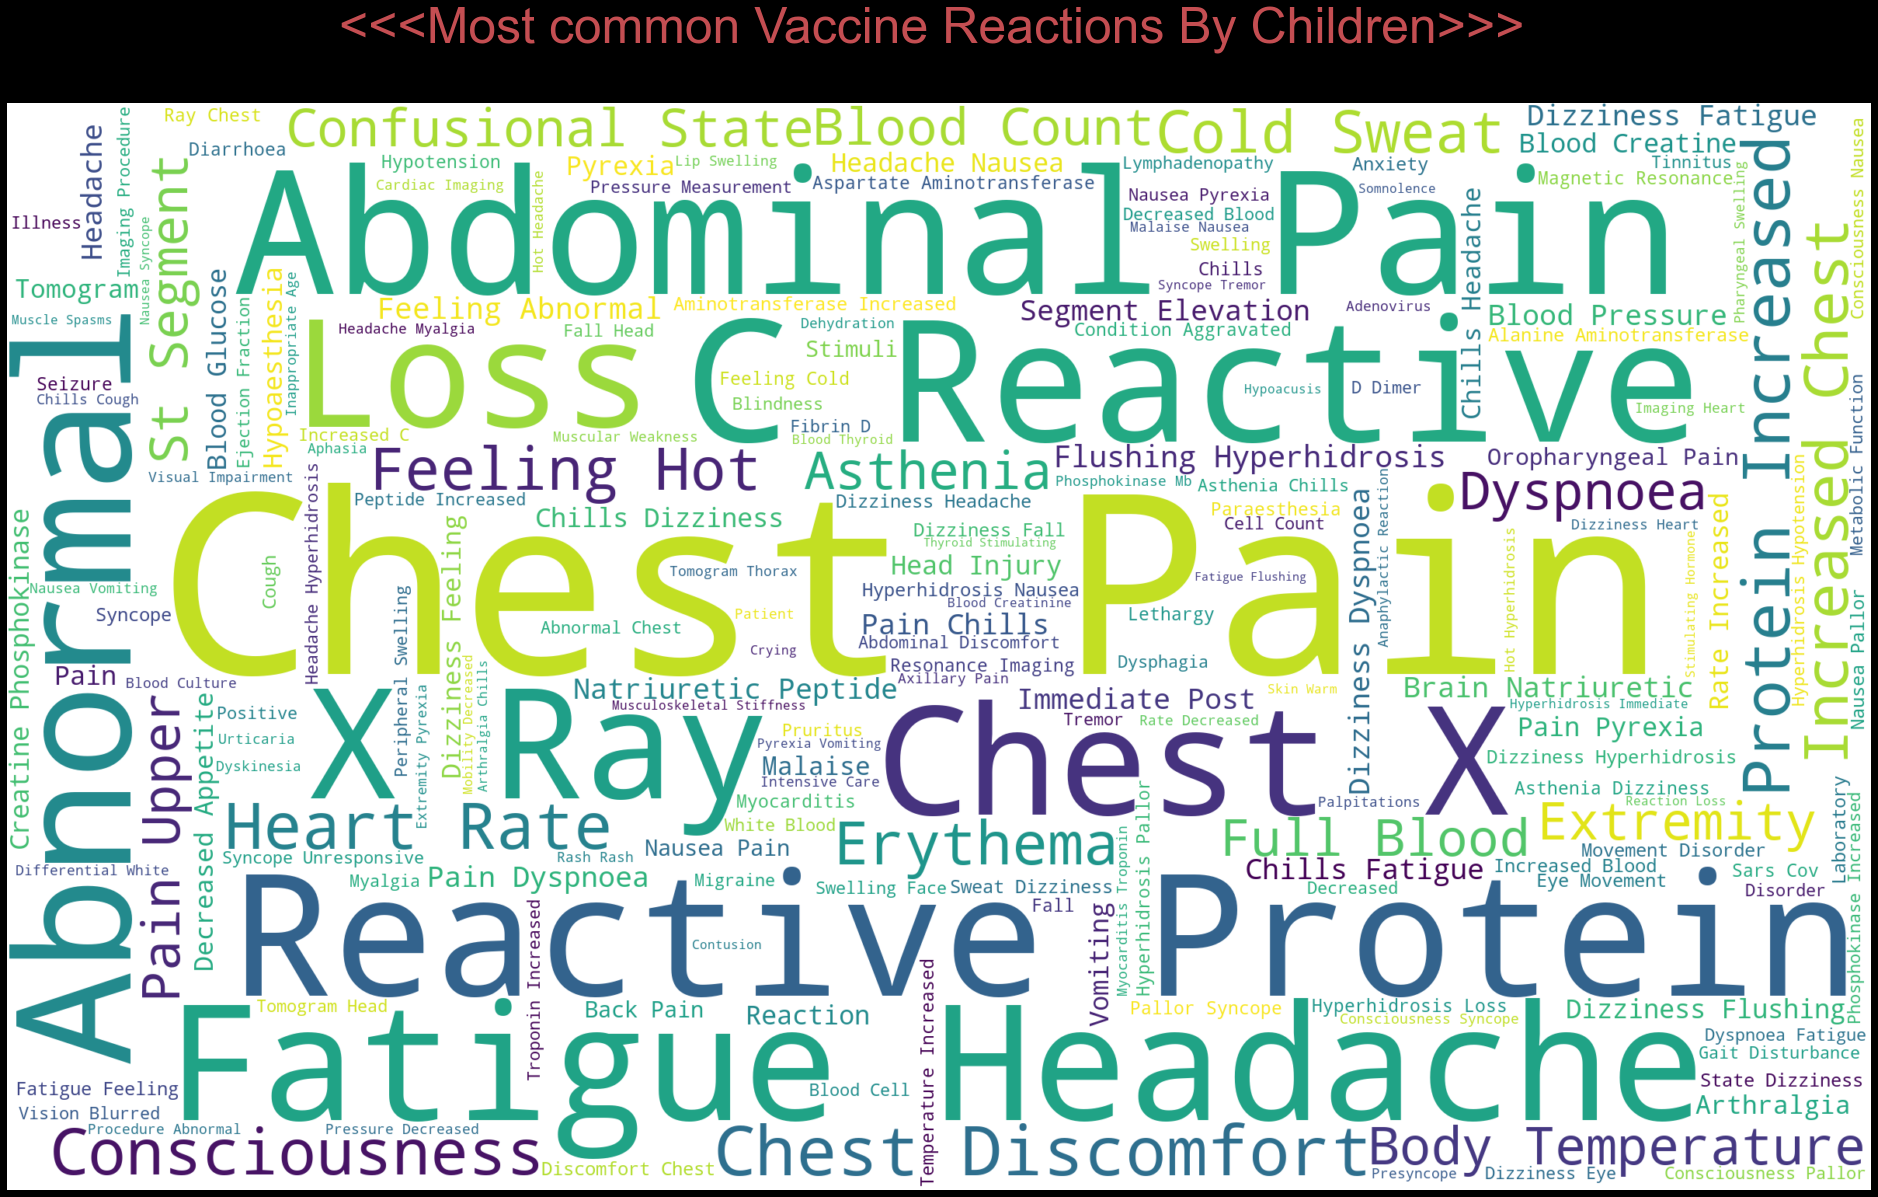

In [131]:
plt.figure(figsize=(35,20))
plt.imshow(wordcloudy, interpolation='bilinear')
plt.title("<<<Most common Vaccine Reactions By Children>>> \n", fontsize=50, color='r')
plt.axis('off')
plt.show()

In [133]:
filtered_words = [ word for word in texty.split(',') if word not in stopwords]
counted_words = collections.Counter(filtered_words)
wordsy=[]
counts=[]
for letter, count in counted_words.most_common(30):
    wordsy.append(letter)
    counts.append(count)
print(wordsy)

[' Headache', ' Dizziness', ' Fatigue', ' Chest Pain', ' Hyperhidrosis', ' Nausea', ' Dyspnoea', ' Chills', ' Loss Of Consciousness', ' Pallor', ' Pain', ' Flushing', ' Fall', ' Pyrexia', ' Syncope', ' Electrocardiogram', ' Feeling Hot', ' Malaise', ' Electrocardiogram Normal', ' Injection Site Pain', ' Chest Discomfort', ' C-Reactive Protein Increased', ' Head Injury', ' Hypotension', ' Pain In Extremity', ' Immediate Post-Injection Reaction', ' Feeling Abnormal', ' Electrocardiogram St Segment Elevation', ' Confusional State', ' Cough']


<BarContainer object of 30 artists>

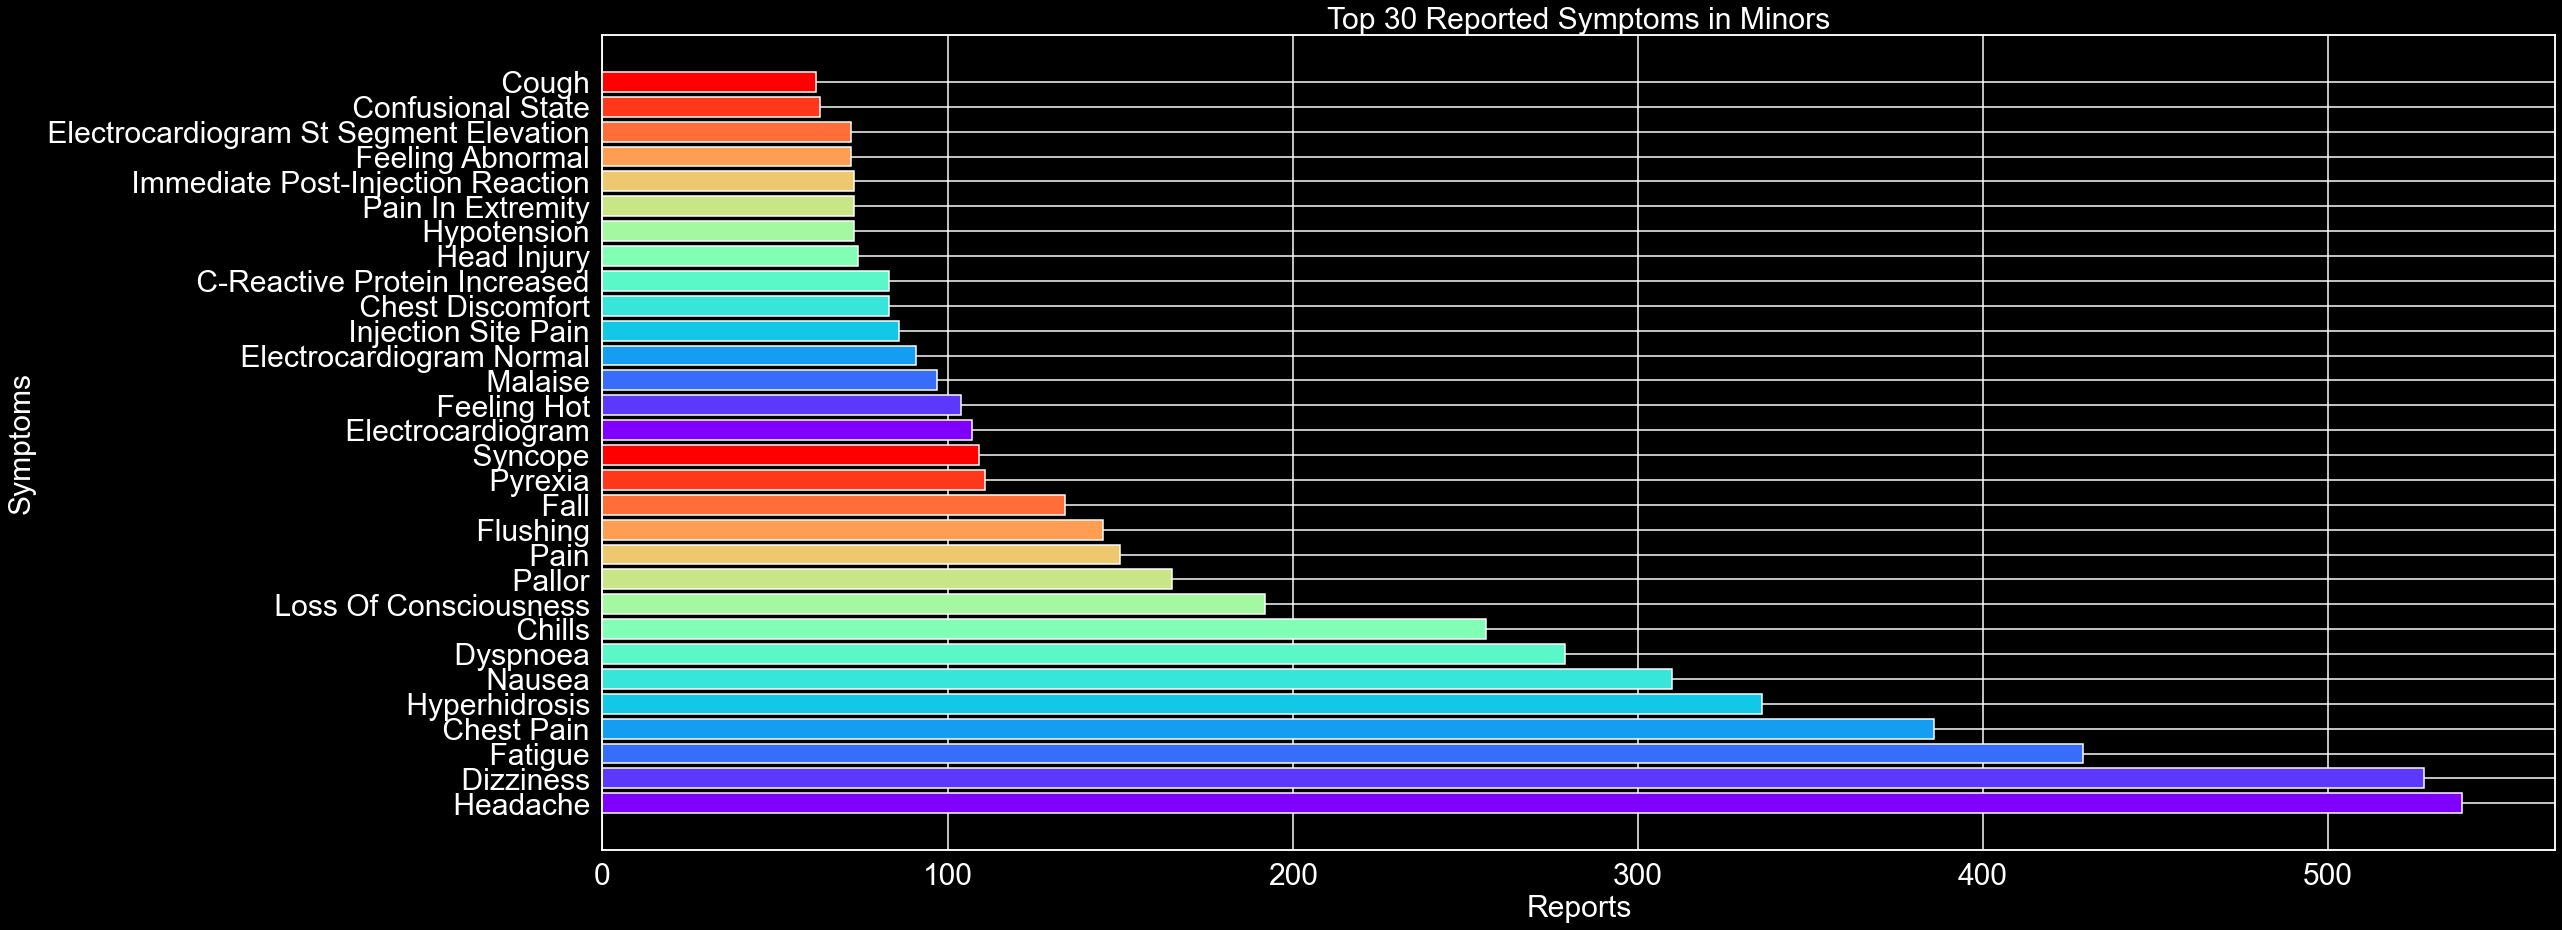

In [134]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.style.use('dark_background')
plt.figure(figsize=(35,15))
plt.title("Top 30 Reported Symptoms in Minors", fontsize=30)
plt.xlabel("Reports", fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel("Symptoms", fontsize=30)
plt.yticks(fontsize=30)
plt.barh(wordsy, counts, color=colors)

KeyError: 'Date'

In [137]:
df = VM_CDC = VM_CDC_Y.copy()
df['Date'] = pd.to_datetime(df['Date']) - pd.to_datetime(7, unit='d')
df = df.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])["Quantity"]
    .sum()
    .reset_index()
    .sort_values('Date')
print(df)

IndentationError: unexpected indent (<ipython-input-137-5bc61994fbec>, line 4)

In [139]:
VM_CDC_A.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [141]:
usv.query('new_vaccinations > 0')

date  new_vaccinations
104118 2020-12-21           57909.0
104133 2021-01-05          273209.0
104134 2021-01-06          470328.0
104135 2021-01-07          612621.0
104136 2021-01-08          768813.0
...           ...               ...
104350 2021-08-10          617769.0
104351 2021-08-11          654600.0
104352 2021-08-12          654350.0
104353 2021-08-13          918056.0
104354 2021-08-14          990875.0

[210 rows x 2 columns]

In [142]:
VAERS = pd.DataFrame()
VM_CDC_A['VAERS']=int(1)
VM_CDC_A['WEEK'] = pd.to_datetime(VM_CDC_A['RECVDATE']) - pd.to_timedelta(7,unit='d')
VAERS = VM_CDC_A.groupby([pd.Grouper(key='WEEK', freq="W-MON")])['VAERS'].sum().reset_index().sort_values('WEEK')

In [143]:
VAERS

WEEK  VAERS
0  2020-12-28   2813
1  2021-01-04  17110
2  2021-01-11  15335
3  2021-01-18  16176
4  2021-01-25  17518
5  2021-02-01  16041
6  2021-02-08  13704
7  2021-02-15  11663
8  2021-02-22  12583
9  2021-03-01  14356
10 2021-03-08  16850
11 2021-03-15  16985
12 2021-03-22  17144
13 2021-03-29  20235
14 2021-04-05  24709
15 2021-04-12  27171
16 2021-04-19  23992
17 2021-04-26  18854
18 2021-05-03  15195
19 2021-05-10  15068
20 2021-05-17  12479
21 2021-05-24  11232
22 2021-05-31  10039
23 2021-06-07  10068
24 2021-06-14  10232
25 2021-06-21   8623
26 2021-06-28   5408

In [144]:
VAERS.set_index("WEEK")

VAERS
WEEK             
2020-12-28   2813
2021-01-04  17110
2021-01-11  15335
2021-01-18  16176
2021-01-25  17518
2021-02-01  16041
2021-02-08  13704
2021-02-15  11663
2021-02-22  12583
2021-03-01  14356
2021-03-08  16850
2021-03-15  16985
2021-03-22  17144
2021-03-29  20235
2021-04-05  24709
2021-04-12  27171
2021-04-19  23992
2021-04-26  18854
2021-05-03  15195
2021-05-10  15068
2021-05-17  12479
2021-05-24  11232
2021-05-31  10039
2021-06-07  10068
2021-06-14  10232
2021-06-21   8623
2021-06-28   5408

In [151]:
usv.set_index('date', inplace=True)
usv.index.rename('WEEK',inplace=True)

In [154]:
usv = usv.groupby(pd.Grouper(level = 'WEEK', freq="W-Mon", axis=0)).sum()
usv=usv.query('new_vaccinations > 0')

In [155]:
V_P = pd.merge_asof(usv, VAERS, on = 'WEEK', direction ='nearest')

In [156]:
V_P

WEEK  new_vaccinations  VAERS
0  2020-12-21           57909.0   2813
1  2021-01-11         2124971.0  15335
2  2021-01-18         3291858.0  16176
3  2021-01-25         7026655.0  17518
4  2021-02-01         9488159.0  16041
5  2021-02-08        10195215.0  13704
6  2021-02-15        10466739.0  11663
7  2021-02-22         8957110.0  12583
8  2021-03-01        12722513.0  14356
9  2021-03-08        15189865.0  16850
10 2021-03-15        16992008.0  16985
11 2021-03-22        17427876.0  17144
12 2021-03-29        19303099.0  20235
13 2021-04-05        21374960.0  24709
14 2021-04-12        22504250.0  27171
15 2021-04-19        21889264.0  23992
16 2021-04-26        19187145.0  18854
17 2021-05-03        16011749.0  15195
18 2021-05-10        14819178.0  15068
19 2021-05-17        12812520.0  12479
20 2021-05-24        12478999.0  11232
21 2021-05-31         8037950.0  10039
22 2021-06-07         6447677.0  10068
23 2021-06-14         7793910.0  10232
24 2021-06-21         7930614.0   8623
25 2021-06-28         5837930.0   5408
26 2021-07-05         6189882.0   5408
27 2021-07-12         3386423.0   5408
28 2021-07-19         3646664.0   5408
29 2021-07-26         3964617.0   5408
30 2021-08-02         4712294.0   5408
31 2021-08-09         5008830.0   5408
32 2021-08-16         3835650.0   5408

In [158]:
V_P.set_index('WEEK', inplace=True)
V_P['percentage'] = round(V_P['VAERS']/V_P['new_vaccinations']*100,2)


In [160]:
V_PN = V_P.loc['2021-01-11':]
V_PN

new_vaccinations  VAERS  percentage
WEEK                                           
2021-01-11         2124971.0  15335        0.72
2021-01-18         3291858.0  16176        0.49
2021-01-25         7026655.0  17518        0.25
2021-02-01         9488159.0  16041        0.17
2021-02-08        10195215.0  13704        0.13
2021-02-15        10466739.0  11663        0.11
2021-02-22         8957110.0  12583        0.14
2021-03-01        12722513.0  14356        0.11
2021-03-08        15189865.0  16850        0.11
2021-03-15        16992008.0  16985        0.10
2021-03-22        17427876.0  17144        0.10
2021-03-29        19303099.0  20235        0.10
2021-04-05        21374960.0  24709        0.12
2021-04-12        22504250.0  27171        0.12
2021-04-19        21889264.0  23992        0.11
2021-04-26        19187145.0  18854        0.10
2021-05-03        16011749.0  15195        0.09
2021-05-10        14819178.0  15068        0.10
2021-05-17        12812520.0  12479        0.10
2021-05-24        12478999.0  11232        0.09
2021-05-31         8037950.0  10039        0.12
2021-06-07         6447677.0  10068        0.16
2021-06-14         7793910.0  10232        0.13
2021-06-21         7930614.0   8623        0.11
2021-06-28         5837930.0   5408        0.09
2021-07-05         6189882.0   5408        0.09
2021-07-12         3386423.0   5408        0.16
2021-07-19         3646664.0   5408        0.15
2021-07-26         3964617.0   5408        0.14
2021-08-02         4712294.0   5408        0.11
2021-08-09         5008830.0   5408        0.11
2021-08-16         3835650.0   5408        0.14

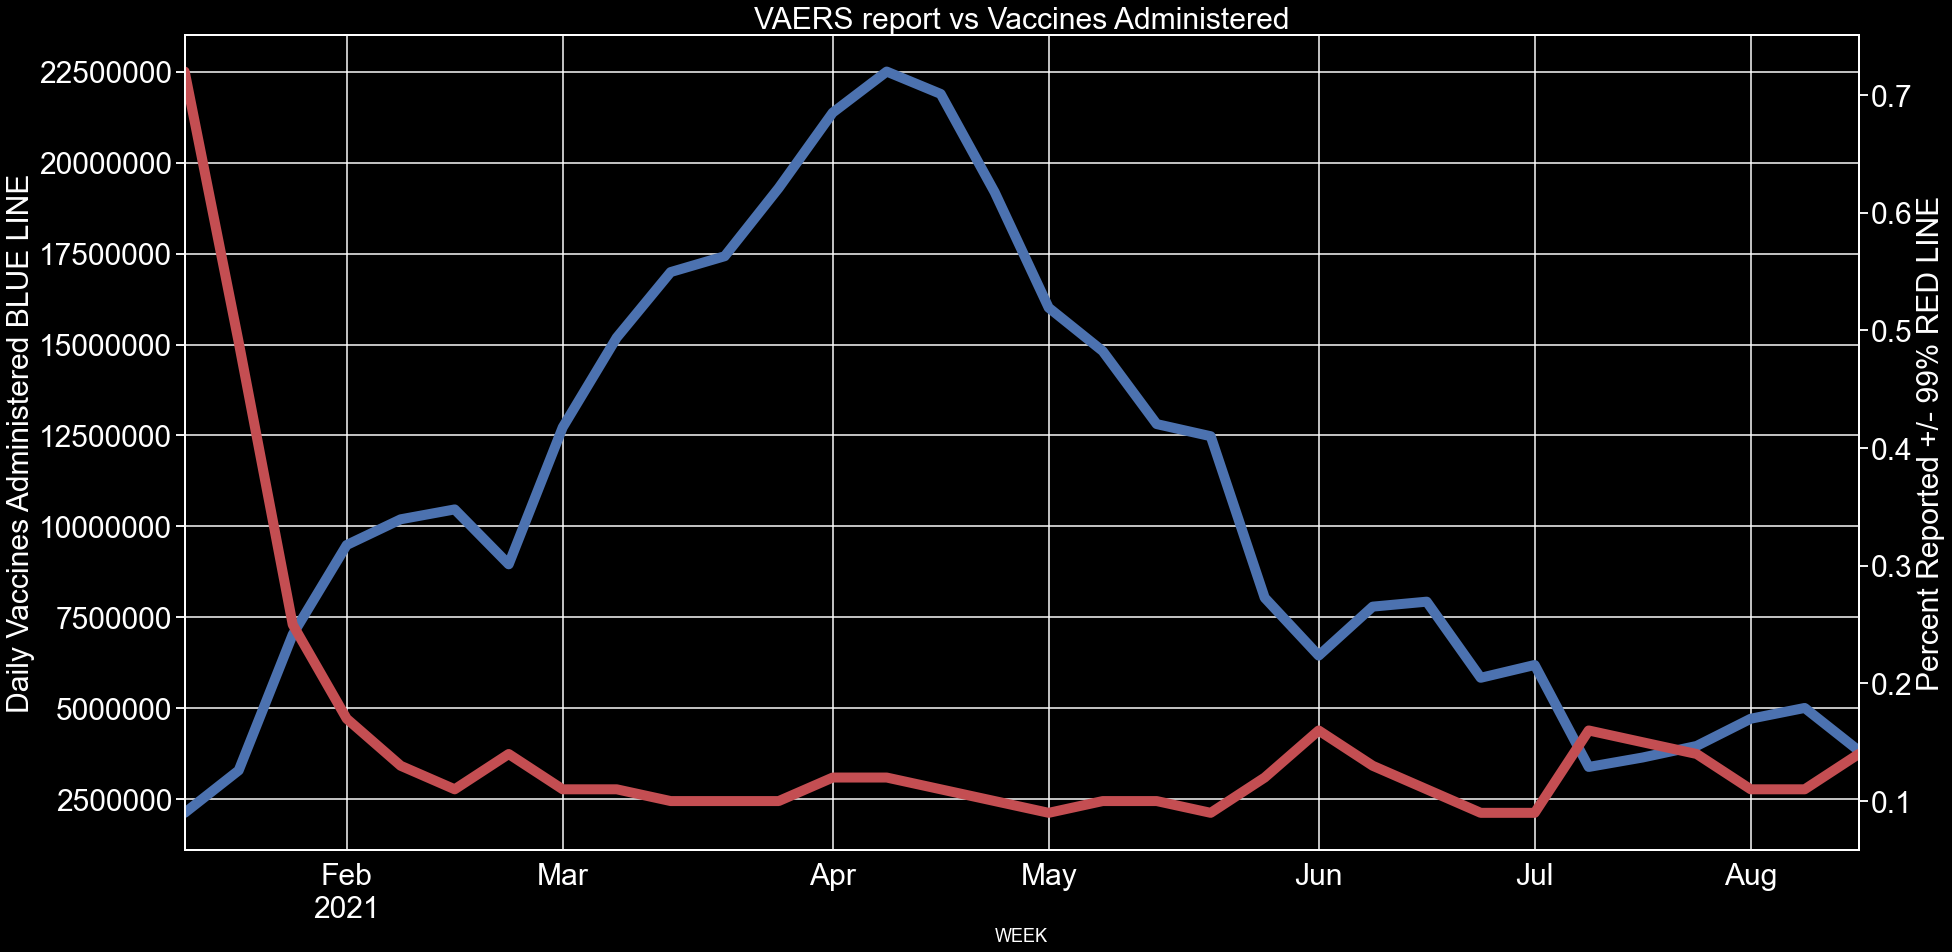

In [165]:
plt.figure(figsize=(30,15))
ax = V_PN['new_vaccinations'].plot(x='date', y='column1', linewidth=10, color='b')
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Daily Vaccines Administered BLUE LINE', fontsize=30)
ax2 = ax.twinx()
plt.yticks(fontsize=30)
plt.title('VAERS report vs Vaccines Administered', fontsize=30)
plt.ylabel('Percent Reported +/- 99% RED LINE', fontsize=30)
ax2 = V_PN['percentage'].plot(x='date', y='column2', ax=ax2, color='r', linewidth=10)
plt.grid(None)
plt.show()

In [ ]:
https://youtu.be/3acSNw2bvz0?t=3088